In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

%config InlineBackend.figure_format = 'retina'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
results_folder = "Final_model_results"


In [3]:
# scatter plots settings 

dots_opacity = 0.1
dots_size = 15

# palette = sns.color_palette("muted")
# colors = [palette[0], palette[3]]

colors = ['tab:blue' , 'tab:red']

# Create custom legend handles
scatter_handles = [plt.Line2D([], [], marker='o', markersize=7, color=colors[0], linestyle='None', alpha=0.5),
                   plt.Line2D([], [], marker='o', markersize=7, color=colors[1], linestyle='None', alpha=0.5)]

scatter_labels = ["Non-moving agents", "Moving agents"]


# Baseline

alpha = 0.5 , all attributes randomly initialized from uniform distribution

In [476]:
baseline = pd.read_csv(results_folder+"/ex1_batchrun_100_iteration.csv")


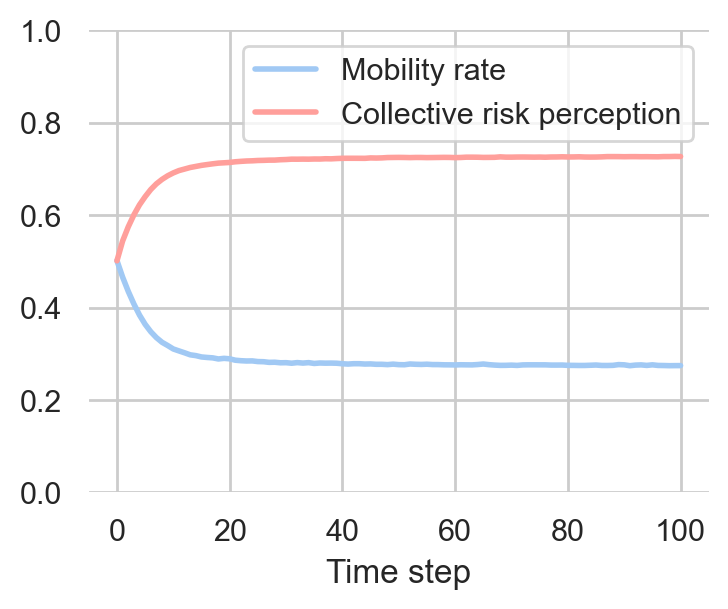

In [1155]:
dataset = baseline.query('alpha == 1')


plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

palette = sns.color_palette("pastel")

sns.lineplot(x = "Step" , y = "mobility_rate" , data = dataset.groupby("Step")['mobility_rate'].mean().reset_index() , label = "Mobility rate" , color = palette[0] , linewidth = 2, alpha = 1) 
sns.lineplot(x = "Step" , y = "op_avg" , data = dataset.groupby("Step")['op_avg'].mean().reset_index() , label = "Collective risk perception" , color = palette[3] , linewidth = 2, alpha = 1) 

plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("")


plt.show()

In [478]:
baseline_1_iter = pd.read_csv(results_folder+"/ex1_batchrun_single_iteration.csv")


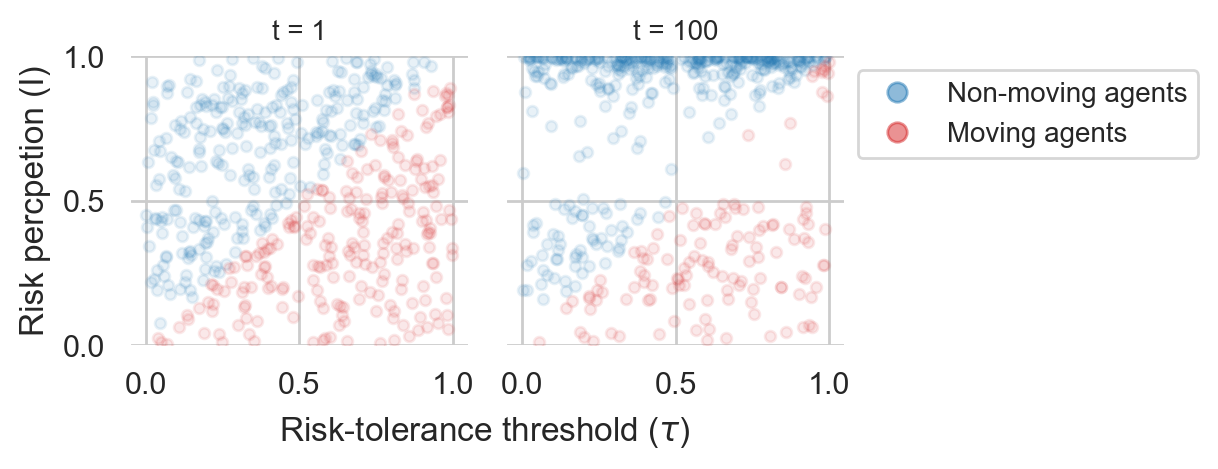

In [1142]:
fig, axs = plt.subplots(1, 2, figsize=(6.25,2.25))

dataset = baseline_1_iter

axs[0].set_title("t = 1" , fontsize = "small")
axs[1].set_title("t = 100" , fontsize = "small")

axs[0].set_ylabel("Risk percpetion (I)")

axs[0].scatter(list(dataset.query("alpha == 1 and Step == 1 and decision == 0")['decision_th']), 
               list(dataset.query("alpha == 1 and Step == 1 and decision == 0")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0].scatter(list(dataset.query("alpha == 1 and Step == 1 and decision == 1")['decision_th']), 
               list(dataset.query("alpha == 1 and Step == 1 and decision == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


axs[1].scatter(list(dataset.query("alpha == 1 and Step == 100 and decision == 0")['decision_th']), 
               list(dataset.query("alpha == 1 and Step == 100 and decision == 0")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1].scatter(list(dataset.query("alpha == 1 and Step == 100 and decision == 1")['decision_th']), 
               list(dataset.query("alpha == 1 and Step == 100 and decision == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


for i in [0,1]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)
    
    axs[i].set_ylim(0,1)
    
    axs[i].set_xticks([0, 0.5, 1])  
    axs[i].set_yticks([0, 0.5, 1])
    
axs[1].set_yticklabels([])

axs[1].legend(scatter_handles, scatter_labels , ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# X axis
fig.text(0.4, -0.01, 'Risk-tolerance threshold ('+r"$\tau$"+")", ha='center')

plt.tight_layout()
plt.show()


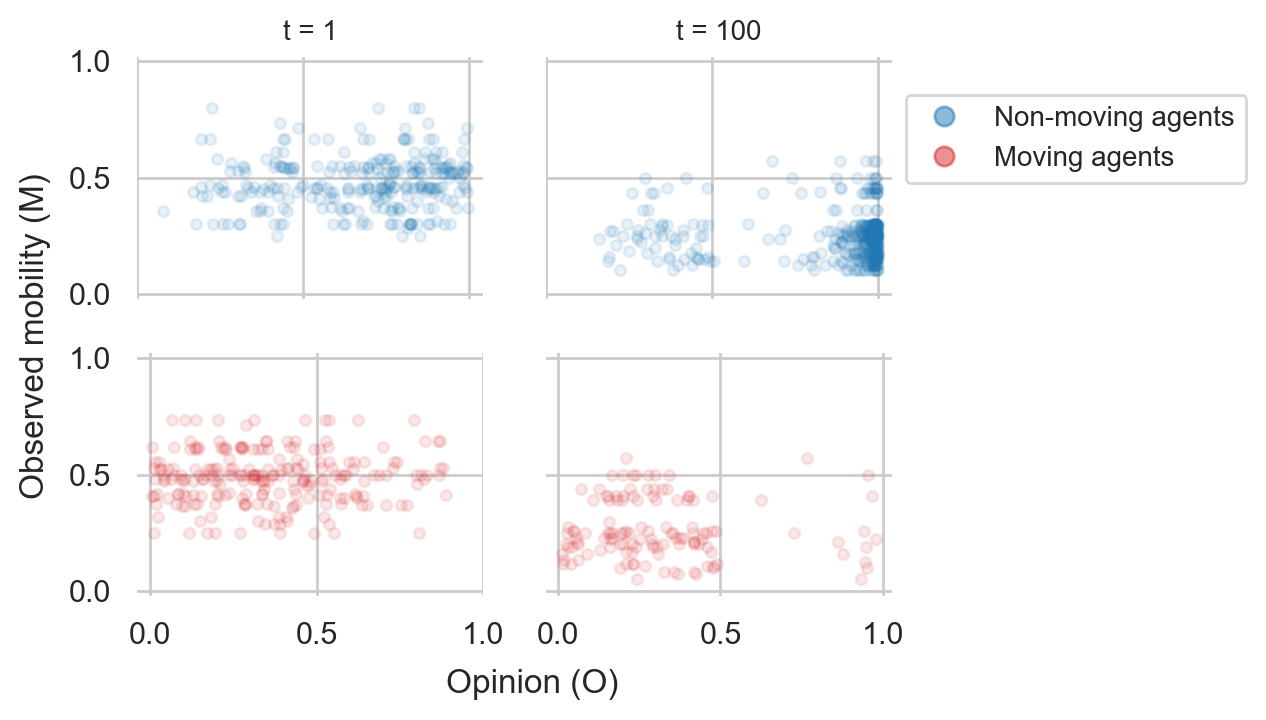

In [1086]:
fig, axs = plt.subplots(2, 2, figsize=(6.25,3.5))

dataset = baseline_1_iter

axs[0][0].set_title("t = 1" , fontsize = "small")
axs[0][1].set_title("t = 100" , fontsize = "small")

axs[0][0].scatter(list(dataset.query("alpha == 1 and Step == 1 and decision == 0")['old_opinion']), 
                  list(dataset.query("alpha == 1 and Step == 1 and decision == 0")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[0][1].scatter(list(dataset.query("alpha == 1 and Step == 100 and decision == 0")['old_opinion']), 
                  list(dataset.query("alpha == 1 and Step == 100 and decision == 0")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])


axs[1][0].scatter(list(dataset.query("alpha == 1 and Step == 1 and decision == 1")['old_opinion']), 
                  list(dataset.query("alpha == 1 and Step == 1 and decision == 1")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[1][1].scatter(list(dataset.query("alpha == 1 and Step == 100 and decision == 1")['old_opinion']), 
                  list(dataset.query("alpha == 1 and Step == 100 and decision == 1")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


for i in [0,1]:
    for j in [0,1]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  
    
        if i != 1:
            axs[i][j].set_xticklabels([])
            
        if j != 0:
            axs[i][j].set_yticklabels([])

axs[0][1].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, .9), loc = "best" ,fontsize = "small")


# X axis
fig.text(0.4, -0.01, 'Opinion (O)', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Observed mobility (M)', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


# Experiment 1: impact of 2 information sources (different alpha values)

## 1. overall model behaviour for different alpha values

In [164]:
exp1_100_iter = pd.read_csv(results_folder+"/ex1_batchrun_100_iteration.csv")


In [165]:
exp1_50_iter = pd.read_csv(results_folder+"/ex1_batchrun_50_iteration_full_alpha_range.csv")

In [166]:
num_steps = len(exp1_100_iter['Step'].unique()) - 1
num_steps

100

### Mobility rate over time | 500 agents - 100 timesteps - 100 iterations

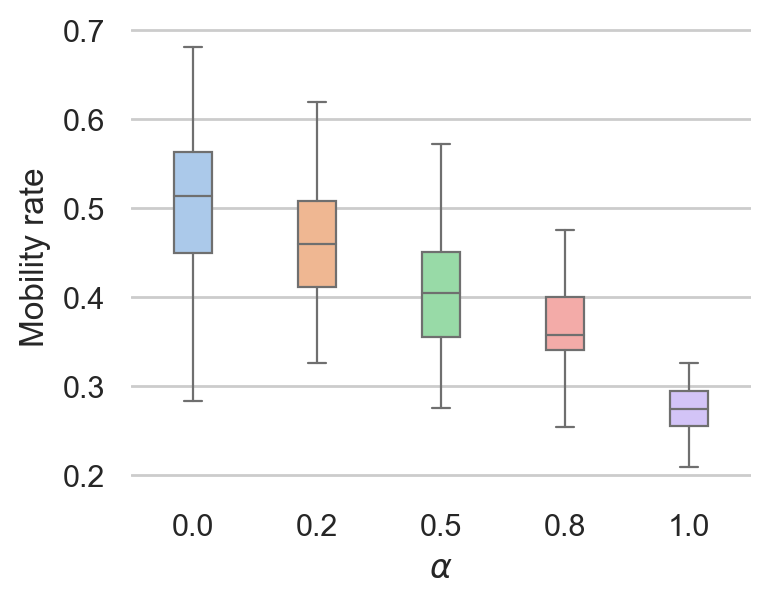

In [172]:

plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp1_100_iter

sns.boxplot(x = 'alpha' , y = 'mobility_rate' , data = dataset.query("Step == 100"),
           width = .3, linewidth = .8, fliersize = 0 , palette = "pastel") 

# plt.ylim(0,1)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mobility rate")

plt.show()

### Not used plots

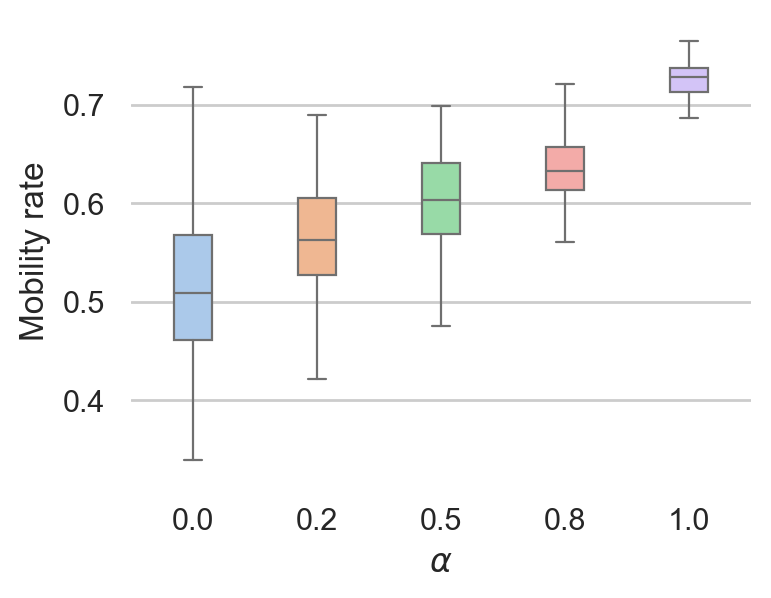

In [1169]:

plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp1_100_iter
sns.boxplot(x = 'alpha' , y = 'op_avg' , data = dataset.query("Step == 100"),
           width = .3, linewidth = .8, fliersize = 0 , palette = "pastel") 

# plt.ylim(0,1)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mobility rate")

plt.show()

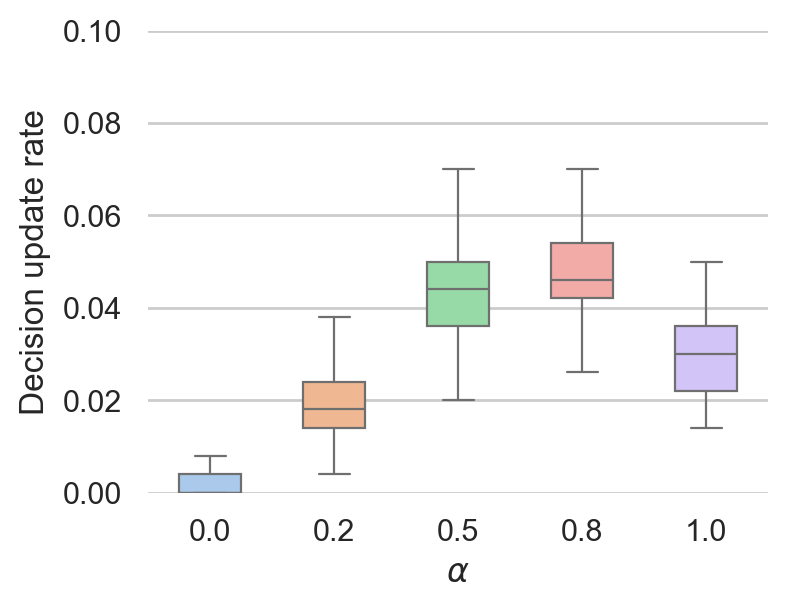

In [766]:
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp1_100_iter

sns.boxplot(x = 'alpha' , y = 'updated_decision_rate' , data = dataset.query("Step == 100"),
           width = .5, linewidth = .8, fliersize = 0 , palette = "pastel") 

plt.ylim(0,.1)
plt.xlabel(r"$\alpha$")
plt.ylabel("Decision update rate")

plt.show()

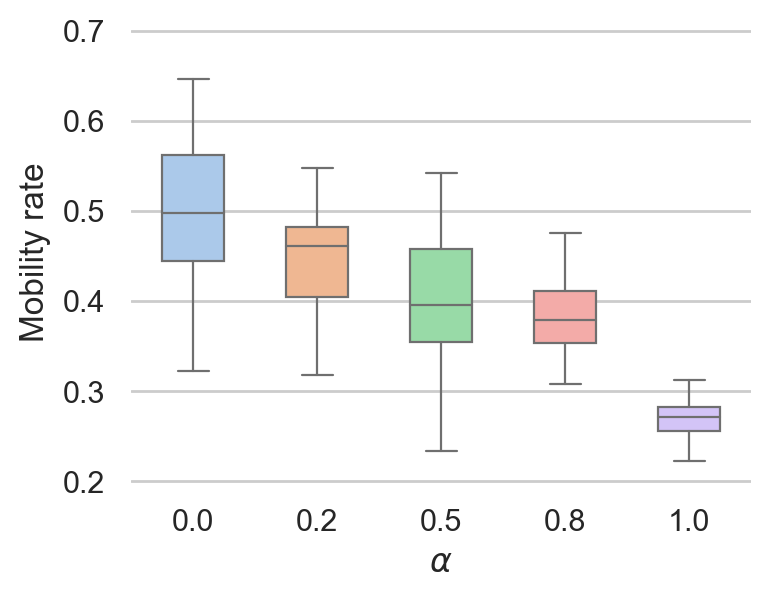

In [751]:
plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp1_50_iter.query('alpha == 0 or alpha == 1 or alpha == 0.2 or alpha == 0.5 or alpha == 0.8')

sns.boxplot(x = 'alpha' , y = 'mobility_rate' , data = dataset.query("Step == 100"),
           width = .5, linewidth = .8, fliersize = 0 , palette = "pastel") 

# plt.ylim(0,1)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mobility rate")

plt.show()

In [729]:
exp1_100_iter_alpah_0 = exp1_100_iter.query('alpha == 0 and iteration <= 50')
exp1_100_iter_alpah_02 = exp1_100_iter.query('alpha == 0.2 and iteration <= 50')
exp1_100_iter_alpah_05 = exp1_100_iter.query('alpha == 0.5 and iteration <= 50')
exp1_100_iter_alpah_08 = exp1_100_iter.query('alpha == 0.8 and iteration <= 50')
exp1_100_iter_alpah_1 = exp1_100_iter.query('alpha == 1 and iteration <= 50')


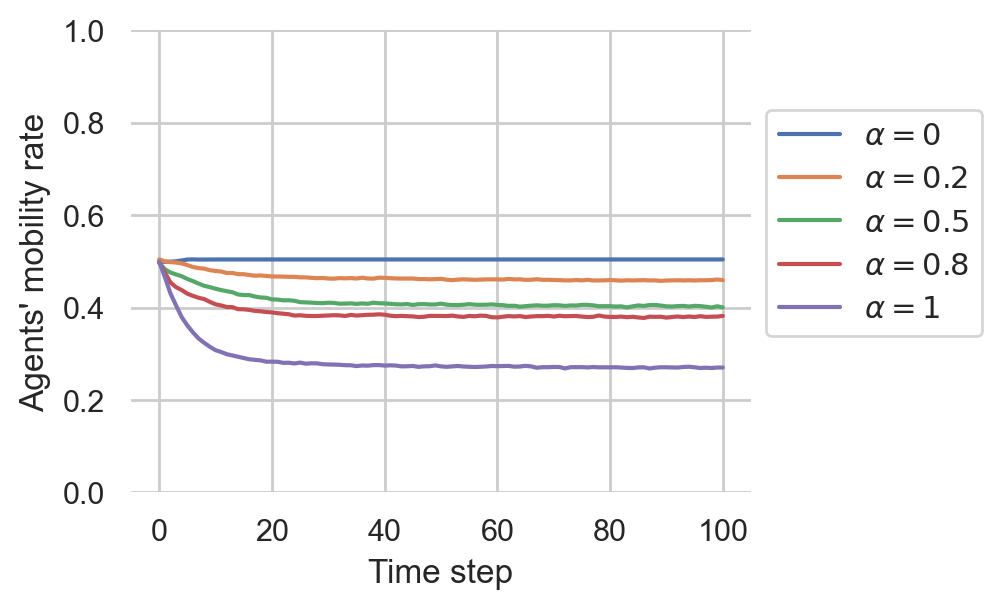

In [1028]:
plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 


sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_0.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$") 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_02.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$") 
# sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_04.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.4$") 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_05.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$")  
# sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_06.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.6$") 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_08.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$") 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_1.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$") 

plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents' mobility rate")
plt.legend(bbox_to_anchor=(1, .86), ncol=1)

plt.show()

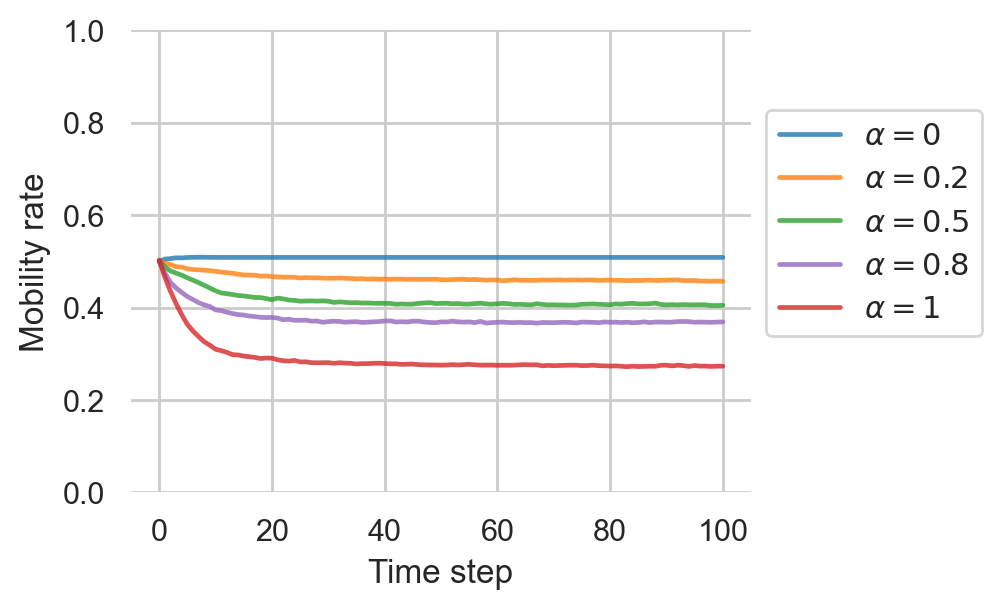

In [730]:
plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

colors = {"0" : "tab:blue" , "0.2" : "tab:orange" , "0.5" : "tab:green" , "0.8" : "tab:purple" , "1" : "tab:red"}


sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_100_iter_alpah_0.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$" , color = colors["0"] , linewidth = 1.7, alpha = .8) 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_100_iter_alpah_02.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", color = colors["0.2"] , linewidth = 1.7, alpha = .8) 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_100_iter_alpah_05.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$" , color = colors["0.5"] , linewidth = 1.7, alpha = .8)  
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_100_iter_alpah_08.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", color = colors["0.8"] , linewidth = 1.7, alpha = .8) 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_100_iter_alpah_1.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", color = colors["1"] , linewidth = 1.7, alpha = .8) 

plt.legend(bbox_to_anchor=(1, .86), ncol=1)

plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Mobility rate")


plt.show()

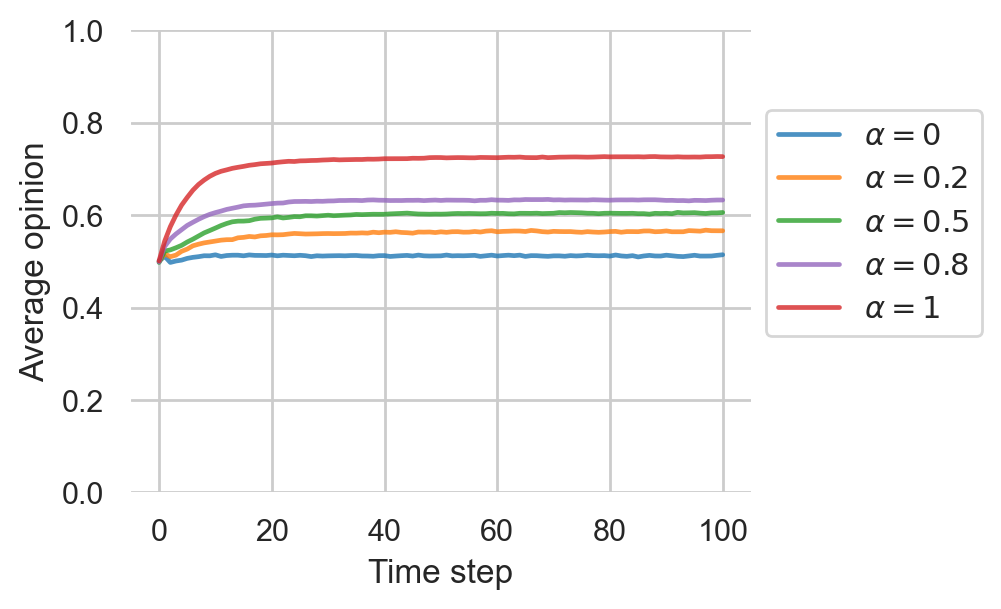

In [27]:
plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 


colors = {"0" : "tab:blue" , "0.2" : "tab:orange" , "0.5" : "tab:green" , "0.8" : "tab:purple" , "1" : "tab:red"}


sns.lineplot(x = "Step" , y = "op_avg" , data = exp1_100_iter_alpah_0.groupby("Step")['op_avg'].mean().reset_index() , label = r"$\alpha = 0$" ,  color = colors["0"] , linewidth = 1.7, alpha = .8 ) 
sns.lineplot(x = "Step" , y = "op_avg" , data = exp1_100_iter_alpah_02.groupby("Step")['op_avg'].mean().reset_index() , label = r"$\alpha = 0.2$" , color = colors["0.2"] , linewidth = 1.7, alpha = .8 ) 
sns.lineplot(x = "Step" , y = "op_avg" , data = exp1_100_iter_alpah_05.groupby("Step")['op_avg'].mean().reset_index() , label = r"$\alpha = 0.5$" ,   color = colors["0.5"] , linewidth = 1.7, alpha = .8 )  
sns.lineplot(x = "Step" , y = "op_avg" , data = exp1_100_iter_alpah_08.groupby("Step")['op_avg'].mean().reset_index() , label = r"$\alpha = 0.8$" ,  color = colors["0.8"] , linewidth = 1.7, alpha = .8 ) 
sns.lineplot(x = "Step" , y = "op_avg" , data = exp1_100_iter_alpah_1.groupby("Step")['op_avg'].mean().reset_index(), label = r"$\alpha = 1$" ,  color = colors["1"] , linewidth = 1.7, alpha = .8 ) 

plt.legend(bbox_to_anchor=(1, .86), ncol=1)


plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Average opinion")
# plt.legend(bbox_to_anchor=(1, .86), ncol=1)

plt.show()

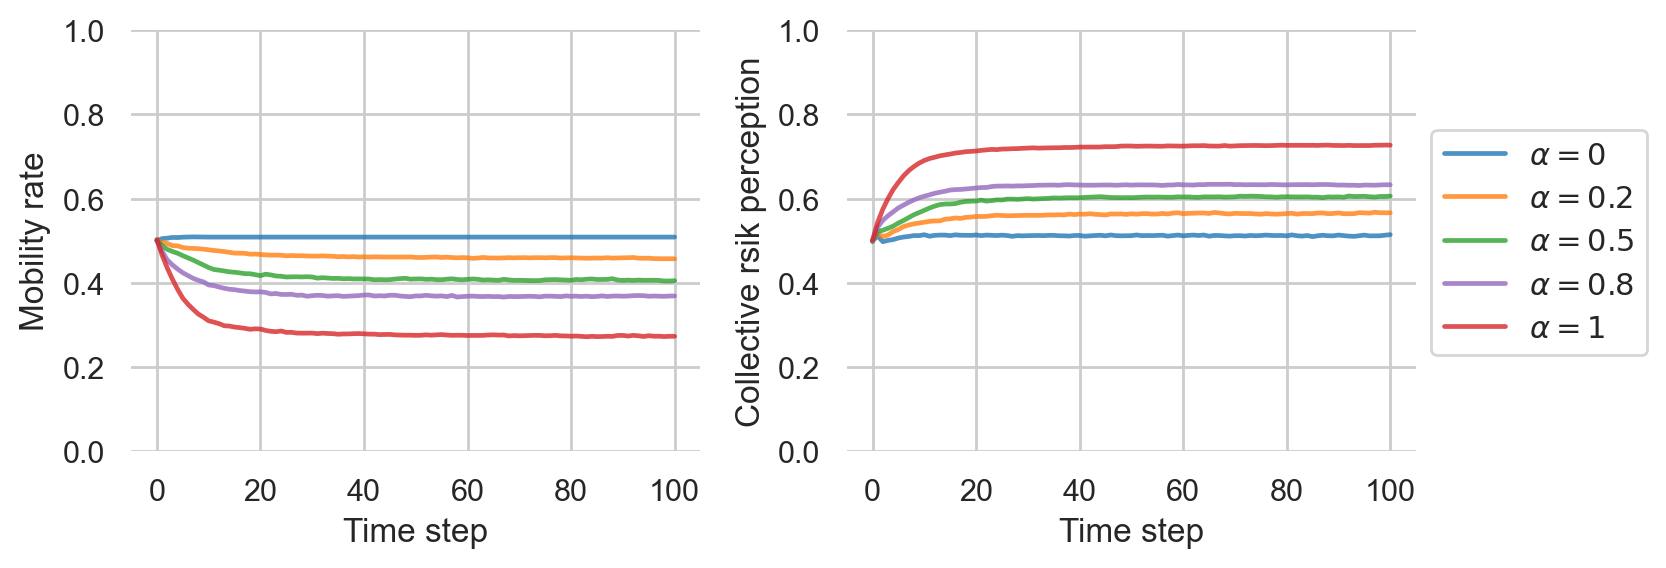

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(8.5,3))
    
colors = {"0" : "tab:blue" , "0.2" : "tab:orange" , "0.5" : "tab:green" , "0.8" : "tab:purple" , "1" : "tab:red"}

axs[0].plot("Step" , "mobility_rate" , data = exp1_100_iter_alpah_0.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$" , color = colors["0"] , linewidth = 1.7, alpha = .8) 
axs[0].plot("Step" , "mobility_rate" , data = exp1_100_iter_alpah_02.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", color = colors["0.2"] , linewidth = 1.7, alpha = .8) 
axs[0].plot("Step" , "mobility_rate" , data = exp1_100_iter_alpah_05.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$" , color = colors["0.5"] , linewidth = 1.7, alpha = .8)  
axs[0].plot("Step" , "mobility_rate" , data = exp1_100_iter_alpah_08.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", color = colors["0.8"] , linewidth = 1.7, alpha = .8) 
axs[0].plot("Step" , "mobility_rate" , data = exp1_100_iter_alpah_1.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", color = colors["1"] , linewidth = 1.7, alpha = .8) 


axs[0].set_xlabel("Time step")
axs[0].set_ylabel("Mobility rate")
# axs[0].set_yticks([0.5 , 0.55 , 0.6 , 0.65, 0.7, 0.75]) 

axs[1].plot("Step" , "op_avg" , data = exp1_100_iter_alpah_0.groupby("Step")['op_avg'].mean().reset_index() , label = r"$\alpha = 0$" ,  color = colors["0"] , linewidth = 1.7, alpha = .8 ) 
axs[1].plot("Step" , "op_avg" , data = exp1_100_iter_alpah_02.groupby("Step")['op_avg'].mean().reset_index() , label = r"$\alpha = 0.2$" , color = colors["0.2"] , linewidth = 1.7, alpha = .8 ) 
axs[1].plot("Step" , "op_avg" , data = exp1_100_iter_alpah_05.groupby("Step")['op_avg'].mean().reset_index() , label = r"$\alpha = 0.5$" ,   color = colors["0.5"] , linewidth = 1.7, alpha = .8 )  
axs[1].plot("Step" , "op_avg" , data = exp1_100_iter_alpah_08.groupby("Step")['op_avg'].mean().reset_index() , label = r"$\alpha = 0.8$" ,  color = colors["0.8"] , linewidth = 1.7, alpha = .8 ) 
axs[1].plot("Step" , "op_avg" , data = exp1_100_iter_alpah_1.groupby("Step")['op_avg'].mean().reset_index(), label = r"$\alpha = 1$" ,  color = colors["1"] , linewidth = 1.7, alpha = .8 ) 

axs[1].set_xlabel("Time step")
axs[1].set_ylabel("Collective rsik perception")
# axs[1].set_yticks([0 , 0.02,  0.04 , 0.06,  0.08, 0.1 , 0.12])


for i in [0,1]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)
    
    axs[i].set_ylim(0,1)

axs[1].legend(bbox_to_anchor=(1, 0.8), ncol=1)

plt.tight_layout()
plt.show()

In [763]:
num_steps = len(exp1_50_iter['Step'].unique()) - 1
num_steps

100

In [744]:
exp1_50_iter_alpah_0 = exp1_50_iter.query('alpha == 0')

exp1_50_iter_alpah_01 = exp1_50_iter.query('alpha == 0.1')
exp1_50_iter_alpah_02 = exp1_50_iter.query('alpha == 0.2')
exp1_50_iter_alpah_03 = exp1_50_iter.query('alpha == 0.3')
exp1_50_iter_alpah_04 = exp1_50_iter.query('alpha == 0.4')

exp1_50_iter_alpah_05 = exp1_50_iter.query('alpha == 0.5')

exp1_50_iter_alpah_06 = exp1_50_iter.query('alpha == 0.6 and mobility_rate < 0.6')
exp1_50_iter_alpah_07 = exp1_50_iter.query('alpha == 0.7')
exp1_50_iter_alpah_08 = exp1_50_iter.query('alpha == 0.8')
exp1_50_iter_alpah_09 = exp1_50_iter.query('alpha == 0.9')

exp1_50_iter_alpah_1 = exp1_50_iter.query('alpha == 1')

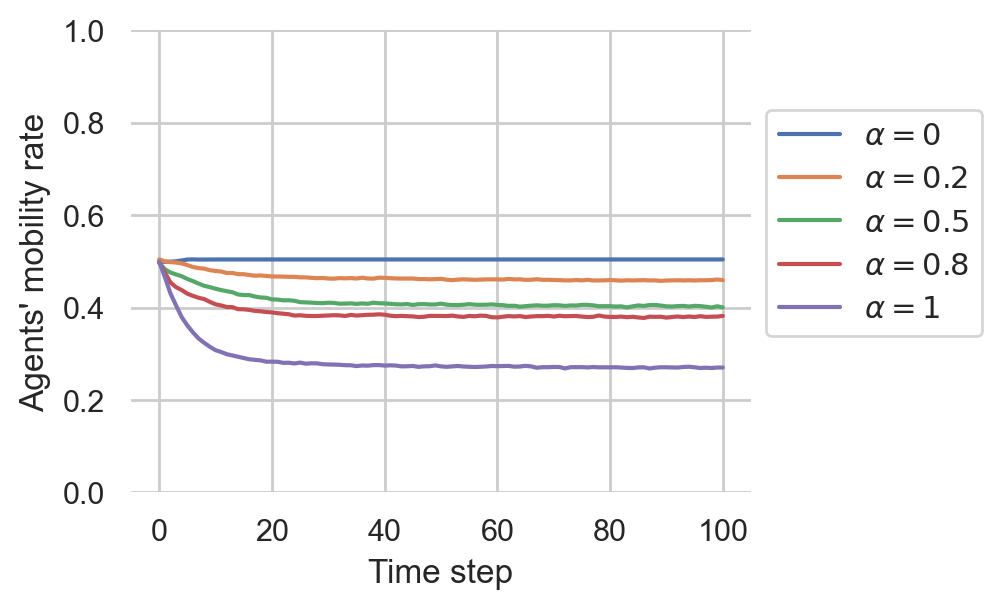

In [745]:
plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 


sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_0.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$") 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_02.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$") 
# sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_04.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.4$") 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_05.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$")  
# sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_06.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.6$") 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_08.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$") 
sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp1_50_iter_alpah_1.groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$") 

plt.ylim(0,1)
plt.xlabel("Time step")
plt.ylabel("Agents' mobility rate")
plt.legend(bbox_to_anchor=(1, .86), ncol=1)

plt.show()

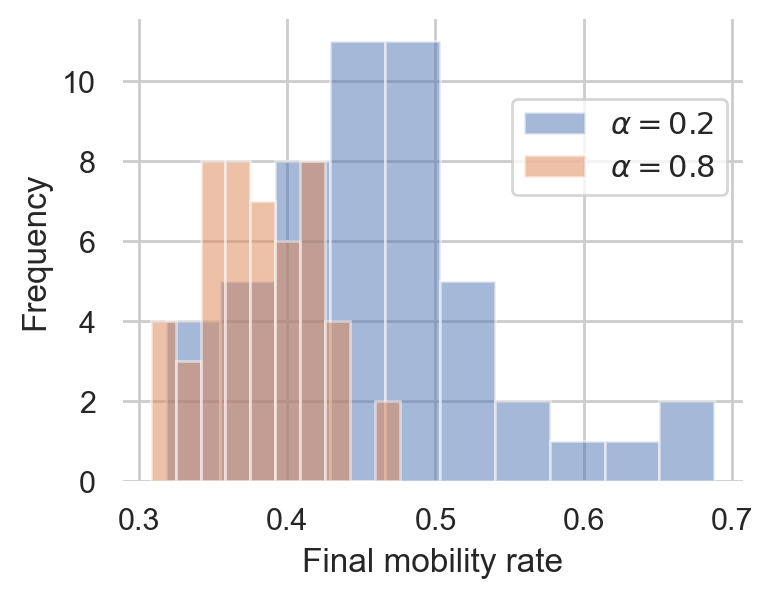

In [746]:
plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

# plt.hist(x = list(exp1_50_iter.query('Step == 100 and alpha == 0')['mobility_rate']) , alpha = 0.5 , label = r"$\alpha = 0$") 
plt.hist(x = list(exp1_50_iter.query('Step == 100 and alpha == 0.2')['mobility_rate']) , alpha = 0.5 , label = r"$\alpha = 0.2$") 
# plt.hist(x = list(exp1_50_iter.query('Step == 100 and alpha == 0.5')['mobility_rate']) , alpha = 0.5 , label = r"$\alpha = 0.5$") 
plt.hist(x = list(exp1_50_iter.query('Step == 100 and alpha == 0.8')['mobility_rate']) , alpha = 0.5 , label = r"$\alpha = 0.8$") 
# plt.hist(x = list(exp1_50_iter.query('Step == 100 and alpha == 1')['mobility_rate']) , alpha = 0.5 , label = r"$\alpha = 1$") 

plt.xlabel("Final mobility rate")
plt.ylabel("Frequency")

plt.legend(bbox_to_anchor=(1, .86), ncol=1)

plt.show()

### final decsions as function of alpha | 500 agents - 100 timesteps - 50 iterations

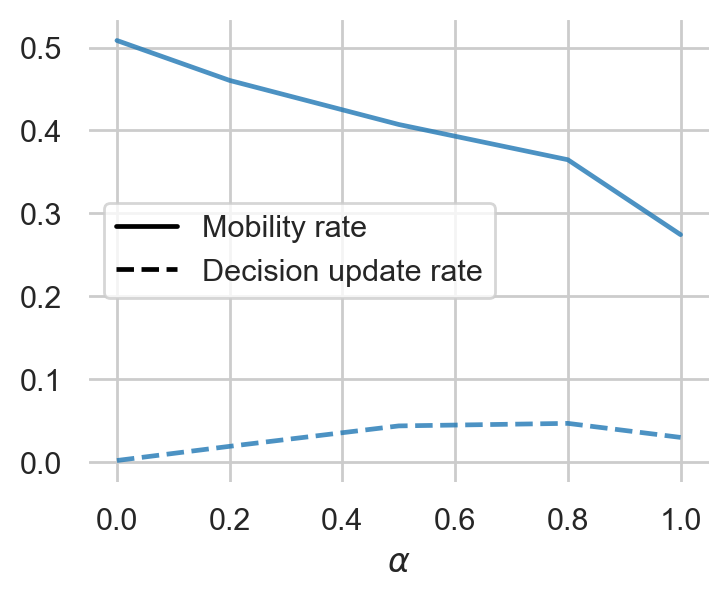

In [759]:
plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

sns.lineplot(x = "alpha" , y = "mobility_rate" , data = exp1_100_iter.query('Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(), label = 'Mobility rate', color = "tab:blue" , linewidth = 1.7 , alpha = 0.8) 
sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = exp1_100_iter.query('Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index(), label = "Decision update rate", color = "tab:blue" , linewidth = 1.7 , alpha = 0.8 , linestyle ="--") 

# plt.ylim(-0.02,1)
plt.xlabel(r"$\alpha$")
plt.ylabel("")

# plt.legend(bbox_to_anchor=(1.7, 0.65), ncol=1)

legend_lines = [plt.Line2D([0], [0], linestyle='-', color='black', lw=1.7),
                plt.Line2D([0], [0], linestyle='--', color='black', lw=1.7)]

legend2 = plt.legend(legend_lines, ["Mobility rate", "Decision update rate"])


plt.show()

## 2. Details of the agents' behaviours in a single iteration

In [1202]:
import mesa
import sys
sys.path.append('../../Final_model')
from model import myModel

params = {
    "N": 500,
    "h": 5,
    "w": 5,
#     "collect_model_data" : False,
#     "collect_agent_data" : False,
    "alpha" : 0.5,
}

results = mesa.batch_run(
    myModel,
    parameters = params,
    
    iterations = 1,  
    max_steps = 100,  

    number_processes = 1,
    data_collection_period = 1,
    display_progress = True,
)

100%|███████████████████████████████████████████| 1/1 [00:13<00:00, 13.12s/it]


In [1203]:
results_df = pd.DataFrame(results)


In [1204]:
results_df.query('Step == 100')[['mobility_rate', 'op_avg', 'combined_info_avg']].tail(1)

mobility_rate    op_avg  combined_info_avg
50499          0.396  0.615256           0.615143

In [1205]:
results_df.to_csv(results_folder+"/ex1_batchrun_single_iteration_alpha_05.csv", index=False)

In [17]:
exp1_alpha_05_1_iter = pd.read_csv(results_folder+"/ex1_batchrun_single_iteration_alpha_05.csv")

In [18]:
exp1_1_iter = pd.read_csv(results_folder+"/ex1_batchrun_single_iteration.csv")


In [19]:
num_agents = len(exp1_1_iter['AgentID'].unique())
num_steps = len(exp1_1_iter['Step'].unique()) - 1


### observed mobility vs. opinion (final step)

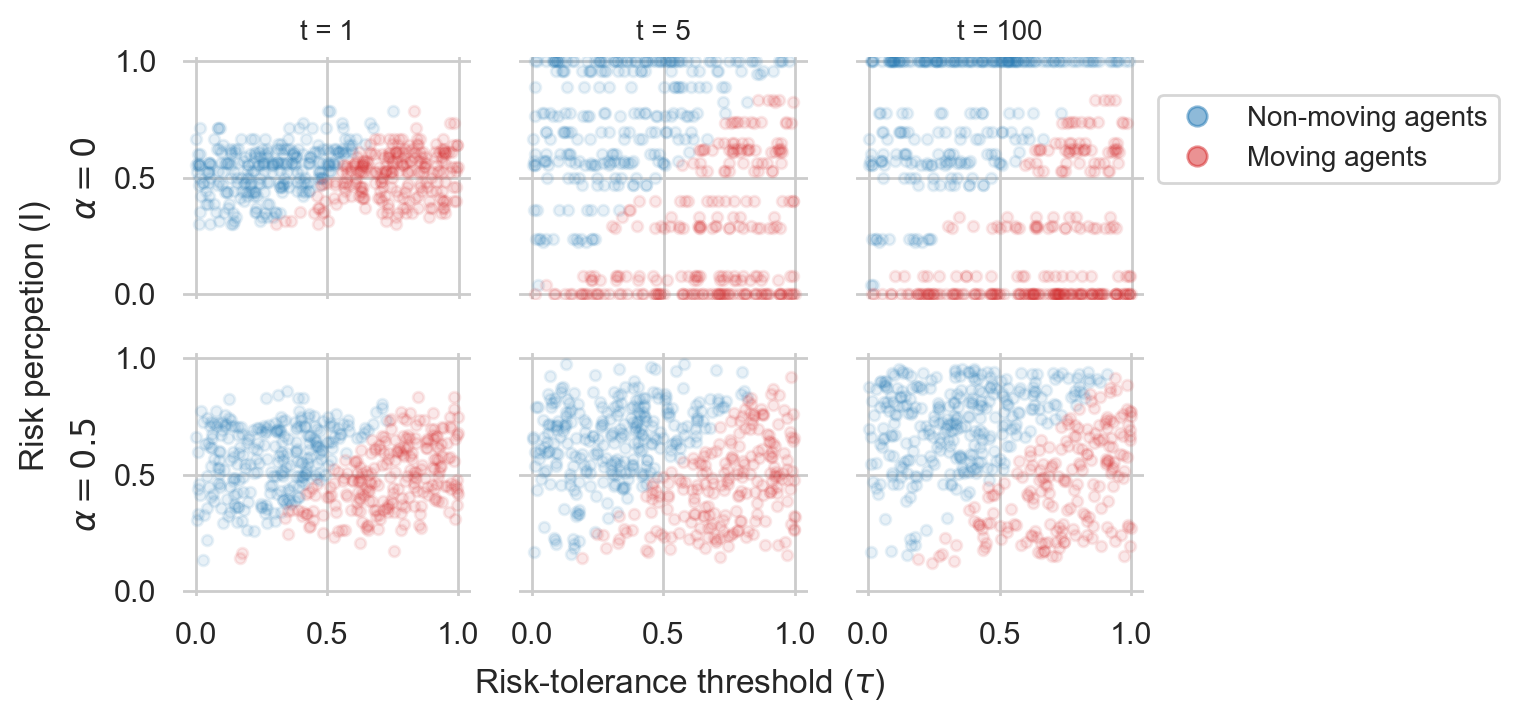

In [1209]:
fig, axs = plt.subplots(2, 3, figsize=(7.5,3.5))
 
dataset = exp1_1_iter
dataset_2 = exp1_alpha_05_1_iter

axs[0,0].set_title('t = 1' , fontsize = "small")
axs[0,1].set_title('t = 5' , fontsize = "small")
axs[0,2].set_title('t = 100' , fontsize = "small")
 
axs[0,0].set_ylabel(r"$\alpha = 0$")

axs[0,0].scatter(list(dataset.query("alpha == 0 and Step == 1 and decision == 0")['decision_th']), 
                 list(dataset.query("alpha == 0 and Step == 1 and decision == 0")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0,0].scatter(list(dataset.query("alpha == 0 and Step == 1 and decision == 1")['decision_th']), 
                 list(dataset.query("alpha == 0 and Step == 1 and decision == 1")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[0,1].scatter(list(dataset.query("alpha == 0 and Step == 5 and decision == 0")['decision_th']), 
                 list(dataset.query("alpha == 0 and Step == 5 and decision == 0")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0,1].scatter(list(dataset.query("alpha == 0 and Step == 5 and decision == 1")['decision_th']), 
                 list(dataset.query("alpha == 0 and Step == 5 and decision == 1")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[0,2].scatter(list(dataset.query("alpha == 0 and Step == 100 and decision == 0")['decision_th']), 
                 list(dataset.query("alpha == 0 and Step == 100 and decision == 0")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0,2].scatter(list(dataset.query("alpha == 0 and Step == 100 and decision == 1")['decision_th']), 
                 list(dataset.query("alpha == 0 and Step == 100 and decision == 1")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


axs[1,0].set_ylabel(r"$\alpha = 0.5$")

axs[1,0].scatter(list(dataset_2.query("alpha == 0.5 and Step == 1 and decision == 0")['decision_th']), 
                 list(dataset_2.query("alpha == 0.5 and Step == 1 and decision == 0")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1,0].scatter(list(dataset_2.query("alpha == 0.5 and Step == 1 and decision == 1")['decision_th']), 
                 list(dataset_2.query("alpha == 0.5 and Step == 1 and decision == 1")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[1,1].scatter(list(dataset_2.query("alpha == 0.5 and Step == 5 and decision == 0")['decision_th']), 
                 list(dataset_2.query("alpha == 0.5 and Step == 5 and decision == 0")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1,1].scatter(list(dataset_2.query("alpha == 0.5 and Step == 5 and decision == 1")['decision_th']), 
                 list(dataset_2.query("alpha == 0.5 and Step == 5 and decision == 1")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[1,2].scatter(list(dataset_2.query("alpha == 0.5 and Step == 100 and decision == 0")['decision_th']), 
                 list(dataset_2.query("alpha == 0.5 and Step == 100 and decision == 0")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1,2].scatter(list(dataset_2.query("alpha == 0.5 and Step == 100 and decision == 1")['decision_th']), 
                 list(dataset_2.query("alpha == 0.5 and Step == 100 and decision == 1")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


for i in [0,1]:
    for j in [0,1,2]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  
    
        if i != 1:
            axs[i][j].set_xticklabels([])
            
        if j != 0:
            axs[i][j].set_yticklabels([])


axs[0,2].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, .9), loc = "best" ,fontsize = "small")


# X axis
fig.text(0.43, -0.01, 'Risk-tolerance threshold ('+r"$\tau$"+")", ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Risk percpetion (I)', va='center', rotation='vertical')


plt.tight_layout()
plt.show()


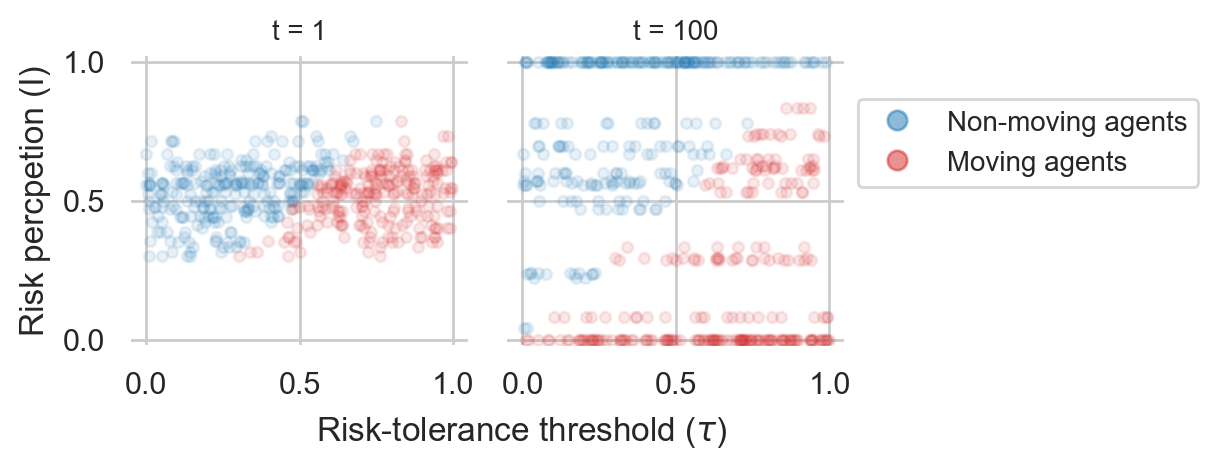

In [1213]:
fig, axs = plt.subplots(1, 2, figsize=(6.25,2.25))
 
dataset = exp1_1_iter
# dataset_2 = exp1_alpha_05_1_iter

axs[0].set_title('t = 1' , fontsize = "small")
# axs[0,1].set_title('t = 5' , fontsize = "small")
axs[1].set_title('t = 100' , fontsize = "small")
 
axs[0].set_ylabel("Risk percpetion (I)")

axs[0].scatter(list(dataset.query("alpha == 0 and Step == 1 and decision == 0")['decision_th']), 
                 list(dataset.query("alpha == 0 and Step == 1 and decision == 0")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0].scatter(list(dataset.query("alpha == 0 and Step == 1 and decision == 1")['decision_th']), 
                 list(dataset.query("alpha == 0 and Step == 1 and decision == 1")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[1].scatter(list(dataset.query("alpha == 0 and Step == 100 and decision == 0")['decision_th']), 
                 list(dataset.query("alpha == 0 and Step == 100 and decision == 0")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1].scatter(list(dataset.query("alpha == 0 and Step == 100 and decision == 1")['decision_th']), 
                 list(dataset.query("alpha == 0 and Step == 100 and decision == 1")['combined_info']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


for i in [0,1]:
#     for j in [0,1]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)

    axs[i].set_ylim(-0.02,1.02)
    axs[i].set_xticks([0, 0.5, 1])  
    axs[i].set_yticks([0, 0.5, 1])  

#     if i != 1:
axs[1].set_yticklabels([])

#     if j != 0:
#         axs[i][j].set_yticklabels([])


axs[1].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, .9), loc = "best" ,fontsize = "small")


# X axis
fig.text(0.43, -0.01, 'Risk-tolerance threshold ('+r"$\tau$"+")", ha='center')
# Y axis
# fig.text(-0.01, 0.5, 'Risk percpetion (I)', va='center', rotation='vertical')


plt.tight_layout()
plt.show()


In [1049]:
exp1_1_iter.columns

Index(['RunId', 'iteration', 'Step', 'N', 'h', 'w', 'alpha', 'op_avg',
       'combined_info_avg', 'moving', 'not_moving', 'mobility_rate',
       'start_moving_count', 'stop_moving_count', 'start_moving_rate',
       'stop_moving_rate', 'updated_decision_count', 'updated_decision_rate',
       'communicatin_count', 'communication_rate', 'AgentID', 'opinion',
       'old_opinion', 'physical_pos', 'peer_trust', 'risk_sensitivity',
       'tendency_to_share', 'total_neighbors', 'moving_neighbors',
       'observed_mobility', 'online_info', 'offline_info', 'combined_info',
       'decision_th', 'old_decision', 'decision', 'move_counter',
       'stop_move_counter', 'speak_counter', 'listen_counter'],
      dtype='object')

In [1051]:
exp1_1_iter.query("AgentID == 1 and alpha== 0")[['Step' , 'opinion', 'old_opinion', 'total_neighbors', 'moving_neighbors','observed_mobility', 'online_info' , 'offline_info','combined_info',
       'decision_th', 'old_decision', 'decision']]

Step   opinion  old_opinion  total_neighbors  moving_neighbors  \
1         0  0.367670     0.367670                0                 0   
501       1  0.337479     0.367670               24                 8   
1001      2  0.750000     0.337479               24                 6   
1501      3  0.916667     0.346737               24                 2   
2001      4  1.000000     0.916667               24                 0   
...     ...       ...          ...              ...               ...   
48001    96  1.000000     0.500000               24                 0   
48501    97  0.476638     1.000000               24                 0   
49001    98  1.000000     0.280582               24                 0   
49501    99  1.000000     1.000000               24                 0   
50001   100  1.000000     0.498627               24                 0   

       observed_mobility  online_info  offline_info  combined_info  \
1               0.000000          0.0      0.000000       0.000000   
501             0.333333          0.0      0.666667       0.666667   
1001            0.250000          0.0      0.750000       0.750000   
1501            0.083333          0.0      0.916667       0.916667   
2001            0.000000          0.0      1.000000       1.000000   
...                  ...          ...           ...            ...   
48001           0.000000          0.0      1.000000       1.000000   
48501           0.000000          0.0      1.000000       1.000000   
49001           0.000000          0.0      1.000000       1.000000   
49501           0.000000          0.0      1.000000       1.000000   
50001           0.000000          0.0      1.000000       1.000000   

       decision_th  old_decision  decision  
1         0.568373             1         1  
501       0.568373             1         0  
1001      0.568373             0         0  
1501      0.568373             0         0  
2001      0.568373             0         0  
...            ...           ...       ...  
48001     0.568373             0         0  
48501     0.568373             0         0  
49001     0.568373             0         0  
49501     0.568373             0         0  
50001     0.568373             0         0  

[101 rows x 12 columns]

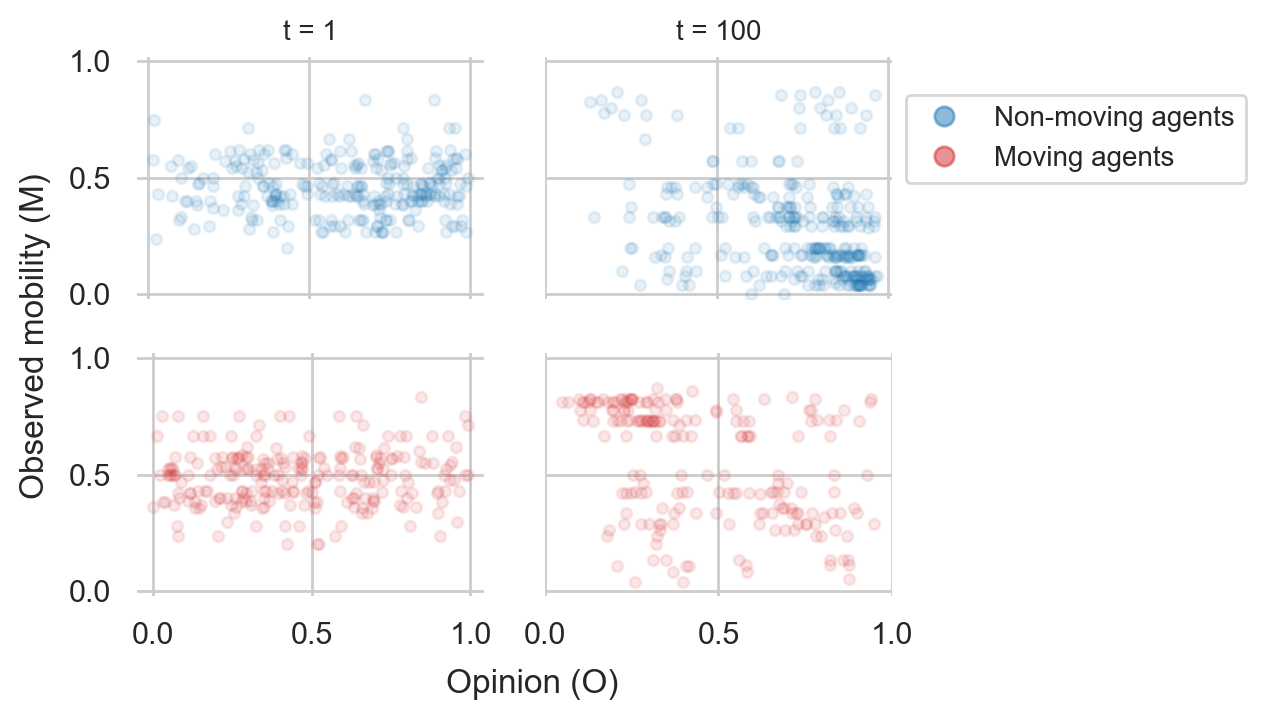

In [1207]:
fig, axs = plt.subplots(2, 2, figsize=(6.25,3.5))

dataset = exp1_alpha_05_1_iter

axs[0][0].set_title("t = 1" , fontsize = "small")
axs[0][1].set_title("t = 100" , fontsize = "small")

axs[0][0].scatter(list(dataset.query("alpha == 0.5 and Step == 1 and decision == 0")['old_opinion']), 
                  list(dataset.query("alpha == 0.5 and Step == 1 and decision == 0")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[0][1].scatter(list(dataset.query("alpha == 0.5 and Step == 100 and decision == 0")['old_opinion']), 
                  list(dataset.query("alpha == 0.5 and Step == 100 and decision == 0")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])


axs[1][0].scatter(list(dataset.query("alpha == 0.5 and Step == 1 and decision == 1")['old_opinion']), 
                  list(dataset.query("alpha == 0.5 and Step == 1 and decision == 1")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[1][1].scatter(list(dataset.query("alpha == 0.5 and Step == 100 and decision == 1")['old_opinion']), 
                  list(dataset.query("alpha == 0.5 and Step == 100 and decision == 1")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


for i in [0,1]:
    for j in [0,1]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  
    
        if i != 1:
            axs[i][j].set_xticklabels([])
            
        if j != 0:
            axs[i][j].set_yticklabels([])

axs[0][1].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, .9), loc = "best" ,fontsize = "small")


# X axis
fig.text(0.4, -0.01, 'Opinion (O)', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Observed mobility (M)', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


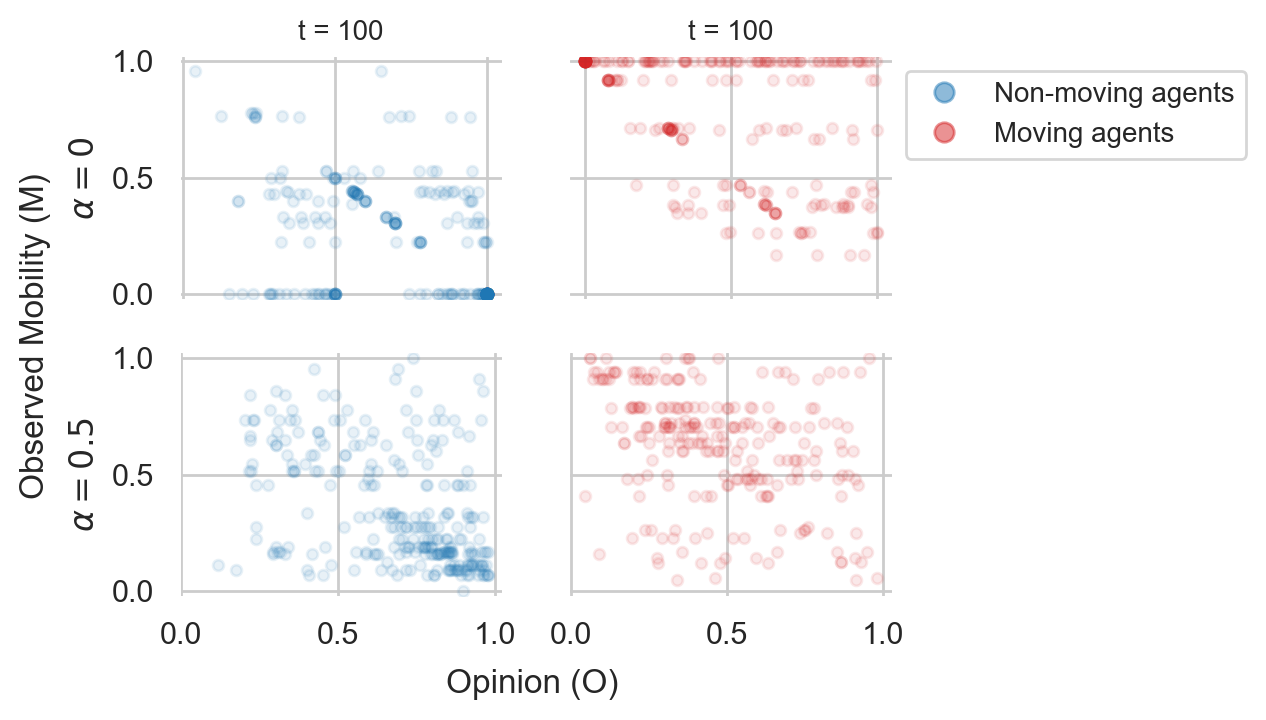

In [1089]:
fig, axs = plt.subplots(2, 2, figsize=(6.25,3.5))

dataset = exp1_1_iter

axs[0,0].set_title('t = 100' , fontsize = "small")
axs[0,1].set_title('t = 100' , fontsize = "small")
 
axs[0,0].set_ylabel(r"$\alpha = 0$")

axs[0,0].scatter(list(dataset.query("alpha == 0 and Step == 100 and decision == 0")['old_opinion']), 
                 list(dataset.query("alpha == 0 and Step == 100 and decision == 0")['observed_mobility']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[0,1].scatter(list(dataset.query("alpha == 0 and Step == 100 and decision == 1")['old_opinion']), 
                 list(dataset.query("alpha == 0 and Step == 100 and decision == 1")['observed_mobility']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


axs[1,0].set_ylabel(r"$\alpha = 0.5$")


axs[1,0].scatter(list(dataset.query("alpha == 0.5 and Step == 100 and decision == 0")['old_opinion']), 
                 list(dataset.query("alpha == 0.5 and Step == 100 and decision == 0")['observed_mobility']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[1,1].scatter(list(dataset.query("alpha == 0.5 and Step == 100 and decision == 1")['old_opinion']), 
                 list(dataset.query("alpha == 0.5 and Step == 100 and decision == 1")['observed_mobility']) , 
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

for i in [0,1]:
    for j in [0,1]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  
    
        if i != 1:
            axs[i][j].set_xticklabels([])
            
        if j != 0:
            axs[i][j].set_yticklabels([])

axs[0,1].legend(scatter_handles, scatter_labels , ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# X axis
fig.text(0.4, -0.01, 'Opinion (O)', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Observed Mobility (M)', va='center', rotation='vertical')


plt.tight_layout()
plt.show()


### not used plots

In [703]:
# alpha_0_init_op_0 = list(exp1_1_iter_alpah_0.query("decision == 0 and Step == 1")['old_opinion'])
# alpha_0_init_op_1 = list(exp1_1_iter_alpah_0.query("decision == 1 and Step == 1")['old_opinion'])

# alpha_0_init_mobility_0 = list(exp1_1_iter_alpah_0.query("decision == 0 and Step == 1")['observed_mobility'])
# alpha_0_init_mobility_1 = list(exp1_1_iter_alpah_0.query("decision == 1 and Step == 1")['observed_mobility'])

# alpha_0_init_dt_0 = list(exp1_1_iter_alpah_0.query("decision == 0 and Step == 0")['decision_th'])
# alpha_0_init_dt_1 = list(exp1_1_iter_alpah_0.query("decision == 1 and Step == 0")['decision_th'])

# alpha_0_init_I_0 = list(exp1_1_iter_alpah_0.query("decision == 0 and Step == 0")['combined_info'])
# alpha_0_init_I_1 = list(exp1_1_iter_alpah_0.query("decision == 1 and Step == 0")['combined_info'])

# #---------

# alpha_0_final_op_0 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 0")['old_opinion'])
# alpha_0_final_op_1 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 1")['old_opinion'])

# alpha_0_mobility_0 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 0")['observed_mobility'])
# alpha_0_mobility_1 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 1")['observed_mobility'])

# alpha_0_dt_0 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 0")['decision_th'])
# alpha_0_dt_1 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 1")['decision_th'])

# alpha_0_I_0 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 0")['combined_info'])
# alpha_0_I_1 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 1")['combined_info'])

# alpha_0_update_0 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 0")['decision_update_rate'])
# alpha_0_update_1 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 1")['decision_update_rate'])

# # alpha_0_stop_move_0 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 0")['stop_move_rate'])
# # alpha_0_stop_move_1 = list(exp1_1_iter_alpah_0.tail(num_agents).query("decision == 1")['stop_move_rate'])

# ###########################


# alpha_05_init_op_0 = list(exp1_1_iter_alpah_05.query("decision == 0 and Step == 1")['old_opinion'])
# alpha_05_init_op_1 = list(exp1_1_iter_alpah_05.query("decision == 1 and Step == 1")['old_opinion'])

# alpha_05_init_mobility_0 = list(exp1_1_iter_alpah_05.query("decision == 0 and Step == 1")['observed_mobility'])
# alpha_05_init_mobility_1 = list(exp1_1_iter_alpah_05.query("decision == 1 and Step == 1")['observed_mobility'])

# alpha_05_init_dt_0 = list(exp1_1_iter_alpah_05.query("decision == 0 and Step == 0")['decision_th'])
# alpha_05_init_dt_1 = list(exp1_1_iter_alpah_05.query("decision == 1 and Step == 0")['decision_th'])

# alpha_05_init_I_0 = list(exp1_1_iter_alpah_05.query("decision == 0 and Step == 0")['combined_info'])
# alpha_05_init_I_1 = list(exp1_1_iter_alpah_05.query("decision == 1 and Step == 0")['combined_info'])

# #---------

# alpha_05_final_op_0 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 0")['old_opinion'])
# alpha_05_final_op_1 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 1")['old_opinion'])

# alpha_05_mobility_0 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 0")['observed_mobility'])
# alpha_05_mobility_1 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 1")['observed_mobility'])

# alpha_05_dt_0 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 0")['decision_th'])
# alpha_05_dt_1 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 1")['decision_th'])

# alpha_05_I_0 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 0")['combined_info'])
# alpha_05_I_1 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 1")['combined_info'])

# alpha_05_update_0 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 0")['decision_update_rate'])
# alpha_05_update_1 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 1")['decision_update_rate'])

# # alpha_05_stop_move_0 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 0")['stop_move_rate'])
# # alpha_05_stop_move_1 = list(exp1_1_iter_alpah_05.tail(num_agents).query("decision == 1")['stop_move_rate'])

# #############################

# alpha_1_init_op_0 = list(exp1_1_iter_alpah_1.query("decision == 0 and Step == 1")['old_opinion'])
# alpha_1_init_op_1 = list(exp1_1_iter_alpah_1.query("decision == 1 and Step == 1")['old_opinion'])

# alpha_1_init_mobility_0 = list(exp1_1_iter_alpah_1.query("decision == 0 and Step == 1")['observed_mobility'])
# alpha_1_init_mobility_1 = list(exp1_1_iter_alpah_1.query("decision == 1 and Step == 1")['observed_mobility'])

# alpha_1_init_dt_0 = list(exp1_1_iter_alpah_1.query("decision == 0 and Step == 0")['decision_th'])
# alpha_1_init_dt_1 = list(exp1_1_iter_alpah_1.query("decision == 1 and Step == 0")['decision_th'])

# alpha_1_init_I_0 = list(exp1_1_iter_alpah_1.query("decision == 0 and Step == 0")['combined_info'])
# alpha_1_init_I_1 = list(exp1_1_iter_alpah_1.query("decision == 1 and Step == 0")['combined_info'])

# #---------

# alpha_1_final_op_0 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 0")['old_opinion'])
# alpha_1_final_op_1 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 1")['old_opinion'])

# alpha_1_mobility_0 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 0")['observed_mobility'])
# alpha_1_mobility_1 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 1")['observed_mobility'])

# alpha_1_dt_0 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 0")['decision_th'])
# alpha_1_dt_1 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 1")['decision_th'])

# alpha_1_I_0 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 0")['combined_info'])
# alpha_1_I_1 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 1")['combined_info'])

# alpha_1_update_0 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 0")['decision_update_rate'])
# alpha_1_update_1 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 1")['decision_update_rate'])

# # alpha_1_stop_move_0 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 0")['stop_move_rate'])
# # alpha_1_stop_move_1 = list(exp1_1_iter_alpah_1.tail(num_agents).query("decision == 1")['stop_move_rate'])


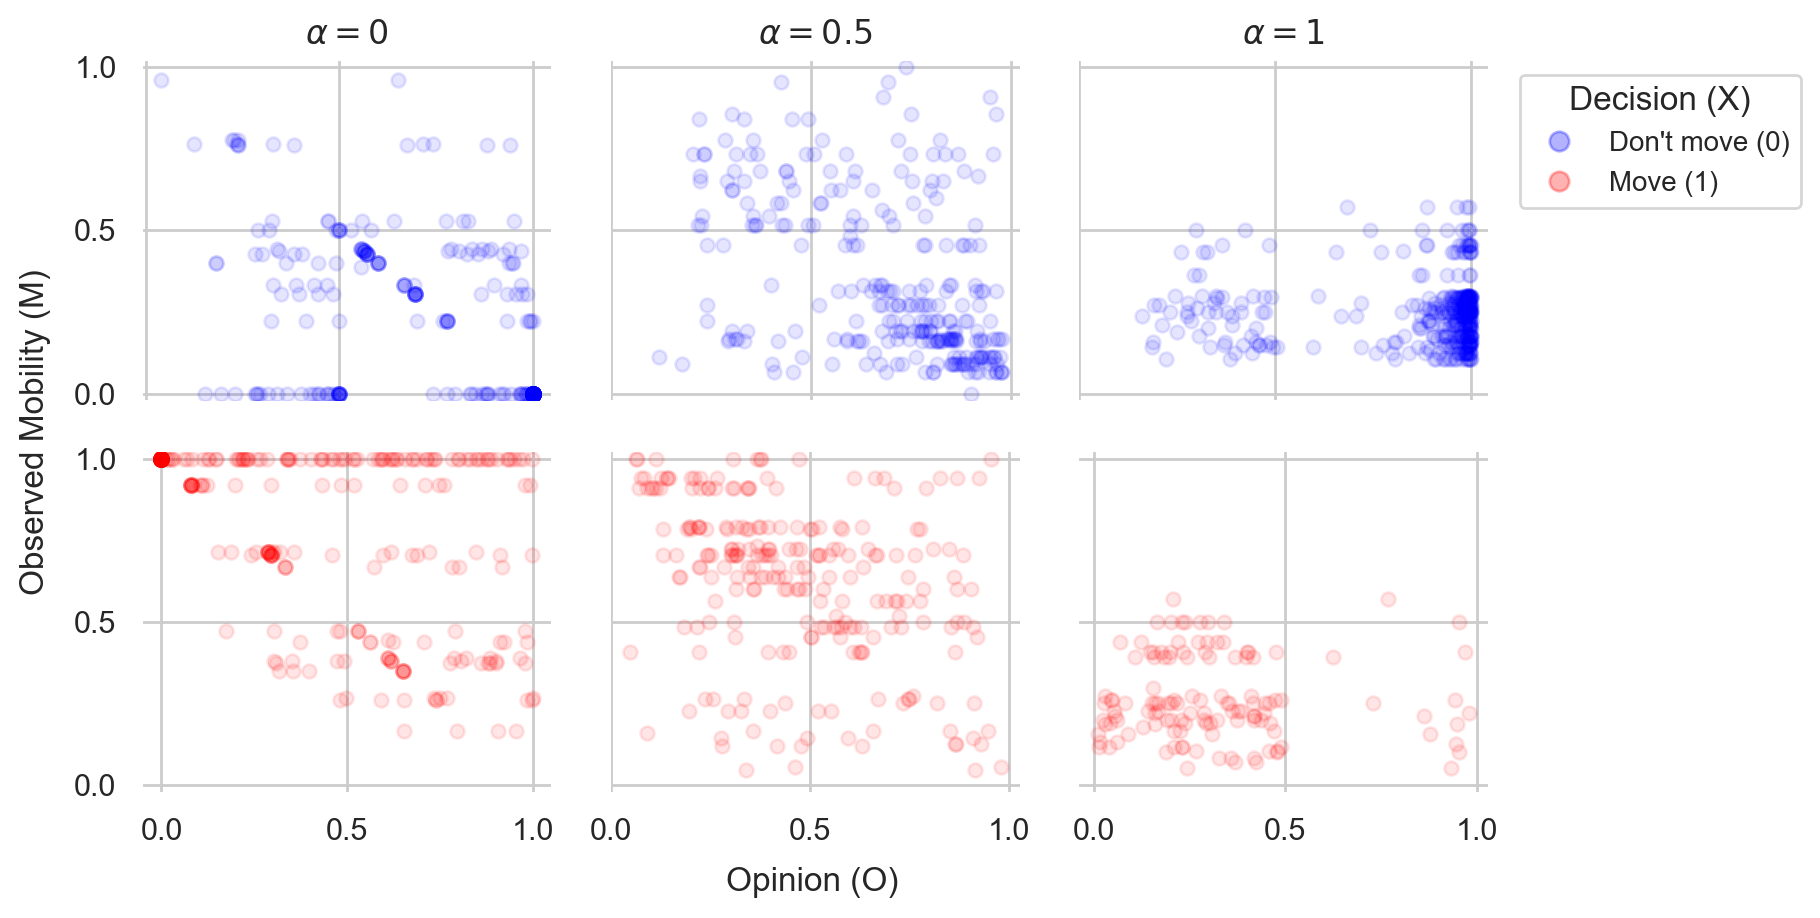

In [1248]:
fig, axs = plt.subplots(2, 3, figsize=(9, 4.5))



axs[0,0].set_title(r"$\alpha = 0$")
axs[0,1].set_title(r"$\alpha = 0.5$")
axs[0,2].set_title(r"$\alpha = 1$")


axs[0,0].scatter(alpha_0_final_op_0, alpha_0_mobility_0, marker='o', s = 25, alpha = 0.1, color="blue")
axs[0,1].scatter(alpha_05_final_op_0, alpha_05_mobility_0, marker='o', s = 25, alpha = 0.1, color="blue")
axs[0,2].scatter(alpha_1_final_op_0, alpha_1_mobility_0, marker='o', s = 25, alpha = 0.1, color="blue")

axs[1,0].scatter(alpha_0_final_op_1, alpha_0_mobility_1, marker='o', s = 25, alpha = 0.1, color="red")
axs[1,1].scatter(alpha_05_final_op_1, alpha_05_mobility_1, marker='o', s = 25, alpha = 0.1, color="red")
axs[1,2].scatter(alpha_1_final_op_1, alpha_1_mobility_1, marker='o', s = 25, alpha = 0.1, color="red")

for i in [0,1]:
    for j in [0,1,2]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  


axs[0][0].set_xticklabels([])
axs[0][1].set_xticklabels([])
axs[0][2].set_xticklabels([])


axs[0][1].set_yticklabels([])
axs[0][2].set_yticklabels([])
axs[1][1].set_yticklabels([])
axs[1][2].set_yticklabels([])


# Create custom legend handles
handles = [plt.Line2D([], [], marker='o', markersize=7, color='blue', linestyle='None', alpha=0.3),
           plt.Line2D([], [], marker='o', markersize=7, color='red', linestyle='None', alpha=0.3)]

axs[0,2].legend(handles, ["Don't move (0)", "Move (1)"], ncol=1, bbox_to_anchor=(1.8, 1), loc = "best" ,fontsize = "small", title = "Decision (X)")


# X axis
fig.text(0.43, -0.01, 'Opinion (O)', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Observed Mobility (M)', va='center', rotation='vertical')


plt.tight_layout()
plt.show()


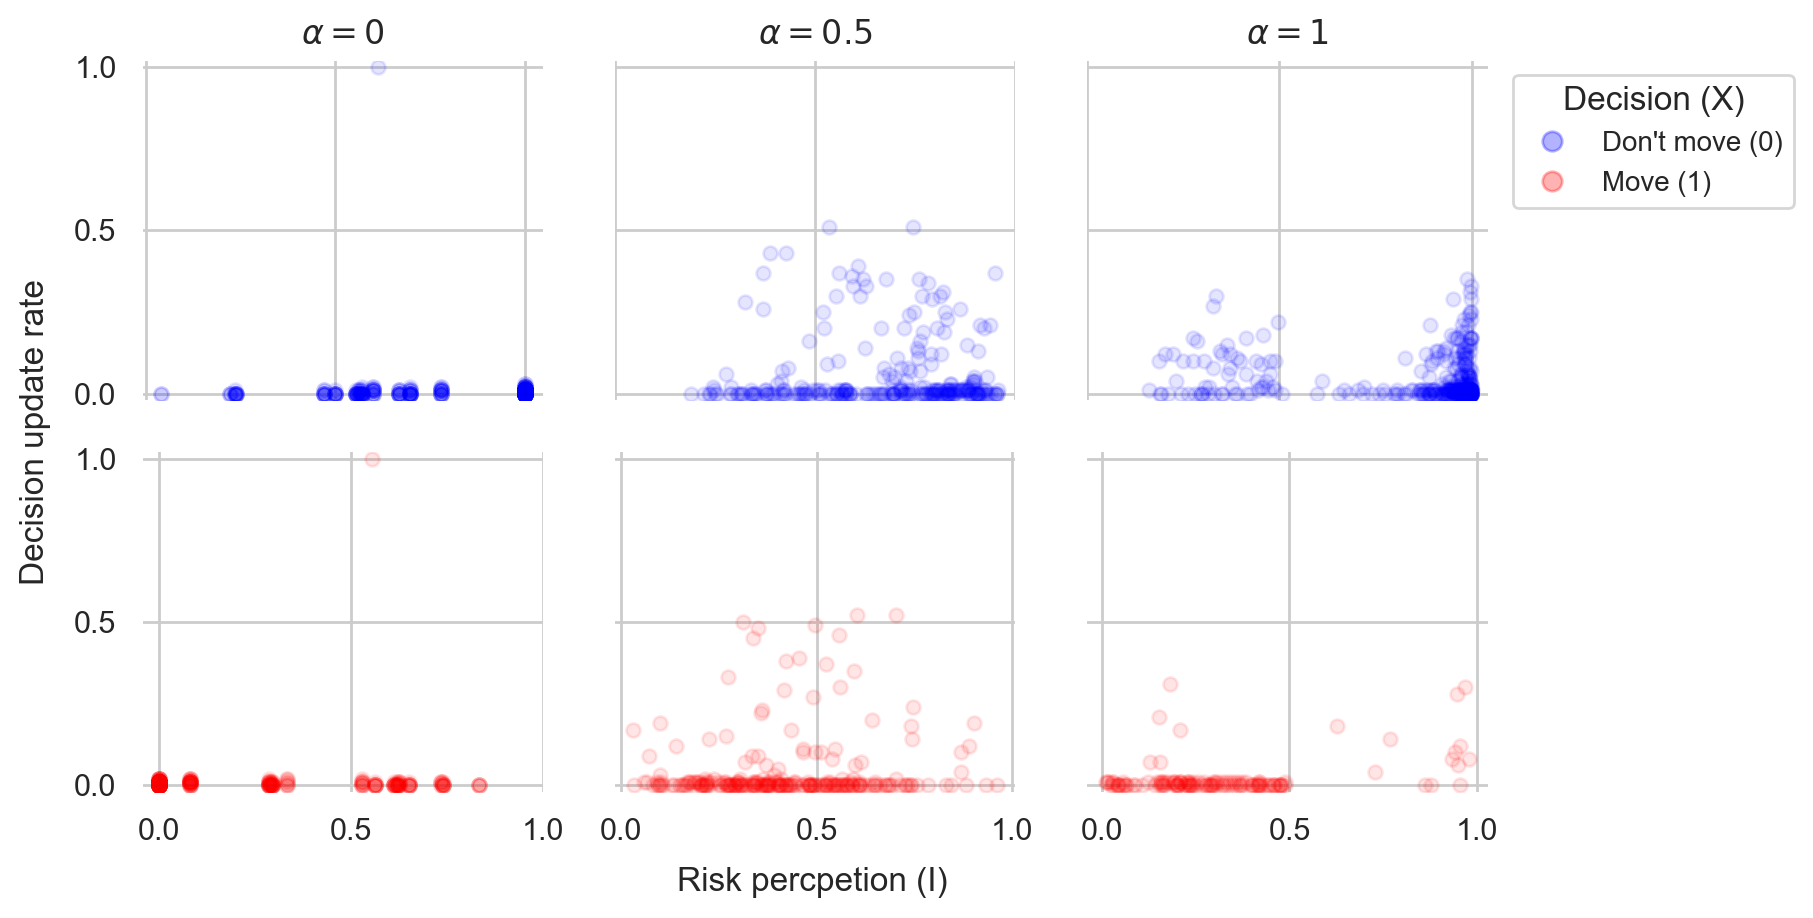

In [860]:
fig, axs = plt.subplots(2, 3, figsize=(9, 4.5))

axs[0,0].set_title(r"$\alpha = 0$")
axs[0,1].set_title(r"$\alpha = 0.5$")
axs[0,2].set_title(r"$\alpha = 1$")


axs[0,0].scatter(alpha_0_I_0  , alpha_0_update_0 , marker='o', s = 25, alpha = 0.1, color="blue")
axs[0,1].scatter(alpha_05_I_0 , alpha_05_update_0 , marker='o', s = 25, alpha = 0.1, color="blue")
axs[0,2].scatter(alpha_1_I_0 , alpha_1_update_0 , marker='o', s = 25, alpha = 0.1, color="blue")

axs[1,0].scatter(alpha_0_I_1  , alpha_0_update_1 , marker='o', s = 25, alpha = 0.1, color="red")
axs[1,1].scatter(alpha_05_I_1 , alpha_05_update_1 , marker='o', s = 25, alpha = 0.1, color="red")
axs[1,2].scatter(alpha_1_I_1 , alpha_1_update_1 , marker='o', s = 25, alpha = 0.1, color="red")


for i in [0,1]:
    for j in [0,1,2]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  
    

axs[0][0].set_xticklabels([])
axs[0][1].set_xticklabels([])
axs[0][2].set_xticklabels([])


axs[0][1].set_yticklabels([])
axs[0][2].set_yticklabels([])
axs[1][1].set_yticklabels([])
axs[1][2].set_yticklabels([])


# Create custom legend handles
handles = [plt.Line2D([], [], marker='o', markersize=7, color='blue', linestyle='None', alpha=0.3),
           plt.Line2D([], [], marker='o', markersize=7, color='red', linestyle='None', alpha=0.3)]

axs[0,2].legend(handles, ["Don't move (0)", "Move (1)"], ncol=1, bbox_to_anchor=(1.8, 1), loc = "best" ,fontsize = "small", title = "Decision (X)")


# X axis
fig.text(0.43, -0.01, 'Risk percpetion (I)', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Decision update rate', va='center', rotation='vertical')


plt.tight_layout()
plt.show()


In [769]:
# exp1_1_iter['decision_update_rate'] = (exp1_1_iter['move_counter'] + exp1_1_iter['stop_move_counter']) / exp1_1_iter['Step']
# exp1_1_iter['stop_move_rate'] = exp1_1_iter['stop_move_counter'] / exp1_1_iter['Step']


In [54]:
exp1_1_iter_alpah_0 = exp1_1_iter.query('alpha == 0')
exp1_1_iter_alpah_02 = exp1_1_iter.query('alpha == 0.2')
exp1_1_iter_alpah_05 = exp1_1_iter.query('alpha == 0.5')
exp1_1_iter_alpah_08 = exp1_1_iter.query('alpha == 0.8')
exp1_1_iter_alpah_1 = exp1_1_iter.query('alpha == 1')

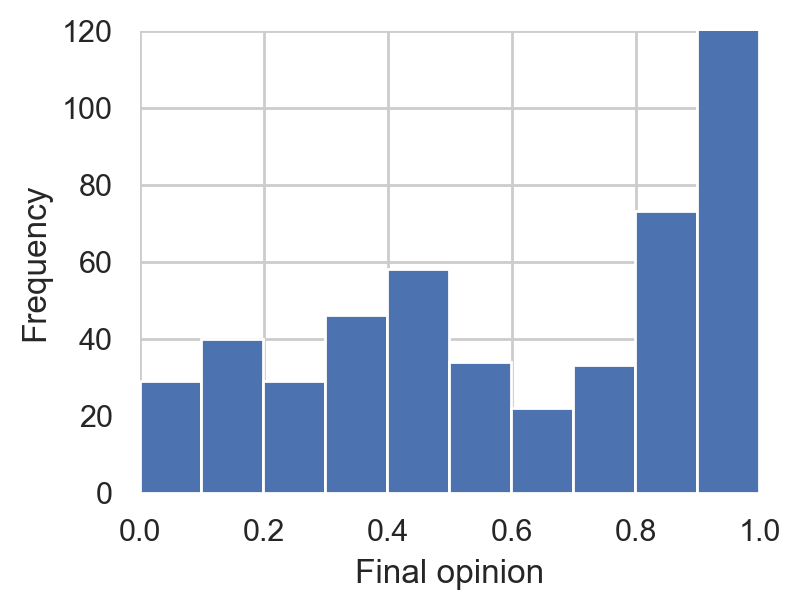

In [859]:
plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 


plt.hist(x = list(exp1_1_iter_alpah_02.query('Step == 100')['old_opinion'])) 

plt.ylim(0, 120)
plt.xlim(0,1)
plt.xlabel("Final opinion")
plt.ylabel("Frequency")
# plt.legend(bbox_to_anchor=(1, .86), ncol=1)

plt.show()

## Experiment 2, 3, 4 : impact of the indvidual attributes


### 1. Peer trust (PT = low, mid, high)

In [168]:
exp2_PT_50_iter = pd.read_csv(results_folder+"/ex2_2_PT_batchrun_50_iteration.csv")
exp2_PT_50_iter_2 = pd.read_csv(results_folder+"/ex2_2_PT_batchrun_50_iteration(2).csv")

combined_exp2_PT = pd.concat([exp2_PT_50_iter, exp2_PT_50_iter_2], ignore_index=True)

In [169]:
exp2_PT_1_iter = pd.read_csv(results_folder+"/ex2_2_PT_batchrun_single_iteration.csv")

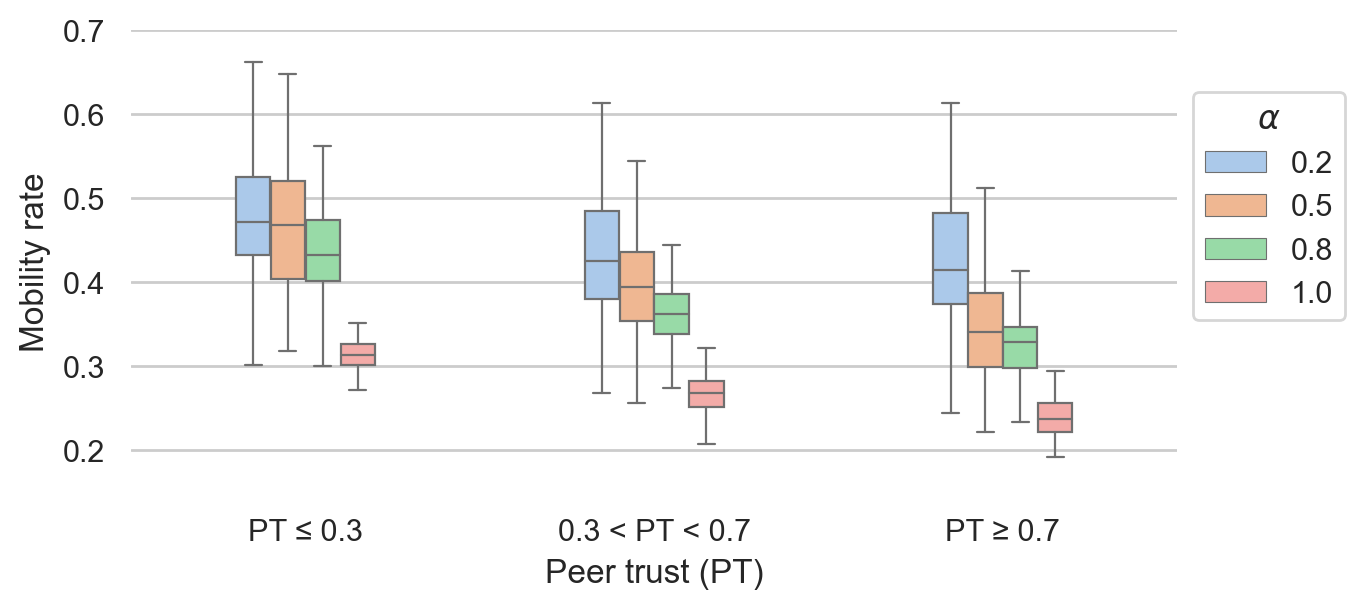

In [171]:
plt.figure(figsize=(6.75,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = combined_exp2_PT

sns.boxplot(x = 'PT' , y = 'mobility_rate' , hue = 'alpha' , data = dataset.query("Step == 100 and alpha != 0"),
           width = .4, linewidth = .8, fliersize = 0 , palette = "pastel") 

plt.ylim(0.15, 0.7)
plt.xlabel("Peer trust (PT)")
plt.ylabel("Mobility rate")

plt.gca().set_xticklabels(['PT ≤ 0.3', '0.3 < PT < 0.7', 'PT ≥ 0.7'])

plt.legend(title = r"$\alpha$", bbox_to_anchor=(1, .9))


plt.show()

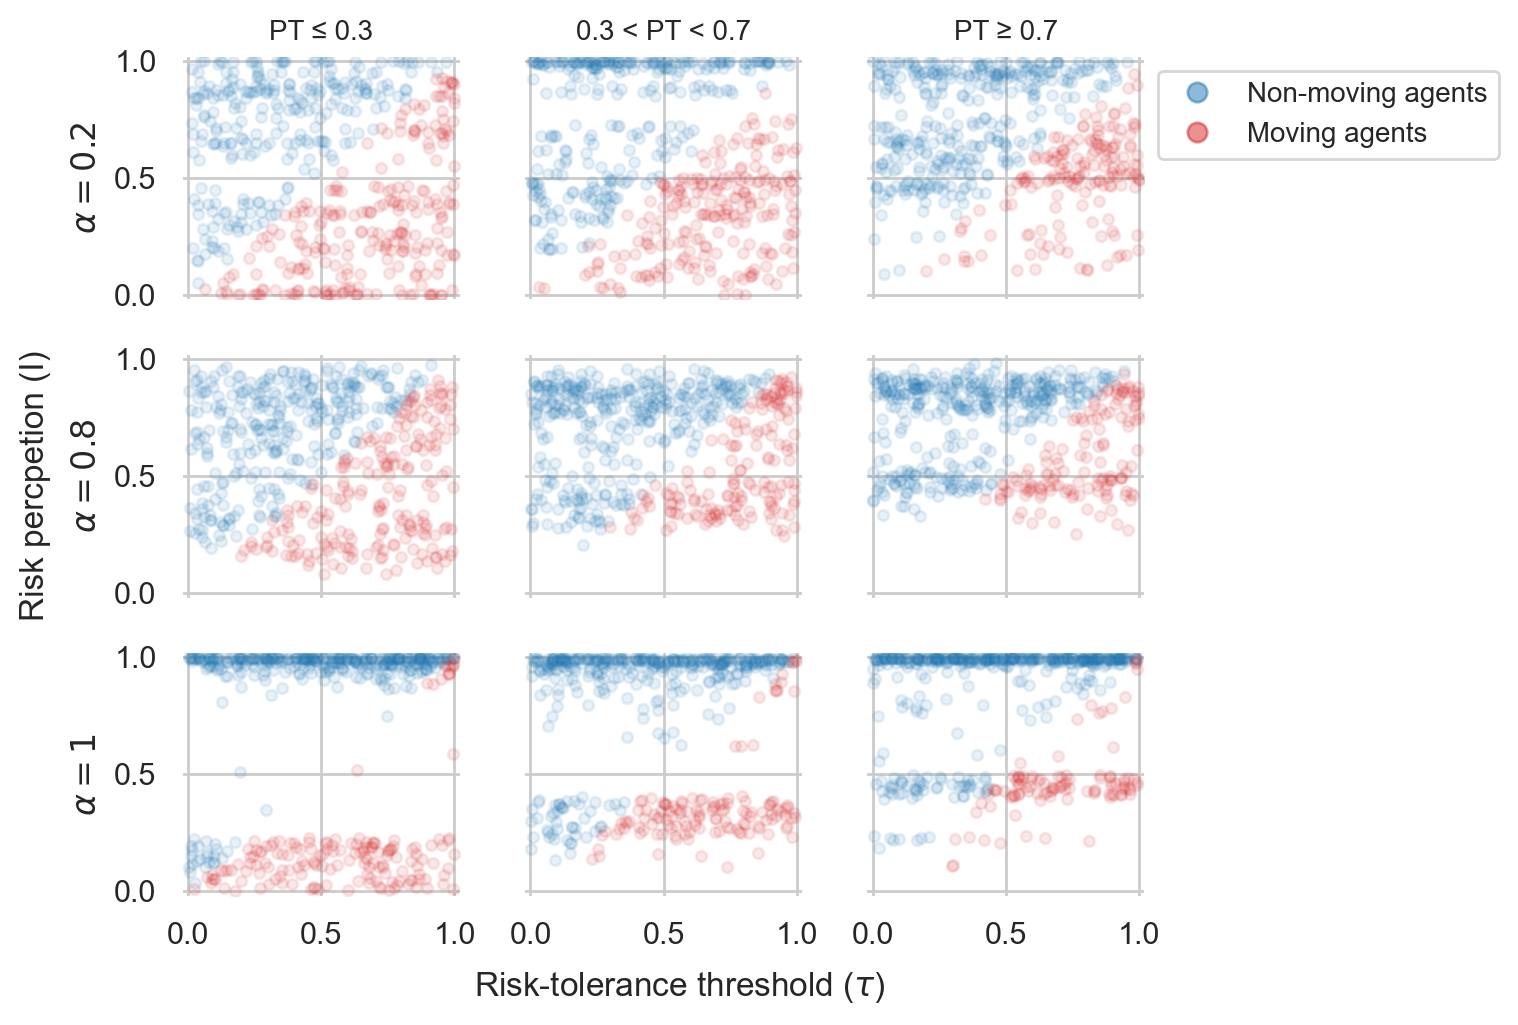

In [1095]:
fig, axs = plt.subplots(3, 3, figsize=(7.5, 5))

dataset = exp2_PT_1_iter
dots_size = 15

axs[0][0].set_title("PT ≤ 0.3", fontsize = "small")
axs[0][1].set_title("0.3 < PT < 0.7", fontsize = "small")
axs[0][2].set_title("PT ≥ 0.7", fontsize = "small")


axs[0,0].set_ylabel(r"$\alpha = 0.2$")

axs[0,0].scatter(list(dataset.query("PT == 'low' and Step == 100 and decision == 0 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("PT == 'low' and Step == 100 and decision == 0 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0,1].scatter(list(dataset.query("PT == 'mid' and Step == 100 and decision == 0 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("PT == 'mid' and Step == 100 and decision == 0 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0,2].scatter(list(dataset.query("PT == 'high' and Step == 100 and decision == 0 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("PT == 'high' and Step == 100 and decision == 0 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[0,0].scatter(list(dataset.query("PT == 'low' and Step == 100 and decision == 1 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("PT == 'low' and Step == 100 and decision == 1 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[0,1].scatter(list(dataset.query("PT == 'mid' and Step == 100 and decision == 1 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("PT == 'mid' and Step == 100 and decision == 1 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[0,2].scatter(list(dataset.query("PT == 'high' and Step == 100 and decision == 1 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("PT == 'high' and Step == 100 and decision == 1 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


axs[1,0].set_ylabel(r"$\alpha = 0.8$")

axs[1,0].scatter(list(dataset.query("PT == 'low' and Step == 100 and decision == 0 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("PT == 'low' and Step == 100 and decision == 0 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1,1].scatter(list(dataset.query("PT == 'mid' and Step == 100 and decision == 0 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("PT == 'mid' and Step == 100 and decision == 0 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1,2].scatter(list(dataset.query("PT == 'high' and Step == 100 and decision == 0 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("PT == 'high' and Step == 100 and decision == 0 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[1,0].scatter(list(dataset.query("PT == 'low' and Step == 100 and decision == 1 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("PT == 'low' and Step == 100 and decision == 1 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[1,1].scatter(list(dataset.query("PT == 'mid' and Step == 100 and decision == 1 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("PT == 'mid' and Step == 100 and decision == 1 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[1,2].scatter(list(dataset.query("PT == 'high' and Step == 100 and decision == 1 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("PT == 'high' and Step == 100 and decision == 1 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


axs[2,0].set_ylabel(r"$\alpha = 1$")

axs[2,0].scatter(list(dataset.query("PT == 'low' and Step == 100 and decision == 0 and alpha == 1")['decision_th']), 
                 list(dataset.query("PT == 'low' and Step == 100 and decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[2,1].scatter(list(dataset.query("PT == 'mid' and Step == 100 and decision == 0 and alpha == 1")['decision_th']), 
                 list(dataset.query("PT == 'mid' and Step == 100 and decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[2,2].scatter(list(dataset.query("PT == 'high' and Step == 100 and decision == 0 and alpha == 1")['decision_th']), 
                 list(dataset.query("PT == 'high' and Step == 100 and decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[2,0].scatter(list(dataset.query("PT == 'low' and Step == 100 and decision == 1 and alpha == 1")['decision_th']), 
                 list(dataset.query("PT == 'low' and Step == 100 and decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[2,1].scatter(list(dataset.query("PT == 'mid' and Step == 100 and decision == 1 and alpha == 1")['decision_th']), 
                 list(dataset.query("PT == 'mid' and Step == 100 and decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[2,2].scatter(list(dataset.query("PT == 'high' and Step == 100 and decision == 1 and alpha == 1")['decision_th']), 
                 list(dataset.query("PT == 'high' and Step == 100 and decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

for i in [0,1,2]:
    for j in [0,1,2]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xlim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  
    
        if i != 2:
            axs[i][j].set_xticklabels([])
        
        if j != 0:
            axs[i][j].set_yticklabels([])


axs[0,2].legend(scatter_handles, scatter_labels , ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# X axis
fig.text(0.43, -0.01, 'Risk-tolerance threshold ('+r"$\tau$"+")", ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Risk percpetion (I)', va='center', rotation='vertical')


# fig.text(0.38, -0.02, 'Risk-tolerance threshold ('+r"$\tau$"+")")

plt.tight_layout()
plt.show()


### not used:


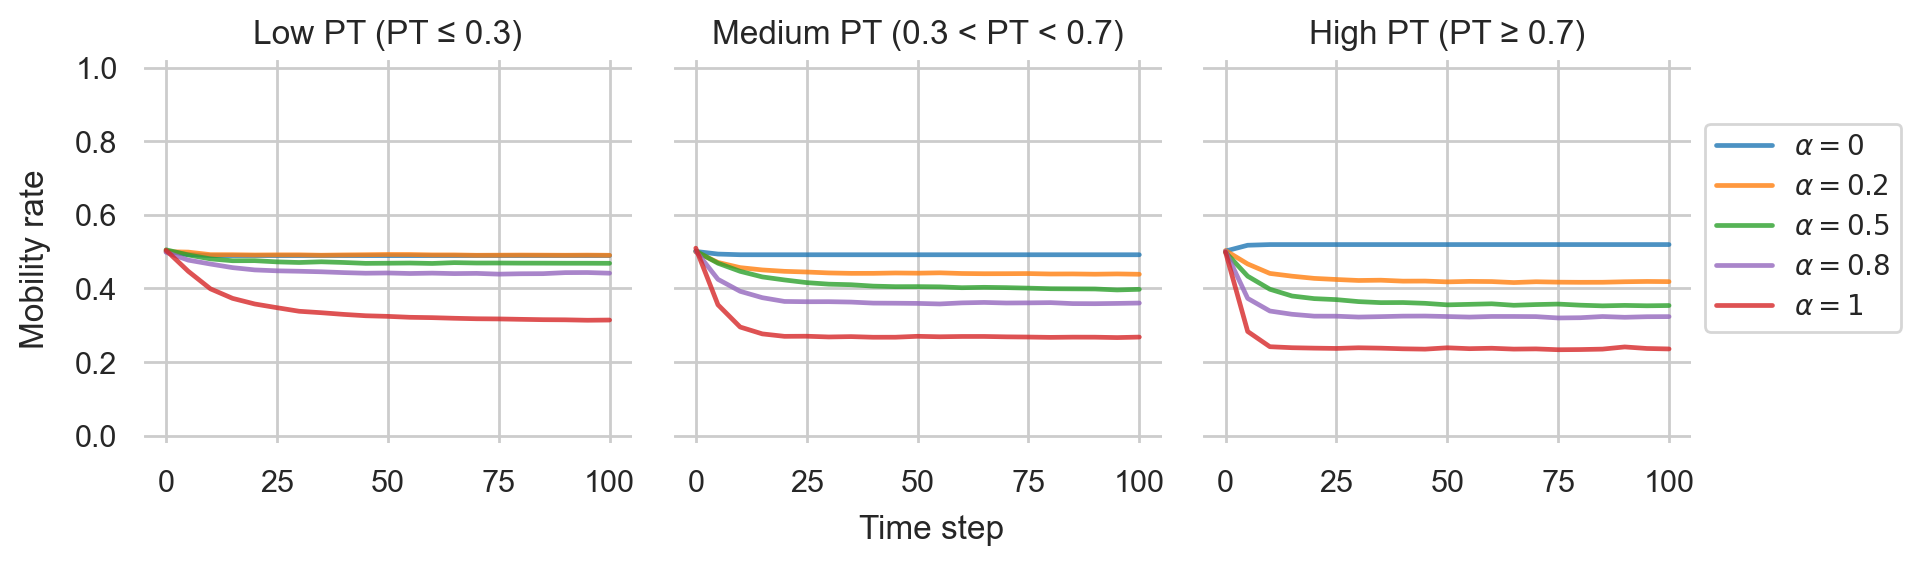

In [87]:
fig, axs = plt.subplots(1, 3, figsize=(9.5,2.75))

dataset = exp2_PT_50_iter

axs[0].set_title("Low PT (PT ≤ 0.3)")
axs[1].set_title("Medium PT (0.3 < PT < 0.7)")
axs[2].set_title("High PT (PT ≥ 0.7)")

colors = {"0" : "tab:blue" , "0.2" : "tab:orange" , "0.5" : "tab:green" , "0.8" : "tab:purple" , "1" : "tab:red"}

axs[0].plot("Step" , "mobility_rate" , data = dataset.query('PT == "low" and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$", linewidth = 1.7, alpha = .8 , color = colors["0"]) 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('PT == "low" and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", linewidth = 1.7, alpha = .8 , color = colors["0.2"]) 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('PT == "low" and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$", linewidth = 1.7, alpha = .8 , color = colors["0.5"])  
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('PT == "low" and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", linewidth = 1.7, alpha = .8 , color = colors["0.8"]) 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('PT == "low" and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", linewidth = 1.7, alpha = .8 , color = colors["1"]) 

axs[1].plot("Step" , "mobility_rate" , data = dataset.query('PT == "mid" and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$", linewidth = 1.7, alpha = .8 , color = colors["0"]) 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('PT == "mid" and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", linewidth = 1.7, alpha = .8 , color = colors["0.2"]) 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('PT == "mid" and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$", linewidth = 1.7, alpha = .8 , color = colors["0.5"])  
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('PT == "mid" and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", linewidth = 1.7, alpha = .8 , color = colors["0.8"]) 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('PT == "mid" and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", linewidth = 1.7, alpha = .8 , color = colors["1"]) 

axs[2].plot("Step" , "mobility_rate" , data = dataset.query('PT == "high"  and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$", linewidth = 1.7, alpha = .8 , color = colors["0"]) 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('PT == "high"  and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", linewidth = 1.7, alpha = .8 , color = colors["0.2"]) 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('PT == "high"  and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$", linewidth = 1.7, alpha = .8 , color = colors["0.5"])  
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('PT == "high"  and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", linewidth = 1.7, alpha = .8 , color = colors["0.8"]) 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('PT == "high"  and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", linewidth = 1.7, alpha = .8 , color = colors["1"]) 

for i in [0,1,2]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)

    axs[i].set_ylim(-0.02,1.02)

axs[1].set_yticklabels([])
axs[2].set_yticklabels([])

axs[2].legend(ncol=1, bbox_to_anchor=(1, .87), loc = "best" ,fontsize = "small")

# X axis
fig.text(0.47, -0.01, 'Time step', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Mobility rate', va='center', rotation='vertical')


plt.tight_layout()
plt.show()


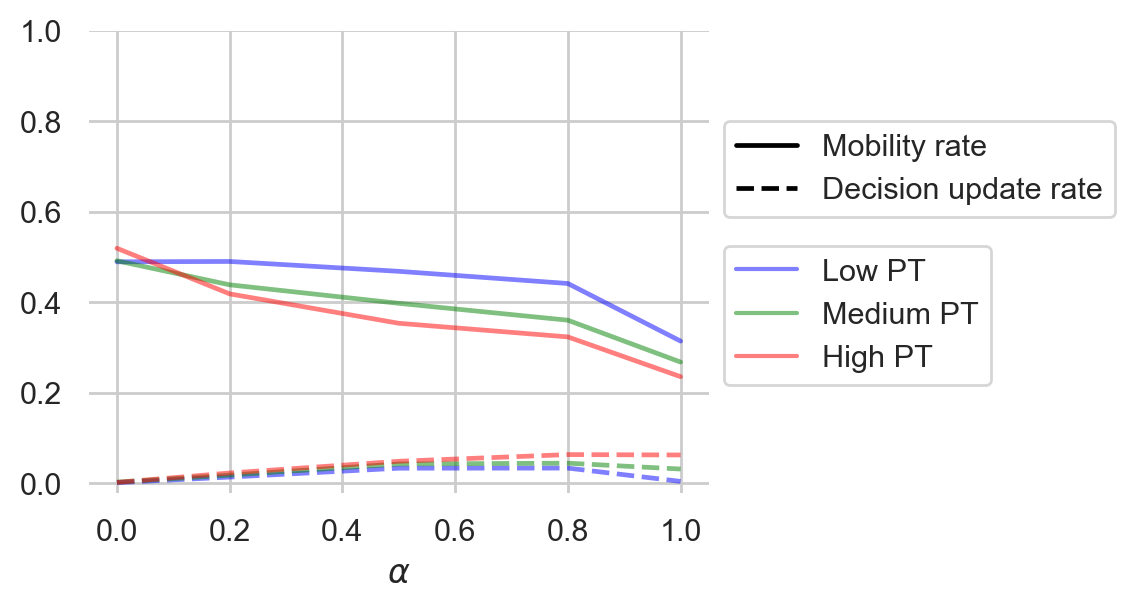

In [93]:
plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp2_PT_50_iter
    
sns.lineplot(x = "alpha" , y = "mobility_rate" , data = dataset.query('PT == "low" and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(), color = "blue" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "mobility_rate" , data = dataset.query('PT == "mid" and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(), color = "green" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "mobility_rate" , data = dataset.query('PT == "high" and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(),  color = "red" , linewidth = 1.7, alpha = .5) 

sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = dataset.query('PT == "low" and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index() , linestyle='--', color = "blue" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = dataset.query('PT == "mid" and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index() , linestyle='--', color = "green" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = dataset.query('PT == "high" and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index(), linestyle='--',color = "red" , linewidth = 1.7, alpha = .5) 

plt.ylim(-0.02,1)
plt.xlabel(r"$\alpha$")
plt.ylabel("")


legend1 = plt.legend(handles = [plt.Line2D([0], [0], color="blue", label='Low PT', alpha = .5),
                              plt.Line2D([0], [0], color="green", label='Medium PT', alpha = .5),
                              plt.Line2D([0], [0], color="red", label='High PT', alpha = .5)],
                              bbox_to_anchor=(1, 0.2), loc='lower left')

plt.gca().add_artist(legend1)  # Add the first legend back to the plot

legend_lines = [plt.Line2D([0], [0], linestyle='-', color='black', lw=1.7),
                plt.Line2D([0], [0], linestyle='--', color='black', lw=1.7)]

legend2 = plt.legend(legend_lines, ["Mobility rate", "Decision update rate"], bbox_to_anchor=(1, 0.7), loc='center left')


plt.show()

### 3. Tendency to share (B = low, mid, high)

In [4]:
exp2_B_50_iter = pd.read_csv(results_folder+"/ex2_3_B_batchrun_50_iteration.csv")
exp2_B_50_iter_2 = pd.read_csv(results_folder+"/ex2_3_B_batchrun_50_iteration(2).csv")

combined_exp2_B = pd.concat([exp2_B_50_iter, exp2_B_50_iter_2], ignore_index=True)

In [5]:
exp2_B_1_iter = pd.read_csv(results_folder+"/ex2_3_B_batchrun_single_iteration.csv")

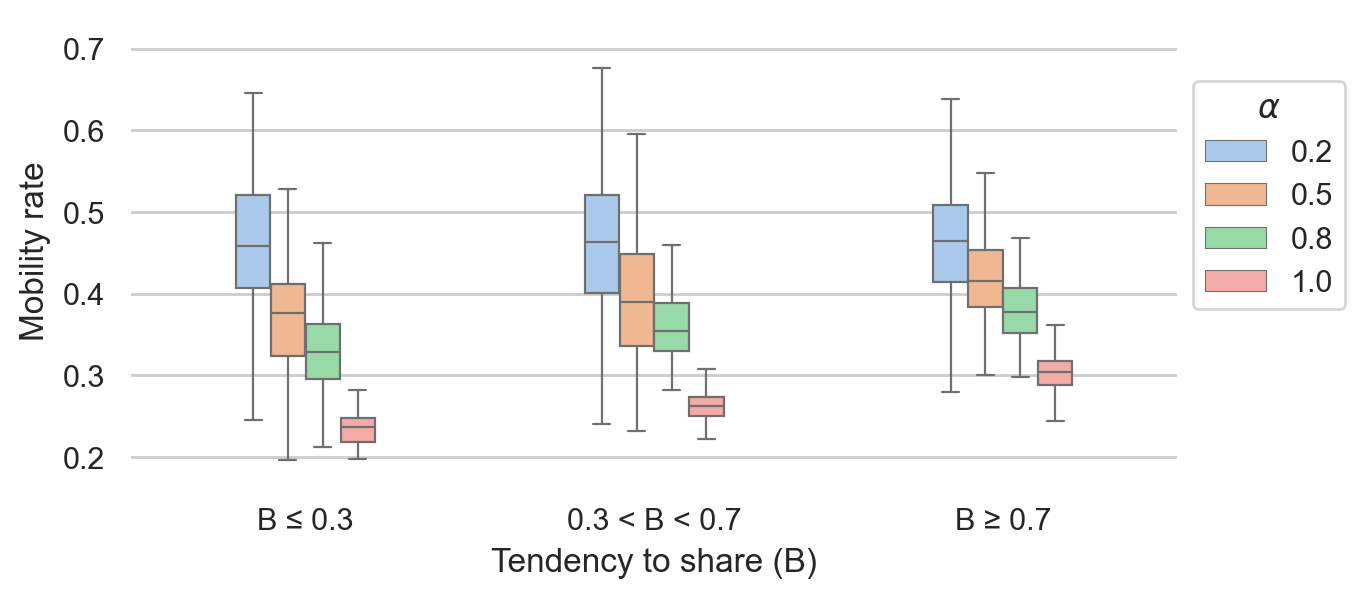

In [1217]:
plt.figure(figsize=(6.75,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = combined_exp2_B

sns.boxplot(x = 'B' , y = 'mobility_rate' , hue = 'alpha' , data = dataset.query("Step == 100 and alpha != 0"),
           width = .4, linewidth = .8, fliersize = 0 , palette = "pastel") 

# plt.ylim(0.15, 0.7)
plt.xlabel("Tendency to share (B)")
plt.ylabel("Mobility rate")

plt.gca().set_xticklabels(['B ≤ 0.3', '0.3 < B < 0.7', 'B ≥ 0.7'])

plt.legend(title = r"$\alpha$", bbox_to_anchor=(1, .9))




plt.show()

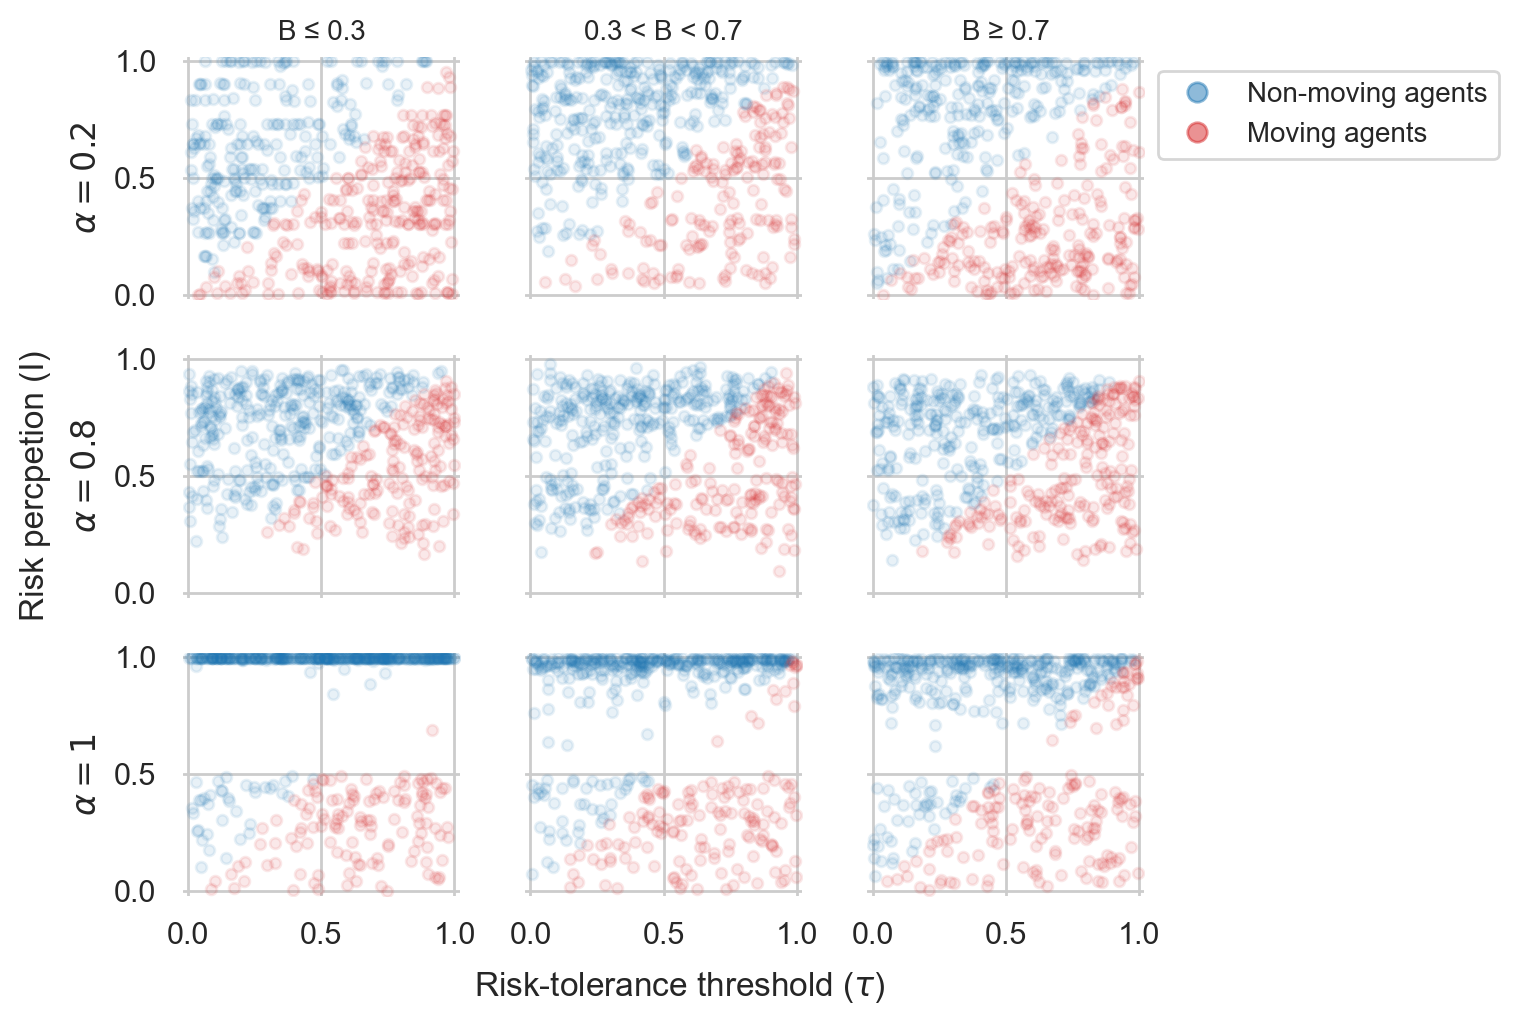

In [1100]:
fig, axs = plt.subplots(3, 3, figsize=(7.5, 5))

dataset = exp2_B_1_iter
dots_size = 15

axs[0][0].set_title("B ≤ 0.3" , fontsize = "small")
axs[0][1].set_title("0.3 < B < 0.7" , fontsize = "small")
axs[0][2].set_title("B ≥ 0.7" , fontsize = "small")


axs[0,0].set_ylabel(r"$\alpha = 0.2$")

axs[0,0].scatter(list(dataset.query("B == 'low' and Step == 100 and decision == 0 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("B == 'low' and Step == 100 and decision == 0 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0,1].scatter(list(dataset.query("B == 'mid' and Step == 100 and decision == 0 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("B == 'mid' and Step == 100 and decision == 0 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0,2].scatter(list(dataset.query("B == 'high' and Step == 100 and decision == 0 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("B == 'high' and Step == 100 and decision == 0 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[0,0].scatter(list(dataset.query("B == 'low' and Step == 100 and decision == 1 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("B == 'low' and Step == 100 and decision == 1 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[0,1].scatter(list(dataset.query("B == 'mid' and Step == 100 and decision == 1 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("B == 'mid' and Step == 100 and decision == 1 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[0,2].scatter(list(dataset.query("B == 'high' and Step == 100 and decision == 1 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("B == 'high' and Step == 100 and decision == 1 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


axs[1,0].set_ylabel(r"$\alpha = 0.8$")

axs[1,0].scatter(list(dataset.query("B == 'low' and Step == 100 and decision == 0 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("B == 'low' and Step == 100 and decision == 0 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1,1].scatter(list(dataset.query("B == 'mid' and Step == 100 and decision == 0 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("B == 'mid' and Step == 100 and decision == 0 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1,2].scatter(list(dataset.query("B == 'high' and Step == 100 and decision == 0 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("B == 'high' and Step == 100 and decision == 0 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[1,0].scatter(list(dataset.query("B == 'low' and Step == 100 and decision == 1 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("B == 'low' and Step == 100 and decision == 1 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[1,1].scatter(list(dataset.query("B == 'mid' and Step == 100 and decision == 1 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("B == 'mid' and Step == 100 and decision == 1 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[1,2].scatter(list(dataset.query("B == 'high' and Step == 100 and decision == 1 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("B == 'high' and Step == 100 and decision == 1 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


axs[2,0].set_ylabel(r"$\alpha = 1$")

axs[2,0].scatter(list(dataset.query("B == 'low' and Step == 100 and decision == 0 and alpha == 1")['decision_th']), 
                 list(dataset.query("B == 'low' and Step == 100 and decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[2,1].scatter(list(dataset.query("B == 'mid' and Step == 100 and decision == 0 and alpha == 1")['decision_th']), 
                 list(dataset.query("B == 'mid' and Step == 100 and decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[2,2].scatter(list(dataset.query("B == 'high' and Step == 100 and decision == 0 and alpha == 1")['decision_th']), 
                 list(dataset.query("B == 'high' and Step == 100 and decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[2,0].scatter(list(dataset.query("B == 'low' and Step == 100 and decision == 1 and alpha == 1")['decision_th']), 
                 list(dataset.query("B == 'low' and Step == 100 and decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[2,1].scatter(list(dataset.query("B == 'mid' and Step == 100 and decision == 1 and alpha == 1")['decision_th']), 
                 list(dataset.query("B == 'mid' and Step == 100 and decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[2,2].scatter(list(dataset.query("B == 'high' and Step == 100 and decision == 1 and alpha == 1")['decision_th']), 
                 list(dataset.query("B == 'high' and Step == 100 and decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

for i in [0,1,2]:
    for j in [0,1,2]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xlim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  
    
        if i != 2:
            axs[i][j].set_xticklabels([])
        
        if j != 0:
            axs[i][j].set_yticklabels([])


axs[0,2].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# X axis
fig.text(0.43, -0.01, 'Risk-tolerance threshold ('+r"$\tau$"+")", ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Risk percpetion (I)', va='center', rotation='vertical')


# fig.text(0.38, -0.02, 'Risk-tolerance threshold ('+r"$\tau$"+")")

plt.tight_layout()
plt.show()


### not used

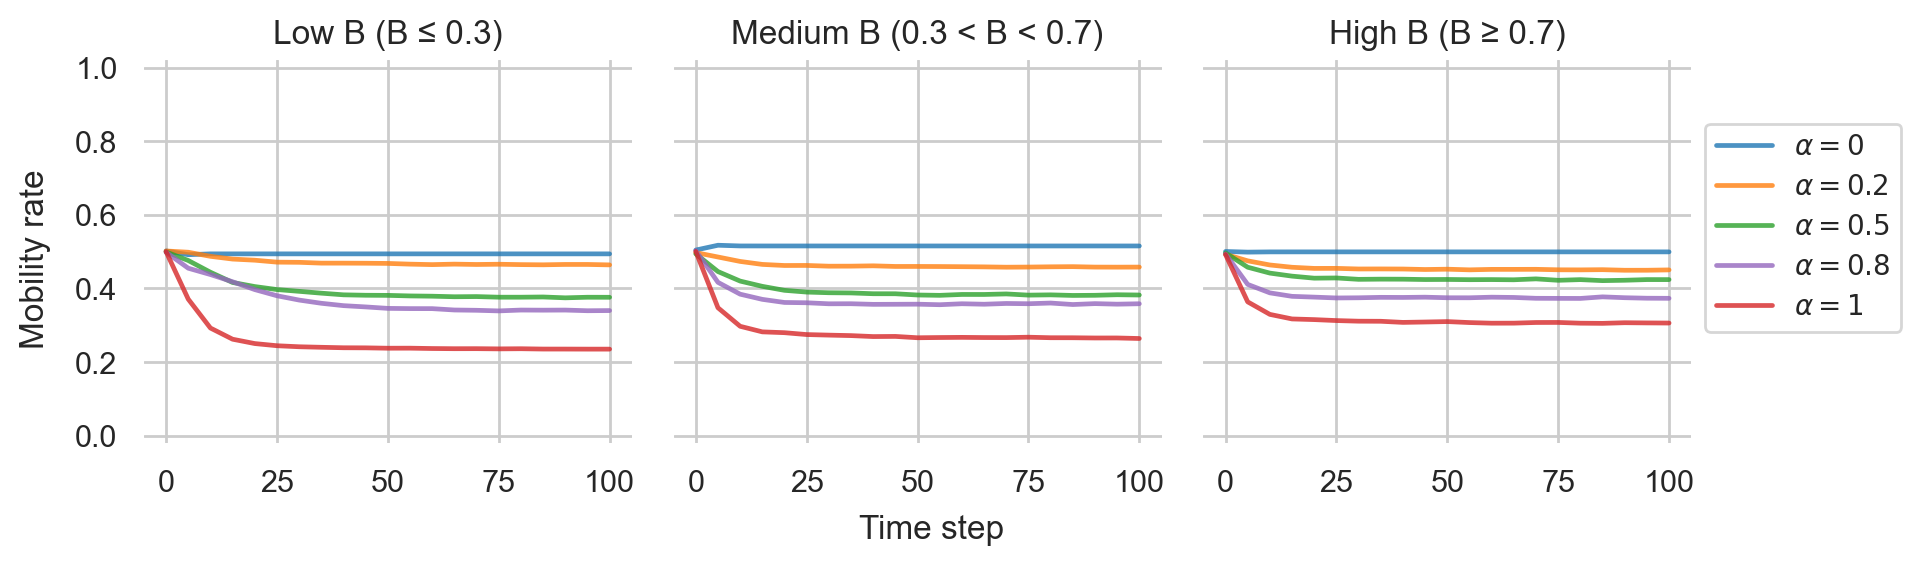

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(9.5,2.75))

dataset = exp2_B_50_iter

axs[0].set_title("Low B (B ≤ 0.3)")
axs[1].set_title("Medium B (0.3 < B < 0.7)")
axs[2].set_title("High B (B ≥ 0.7)")

colors = {"0" : "tab:blue" , "0.2" : "tab:orange" , "0.5" : "tab:green" , "0.8" : "tab:purple" , "1" : "tab:red"}

axs[0].plot("Step" , "mobility_rate" , data = dataset.query('B == "low" and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$", linewidth = 1.7, alpha = .8 , color = colors["0"]) 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('B == "low" and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", linewidth = 1.7, alpha = .8 , color = colors["0.2"]) 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('B == "low" and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$", linewidth = 1.7, alpha = .8 , color = colors["0.5"])  
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('B == "low" and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", linewidth = 1.7, alpha = .8 , color = colors["0.8"]) 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('B == "low" and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", linewidth = 1.7, alpha = .8 , color = colors["1"]) 

axs[1].plot("Step" , "mobility_rate" , data = dataset.query('B == "mid" and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$", linewidth = 1.7, alpha = .8 , color = colors["0"]) 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('B == "mid" and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", linewidth = 1.7, alpha = .8 , color = colors["0.2"]) 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('B == "mid" and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$", linewidth = 1.7, alpha = .8 , color = colors["0.5"])  
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('B == "mid" and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", linewidth = 1.7, alpha = .8 , color = colors["0.8"]) 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('B == "mid" and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", linewidth = 1.7, alpha = .8 , color = colors["1"]) 

axs[2].plot("Step" , "mobility_rate" , data = dataset.query('B == "high"  and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$", linewidth = 1.7, alpha = .8 , color = colors["0"]) 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('B == "high"  and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", linewidth = 1.7, alpha = .8 , color = colors["0.2"]) 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('B == "high"  and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$", linewidth = 1.7, alpha = .8 , color = colors["0.5"])  
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('B == "high"  and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", linewidth = 1.7, alpha = .8 , color = colors["0.8"]) 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('B == "high"  and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", linewidth = 1.7, alpha = .8 , color = colors["1"]) 

for i in [0,1,2]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)

    axs[i].set_ylim(-0.02,1.02)

axs[1].set_yticklabels([])
axs[2].set_yticklabels([])

axs[2].legend(ncol=1, bbox_to_anchor=(1, .87), loc = "best" ,fontsize = "small")

# X axis
fig.text(0.47, -0.01, 'Time step', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Mobility rate', va='center', rotation='vertical')


plt.tight_layout()
plt.show()


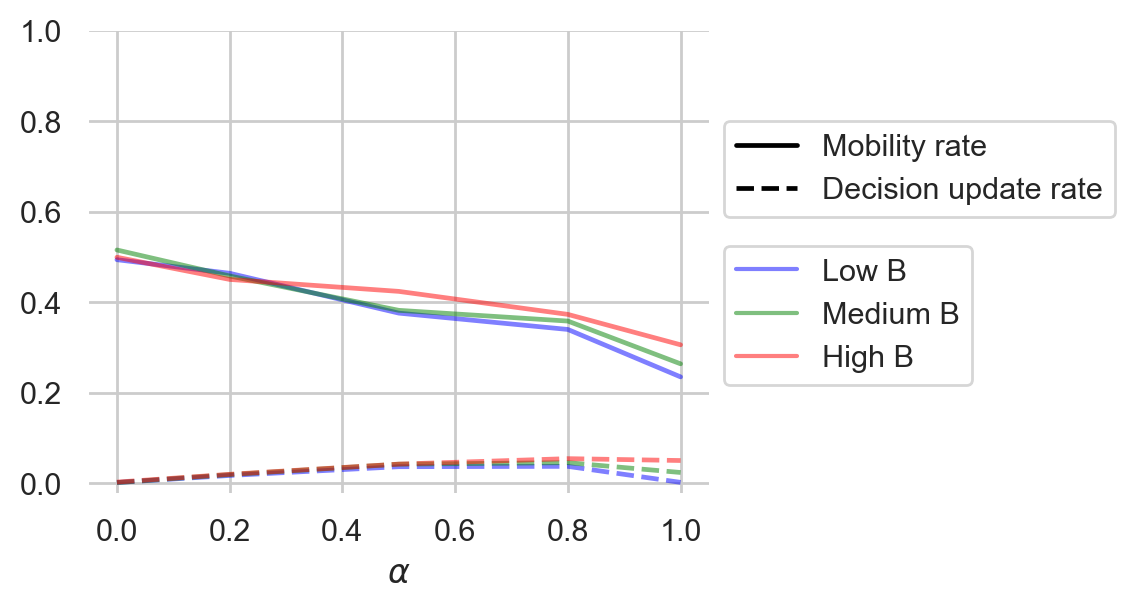

In [94]:
plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp2_B_50_iter
    
sns.lineplot(x = "alpha" , y = "mobility_rate" , data = dataset.query('B == "low" and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(), color = "blue" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "mobility_rate" , data = dataset.query('B == "mid" and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(), color = "green" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "mobility_rate" , data = dataset.query('B == "high" and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(),  color = "red" , linewidth = 1.7, alpha = .5) 

sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = dataset.query('B == "low" and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index() , linestyle='--', color = "blue" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = dataset.query('B == "mid" and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index() , linestyle='--', color = "green" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = dataset.query('B == "high" and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index(), linestyle='--',color = "red" , linewidth = 1.7, alpha = .5) 

plt.ylim(-0.02,1)
plt.xlabel(r"$\alpha$")
plt.ylabel("")


legend1 = plt.legend(handles = [plt.Line2D([0], [0], color="blue", label='Low B', alpha = .5),
                              plt.Line2D([0], [0], color="green", label='Medium B', alpha = .5),
                              plt.Line2D([0], [0], color="red", label='High B', alpha = .5)],
                              bbox_to_anchor=(1, 0.2), loc='lower left')

plt.gca().add_artist(legend1)  # Add the first legend back to the plot

legend_lines = [plt.Line2D([0], [0], linestyle='-', color='black', lw=1.7),
                plt.Line2D([0], [0], linestyle='--', color='black', lw=1.7)]

legend2 = plt.legend(legend_lines, ["Mobility rate", "Decision update rate"], bbox_to_anchor=(1, 0.7), loc='center left')


plt.show()

### 1. Risk sensitivity (R = 0 , 1, 2)

In [1101]:
exp2_R_50_iter = pd.read_csv(results_folder+"/ex2_1_R_batchrun_50_iteration.csv")
exp2_R_50_iter_2 = pd.read_csv(results_folder+"/ex2_1_R_batchrun_50_iteration(2).csv")

combined_exp2_R = pd.concat([exp2_R_50_iter, exp2_R_50_iter_2], ignore_index=True)

In [1102]:
exp2_R_1_iter = pd.read_csv(results_folder+"/ex2_1_R_batchrun_single_iteration.csv")


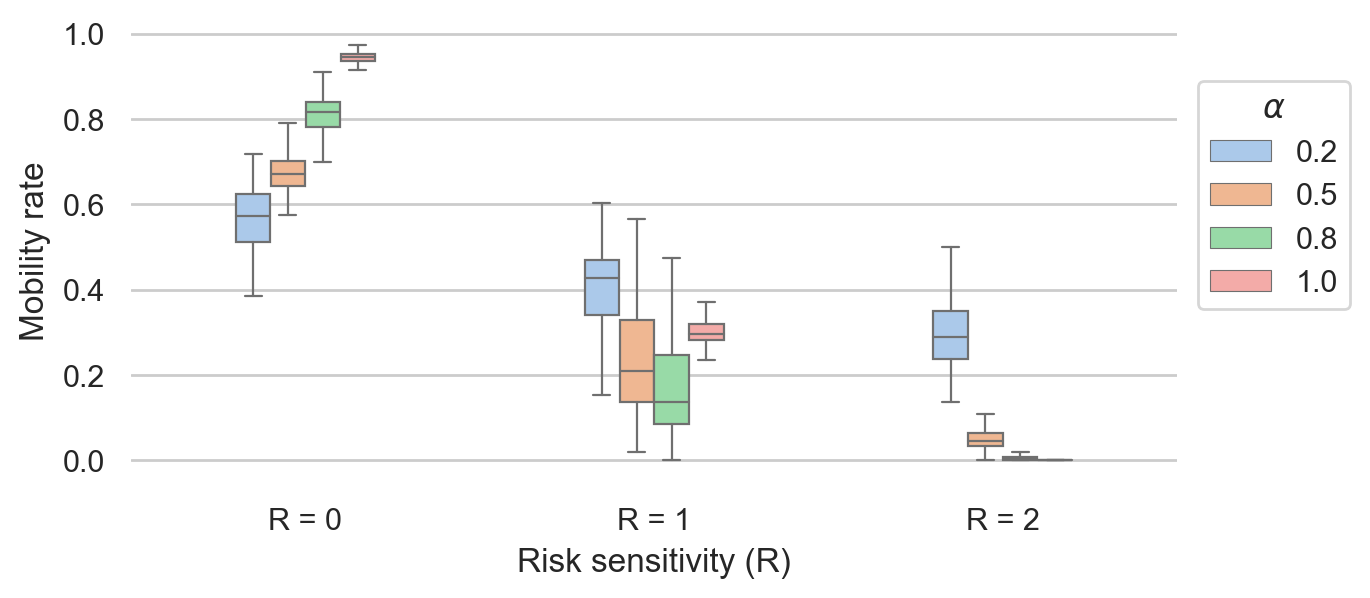

In [1218]:
plt.figure(figsize=(6.75,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = combined_exp2_R

sns.boxplot(x = 'R' , y = 'mobility_rate' , hue = 'alpha' , data = dataset.query("Step == 100 and alpha != 0"),
           width = .4, linewidth = .8, fliersize = 0 , palette = "pastel") 

# plt.ylim(0.2,0.7)
plt.xlabel("Risk sensitivity (R)")
plt.ylabel("Mobility rate")

plt.gca().set_xticklabels(['R = 0', 'R = 1', 'R = 2'])

plt.legend(title = r"$\alpha$", bbox_to_anchor=(1.18, .9))



plt.show()

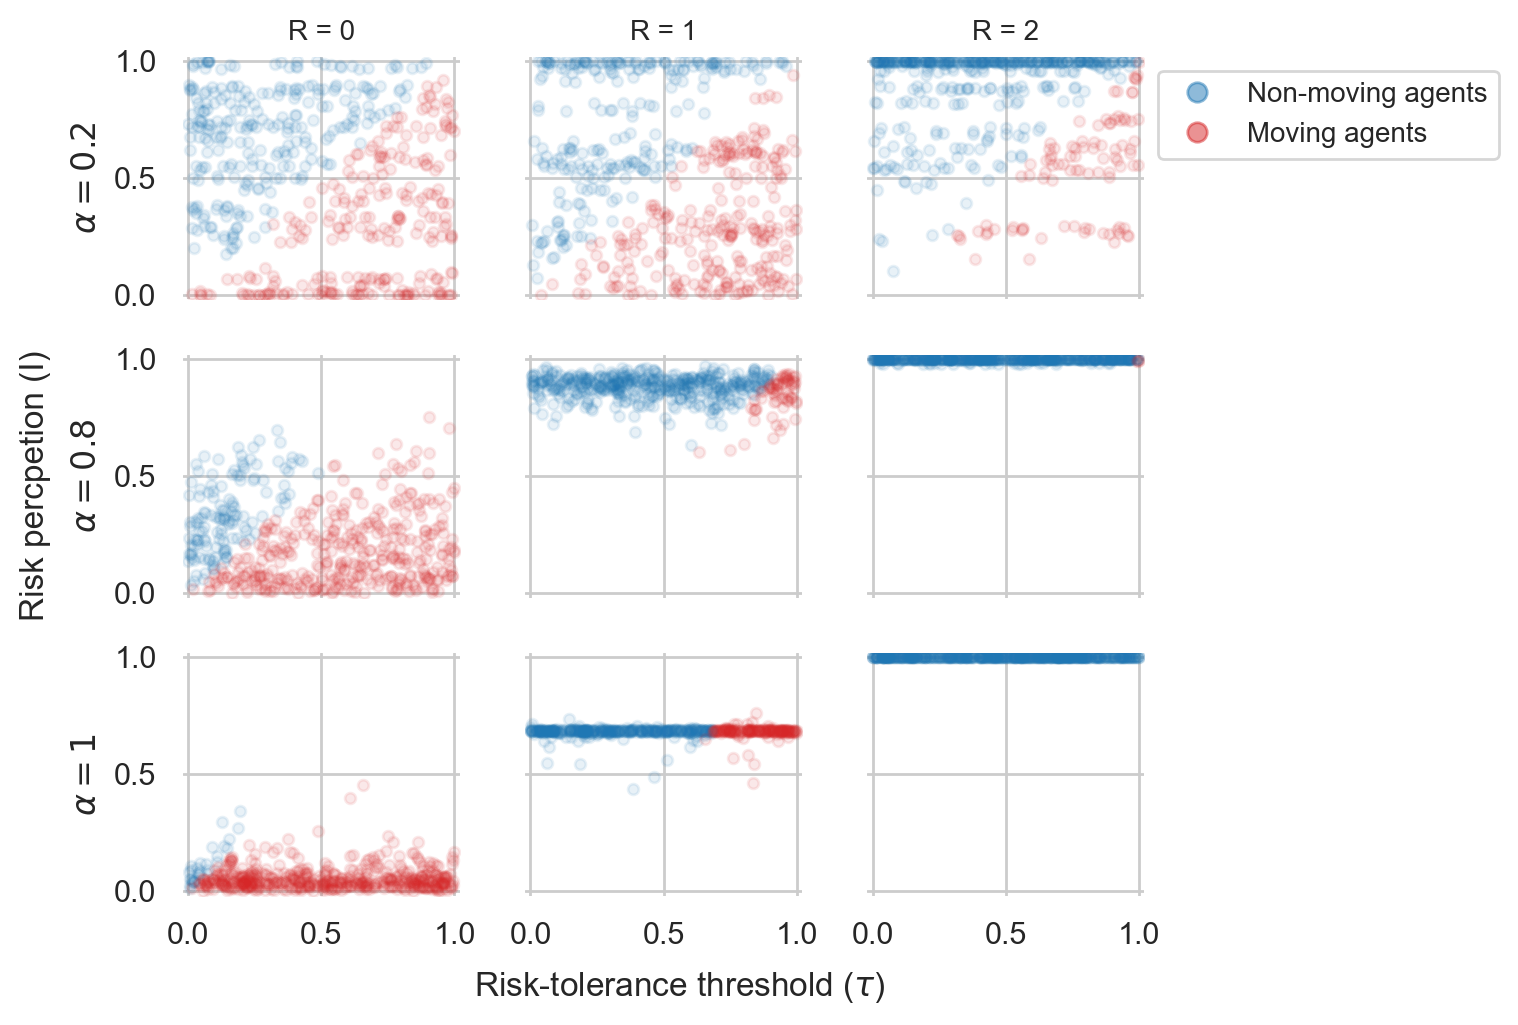

In [1104]:
fig, axs = plt.subplots(3, 3, figsize=(7.5, 5))

dataset = exp2_R_1_iter
dots_size = 15

axs[0,0].set_title("R = 0" , fontsize = "small")
axs[0,1].set_title("R = 1" , fontsize = "small")
axs[0,2].set_title("R = 2" , fontsize = "small")

axs[0,0].set_ylabel(r"$\alpha = 0.2$")

axs[0,0].scatter(list(dataset.query("R == 0 and Step == 100 and decision == 0 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("R == 0 and Step == 100 and decision == 0 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0,1].scatter(list(dataset.query("R == 1 and Step == 100 and decision == 0 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("R == 1 and Step == 100 and decision == 0 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0,2].scatter(list(dataset.query("R == 2 and Step == 100 and decision == 0 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("R == 2 and Step == 100 and decision == 0 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[0,0].scatter(list(dataset.query("R == 0 and Step == 100 and decision == 1 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("R == 0 and Step == 100 and decision == 1 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[0,1].scatter(list(dataset.query("R == 1 and Step == 100 and decision == 1 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("R == 1 and Step == 100 and decision == 1 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[0,2].scatter(list(dataset.query("R == 2 and Step == 100 and decision == 1 and alpha == 0.2")['decision_th']), 
                 list(dataset.query("R == 2 and Step == 100 and decision == 1 and alpha == 0.2")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


axs[1,0].set_ylabel(r"$\alpha = 0.8$")

axs[1,0].scatter(list(dataset.query("R == 0 and Step == 100 and decision == 0 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("R == 0 and Step == 100 and decision == 0 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1,1].scatter(list(dataset.query("R == 1 and Step == 100 and decision == 0 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("R == 1 and Step == 100 and decision == 0 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1,2].scatter(list(dataset.query("R == 2 and Step == 100 and decision == 0 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("R == 2 and Step == 100 and decision == 0 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[1,0].scatter(list(dataset.query("R == 0 and Step == 100 and decision == 1 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("R == 0 and Step == 100 and decision == 1 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[1,1].scatter(list(dataset.query("R == 1 and Step == 100 and decision == 1 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("R == 1 and Step == 100 and decision == 1 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[1,2].scatter(list(dataset.query("R == 2 and Step == 100 and decision == 1 and alpha == 0.8")['decision_th']), 
                 list(dataset.query("R == 2 and Step == 100 and decision == 1 and alpha == 0.8")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[2,0].set_ylabel(r"$\alpha = 1$")

axs[2,0].scatter(list(dataset.query("R == 0 and Step == 100 and decision == 0 and alpha == 1")['decision_th']), 
                 list(dataset.query("R == 0 and Step == 100 and decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[2,1].scatter(list(dataset.query("R == 1 and Step == 100 and decision == 0 and alpha == 1")['decision_th']), 
                 list(dataset.query("R == 1 and Step == 100 and decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[2,2].scatter(list(dataset.query("R == 2 and Step == 100 and decision == 0 and alpha == 1")['decision_th']), 
                 list(dataset.query("R == 2 and Step == 100 and decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])

axs[2,0].scatter(list(dataset.query("R == 0 and Step == 100 and decision == 1 and alpha == 1")['decision_th']), 
                 list(dataset.query("R == 0 and Step == 100 and decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[2,1].scatter(list(dataset.query("R == 1 and Step == 100 and decision == 1 and alpha == 1")['decision_th']), 
                 list(dataset.query("R == 1 and Step == 100 and decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])
axs[2,2].scatter(list(dataset.query("R == 2 and Step == 100 and decision == 1 and alpha == 1")['decision_th']), 
                 list(dataset.query("R == 2 and Step == 100 and decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


for i in [0,1,2]:
    for j in [0,1,2]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xlim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  
    
        if i != 2:
            axs[i][j].set_xticklabels([])
        
        if j != 0:
            axs[i][j].set_yticklabels([])
            

# Create custom legend handles
handles = [plt.Line2D([], [], marker='o', markersize=7, color='blue', linestyle='None', alpha=0.3),
           plt.Line2D([], [], marker='o', markersize=7, color='red', linestyle='None', alpha=0.3)]

axs[0,2].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# X axis
fig.text(0.43, -0.01, 'Risk-tolerance threshold ('+r"$\tau$"+")", ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Risk percpetion (I)', va='center', rotation='vertical')


plt.tight_layout()
plt.show()


### not used

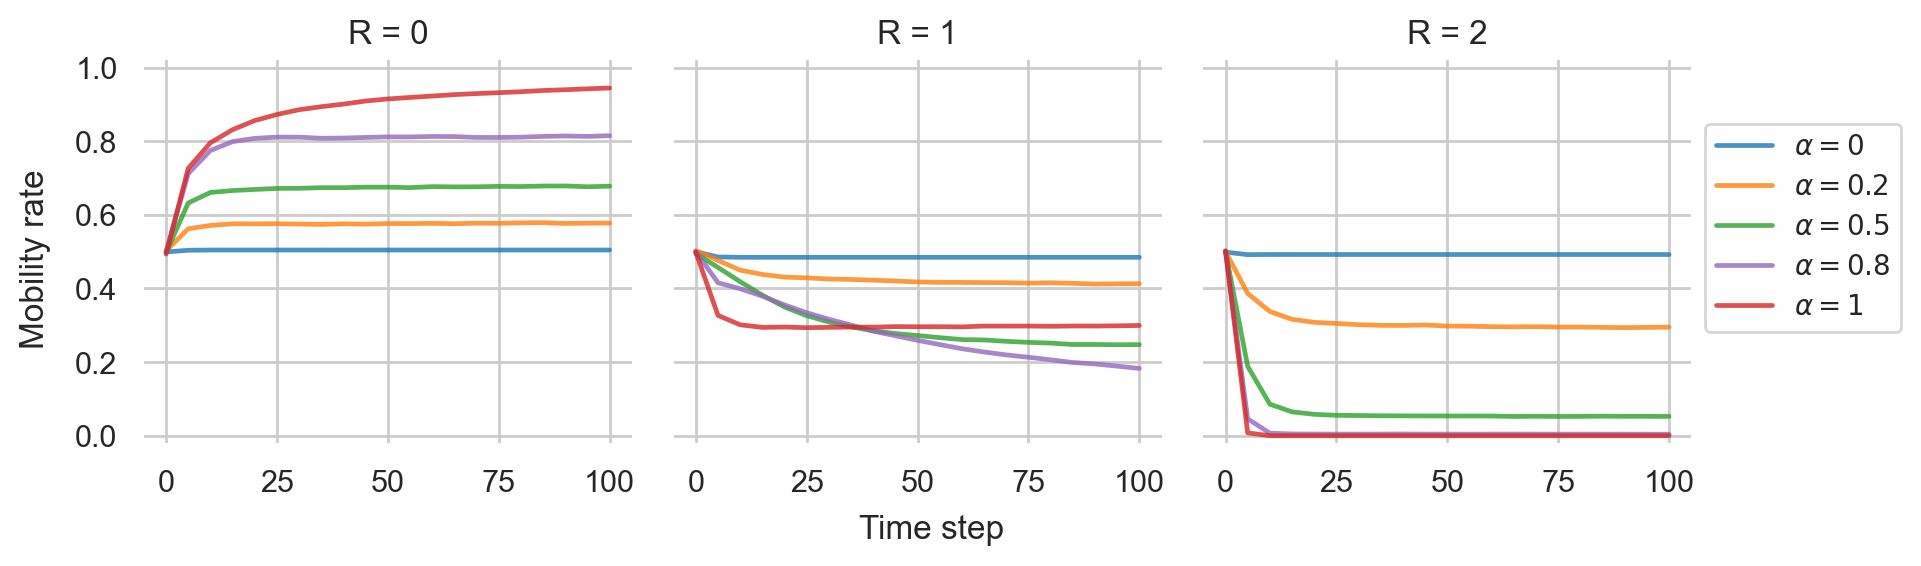

In [1430]:
fig, axs = plt.subplots(1, 3, figsize=(9.5,2.75))
   
    
dataset = exp2_R_50_iter

axs[0].set_title("R = 0")
axs[1].set_title("R = 1")
axs[2].set_title("R = 2")

colors = {"0" : "tab:blue" , "0.2" : "tab:orange" , "0.5" : "tab:green" , "0.8" : "tab:purple" , "1" : "tab:red"}

axs[0].plot("Step" , "mobility_rate" , data = dataset.query('R == 0 and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$", linewidth = 1.7, alpha = .8 , color = colors["0"]) 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('R == 0 and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", linewidth = 1.7, alpha = .8 , color = colors["0.2"]) 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('R == 0 and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$", linewidth = 1.7, alpha = .8 , color = colors["0.5"])  
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('R == 0 and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", linewidth = 1.7, alpha = .8 , color = colors["0.8"]) 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('R == 0 and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", linewidth = 1.7, alpha = .8 , color = colors["1"]) 

axs[1].plot("Step" , "mobility_rate" , data = dataset.query('R == 1 and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$", linewidth = 1.7, alpha = .8 , color = colors["0"]) 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('R == 1 and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", linewidth = 1.7, alpha = .8 , color = colors["0.2"]) 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('R == 1 and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$", linewidth = 1.7, alpha = .8 , color = colors["0.5"])  
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('R == 1 and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", linewidth = 1.7, alpha = .8 , color = colors["0.8"]) 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('R == 1 and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", linewidth = 1.7, alpha = .8 , color = colors["1"]) 

axs[2].plot("Step" , "mobility_rate" , data = dataset.query('R == 2  and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$", linewidth = 1.7, alpha = .8 , color = colors["0"]) 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('R == 2  and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$", linewidth = 1.7, alpha = .8 , color = colors["0.2"]) 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('R == 2  and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$", linewidth = 1.7, alpha = .8 , color = colors["0.5"])  
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('R == 2  and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$", linewidth = 1.7, alpha = .8 , color = colors["0.8"]) 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('R == 2  and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$", linewidth = 1.7, alpha = .8 , color = colors["1"]) 

for i in [0,1,2]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)

    axs[i].set_ylim(-0.02,1.02)

axs[1].set_yticklabels([])
axs[2].set_yticklabels([])

axs[2].legend(ncol=1, bbox_to_anchor=(1, .87), loc = "best" ,fontsize = "small")

# X axis
fig.text(0.47, -0.01, 'Time step', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Mobility rate', va='center', rotation='vertical')


plt.tight_layout()
plt.show()


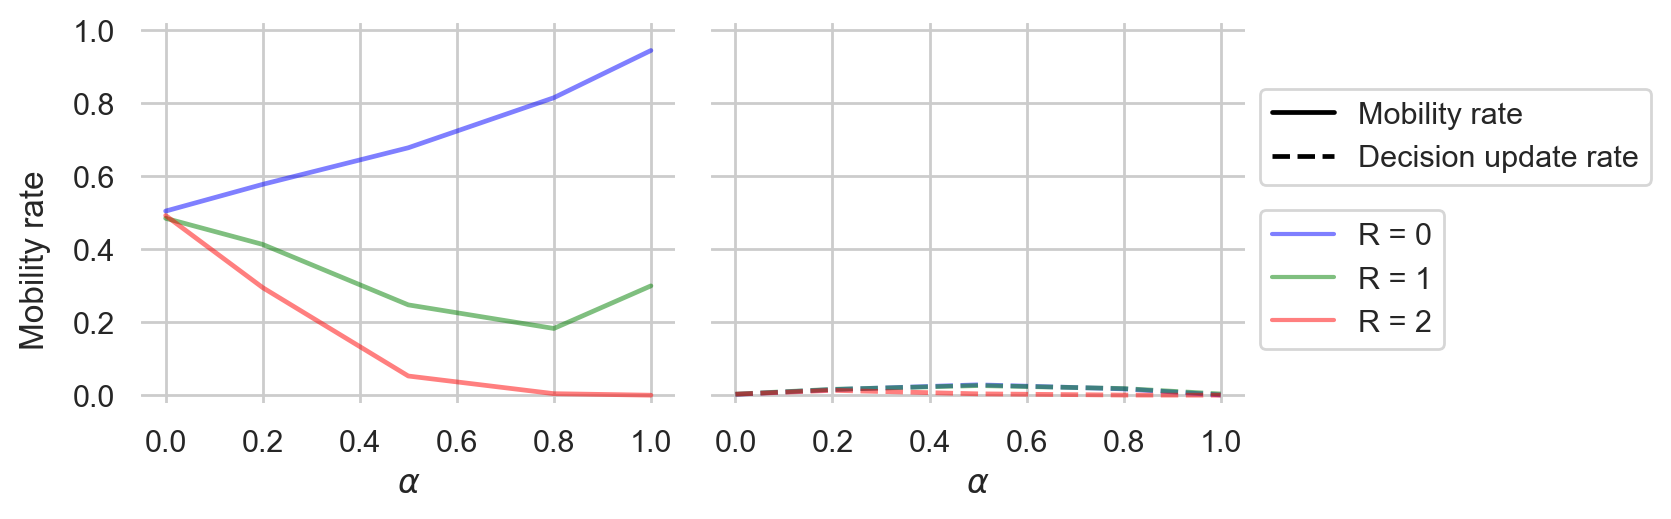

In [1378]:
fig, axs = plt.subplots(1, 2, figsize=(8.25,2.75))

# plt.figure(figsize=(4,  3))
# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 

dataset = exp2_R_50_iter
    
axs[0].plot("alpha" , "mobility_rate" , data = dataset.query('R == 0 and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(), color = "blue" , linewidth = 1.7, alpha = .5) 
axs[0].plot("alpha" , "mobility_rate" , data = dataset.query('R == 1 and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(), color = "green" , linewidth = 1.7, alpha = .5) 
axs[0].plot("alpha" , "mobility_rate" , data = dataset.query('R == 2 and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(),  color = "red" , linewidth = 1.7, alpha = .5) 
axs[0].set_xlabel(r"$\alpha$")

axs[1].plot("alpha" , "updated_decision_rate" , data = dataset.query('R == 0 and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index() , linestyle='--', color = "blue" , linewidth = 1.7, alpha = .5) 
axs[1].plot("alpha" , "updated_decision_rate" , data = dataset.query('R == 1 and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index() , linestyle='--', color = "green" , linewidth = 1.7, alpha = .5) 
axs[1].plot("alpha" , "updated_decision_rate" , data = dataset.query('R == 2 and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index(), linestyle='--',color = "red" , linewidth = 1.7, alpha = .5) 
axs[1].set_xlabel(r"$\alpha$")


for i in [0,1]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)

    axs[i].set_ylim(-0.02,1.02)
    axs[i].set_xticks([0, 0.2, 0.4, 0.6, 0.8 , 1])  
#     axs[i][j].set_yticks([0, 0.5, 1])

axs[1].set_yticklabels([])

# plt.ylim(-0.02,1)
# plt.xlabel(r"$\alpha$")
# plt.ylabel("")


legend1 = plt.legend(handles = [plt.Line2D([0], [0], color="blue", label='R = 0', alpha = .5),
                              plt.Line2D([0], [0], color="green", label='R = 1', alpha = .5),
                              plt.Line2D([0], [0], color="red", label='R = 2', alpha = .5)],
                              bbox_to_anchor=(1, 0.1), loc='lower left')

plt.gca().add_artist(legend1)  # Add the first legend back to the plot

legend_lines = [plt.Line2D([0], [0], linestyle='-', color='black', lw=1.7),
                plt.Line2D([0], [0], linestyle='--', color='black', lw=1.7)]

legend2 = plt.legend(legend_lines, ["Mobility rate", "Decision update rate"], bbox_to_anchor=(1, 0.7), loc='center left')


# X axis
# fig.text(0.47, -0.01, 'Time step', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Mobility rate', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

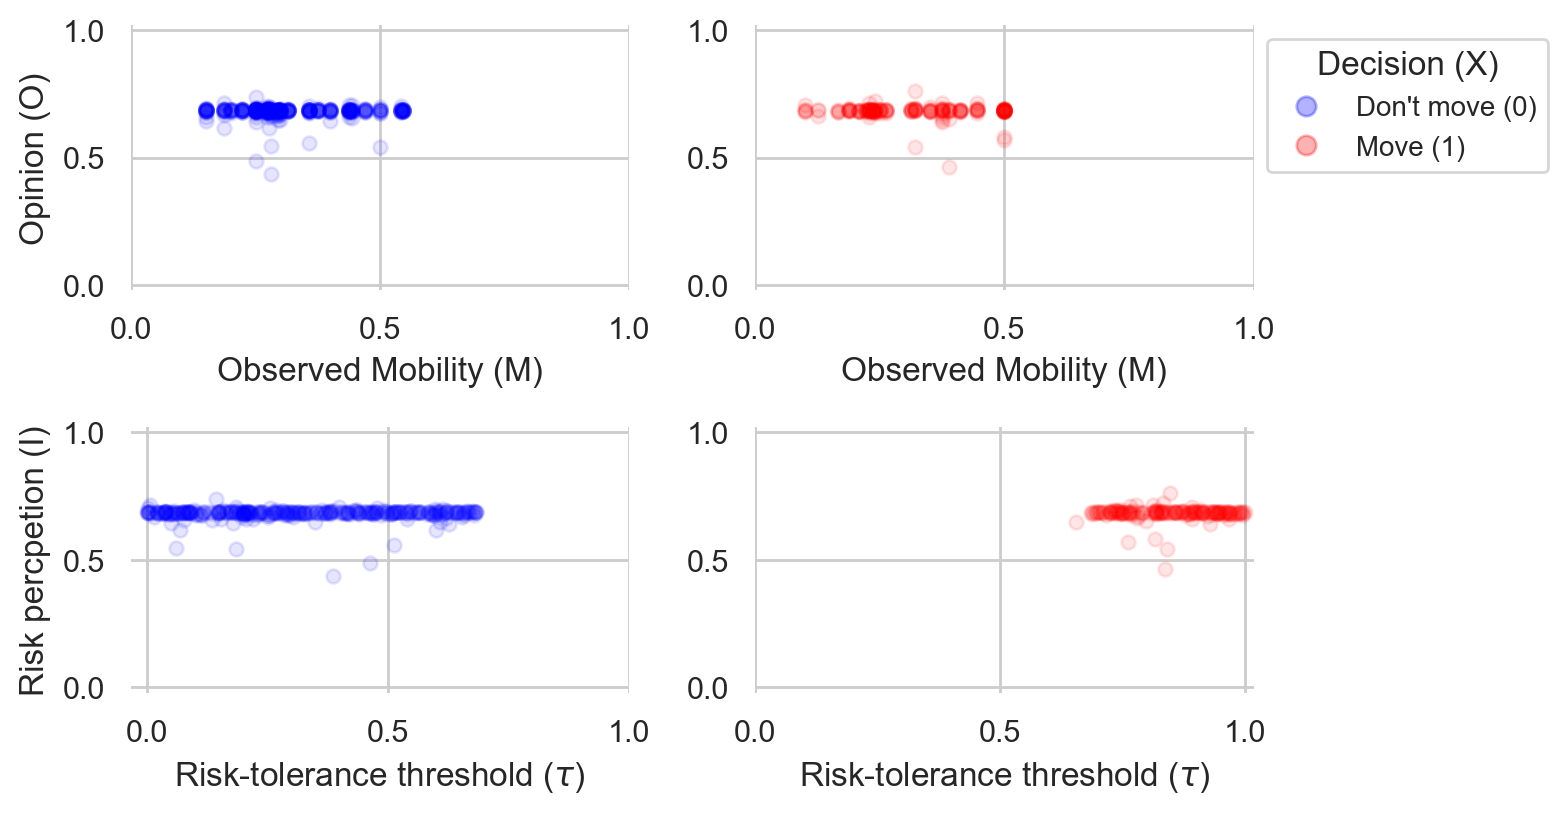

In [266]:
fig, axs = plt.subplots(2, 2, figsize=(8,4.25))


dots_opacity = 0.1
dots_size = 25

dataset = exp2_R_1_iter

# axs[0,0].set_title("R = 0")
# axs[0,1].set_title("R = 1")
# axs[0,2].set_title("R = 2")


axs[0][0].scatter(list(dataset.query("R == 1 and Step == 100 and decision == 0 and alpha == 1")['observed_mobility']), 
                 list(dataset.query("R == 1 and Step == 100 and decision == 0 and alpha == 1")['old_opinion']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color="blue")
axs[0][1].scatter(list(dataset.query("R == 1 and Step == 100 and decision == 1 and alpha == 1")['observed_mobility']), 
                 list(dataset.query("R == 1 and Step == 100 and decision == 1 and alpha == 1")['old_opinion']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color="red")

axs[0][0].set_ylabel('Opinion (O)')
axs[0][0].set_xlabel('Observed Mobility (M)')
axs[0][1].set_xlabel('Observed Mobility (M)')


axs[1][0].scatter(list(dataset.query("R == 1 and Step == 100 and decision == 0 and alpha == 1")['decision_th']), 
                 list(dataset.query("R == 1 and Step == 100 and decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color="blue")
axs[1][1].scatter(list(dataset.query("R == 1 and Step == 100 and decision == 1 and alpha == 1")['decision_th']), 
                 list(dataset.query("R == 1 and Step == 100 and decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color="red")


axs[1][0].set_ylabel('Risk percpetion (I)')
axs[1][0].set_xlabel('Risk-tolerance threshold ('+r"$\tau$"+")")
axs[1][1].set_xlabel('Risk-tolerance threshold ('+r"$\tau$"+")")

for i in [0,1]:
    for j in [0,1]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1]) 

# axs[0][0].set_xticklabels([])
# axs[0][1].set_xticklabels([])
# axs[0][2].set_xticklabels([])


# axs[0][1].set_yticklabels([])
# axs[0][2].set_yticklabels([])
# axs[1][1].set_yticklabels([])
# axs[1][2].set_yticklabels([])


# Create custom legend handles
handles = [plt.Line2D([], [], marker='o', markersize=7, color='blue', linestyle='None', alpha=0.3),
           plt.Line2D([], [], marker='o', markersize=7, color='red', linestyle='None', alpha=0.3)]

axs[0][1].legend(handles, ["Don't move (0)", "Move (1)"], ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small", title = "Decision (X)")

plt.tight_layout()
plt.show()


In [249]:
# plt.figure(figsize=(4,  3))
# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 


# sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp2_R_50_iter.query('R == 2 and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$") 
# sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp2_R_50_iter.query('R == 2 and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$") 
# sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp2_R_50_iter.query('R == 2 and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$")  
# sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp2_R_50_iter.query('R == 2 and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$") 
# sns.lineplot(x = "Step" , y = "mobility_rate" , data = exp2_R_50_iter.query('R == 2 and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$") 

# plt.ylim(0,1)
# plt.xlabel("Time step")
# plt.ylabel("Mobility rate")
# plt.legend(bbox_to_anchor=(1, .86), ncol=1)

# plt.show()

In [251]:
# plt.figure(figsize=(4,  3))
# for pos in ['right', 'top', 'bottom', 'left']: 
#     plt.gca().spines[pos].set_visible(False) 

# sns.lineplot(x = "alpha" , y = "mobility_rate" , data = exp2_R_50_iter.query('R == 2 and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(), label = 'Mobility rate') 
# sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = exp2_R_50_iter.query('R == 2 and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index(), label = "Decision update rate") 

# plt.ylim(-0.02,1)
# plt.xlabel(r"$\alpha$")
# plt.ylabel("")

# # plt.legend(bbox_to_anchor=(1.7, 0.65), ncol=1)

# plt.show()

### 4. Risk-tolerance threshold (dt = low, mid, high)

In [910]:
exp2_dt_50_iter = pd.read_csv(results_folder+"/ex2_4_dt_batchrun_50_iteration.csv")


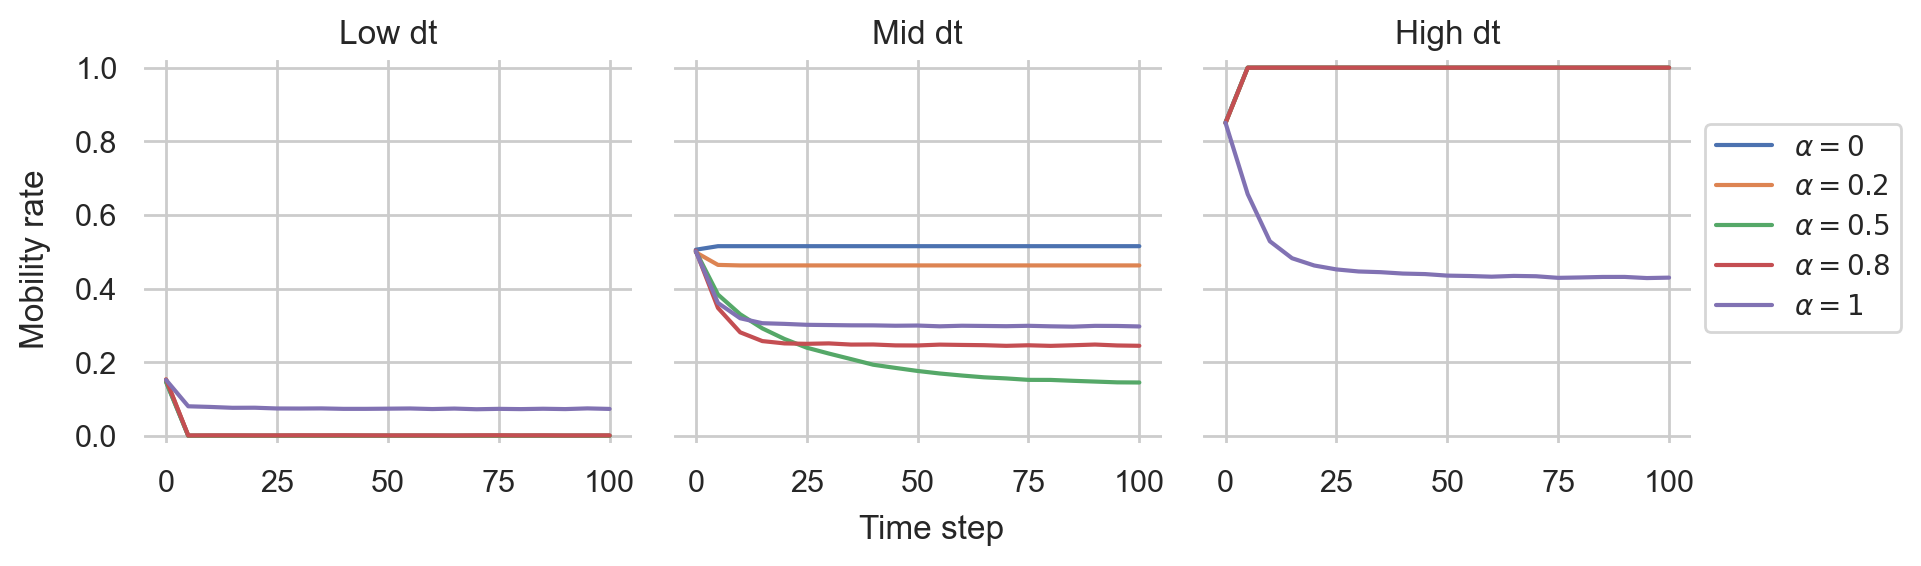

In [911]:
fig, axs = plt.subplots(1, 3, figsize=(9.5,2.75))

dataset = exp2_dt_50_iter

axs[0].set_title("Low dt")
axs[1].set_title("Mid dt")
axs[2].set_title("High dt")

axs[0].plot("Step" , "mobility_rate" , data = dataset.query('dt == "low" and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$") 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('dt == "low" and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$") 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('dt == "low" and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$")  
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('dt == "low" and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$") 
axs[0].plot("Step" , "mobility_rate" , data = dataset.query('dt == "low" and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$") 

axs[1].plot("Step" , "mobility_rate" , data = dataset.query('dt == "mid" and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$") 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('dt == "mid" and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$") 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('dt == "mid" and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$")  
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('dt == "mid" and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$") 
axs[1].plot("Step" , "mobility_rate" , data = dataset.query('dt == "mid" and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$") 

axs[2].plot("Step" , "mobility_rate" , data = dataset.query('dt == "high" and alpha == 0').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0$") 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('dt == "high" and alpha == 0.2').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.2$") 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('dt == "high" and alpha == 0.5').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.5$")  
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('dt == "high" and alpha == 0.8').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 0.8$") 
axs[2].plot("Step" , "mobility_rate" , data = dataset.query('dt == "high" and alpha == 1').groupby("Step")['mobility_rate'].mean().reset_index() , label = r"$\alpha = 1$") 

for i in [0,1,2]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)

    axs[i].set_ylim(-0.02,1.02)

axs[1].set_yticklabels([])
axs[2].set_yticklabels([])

axs[2].legend(ncol=1, bbox_to_anchor=(1, .87), loc = "best" ,fontsize = "small")

# X axis
fig.text(0.47, -0.01, 'Time step', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Mobility rate', va='center', rotation='vertical')


plt.tight_layout()
plt.show()


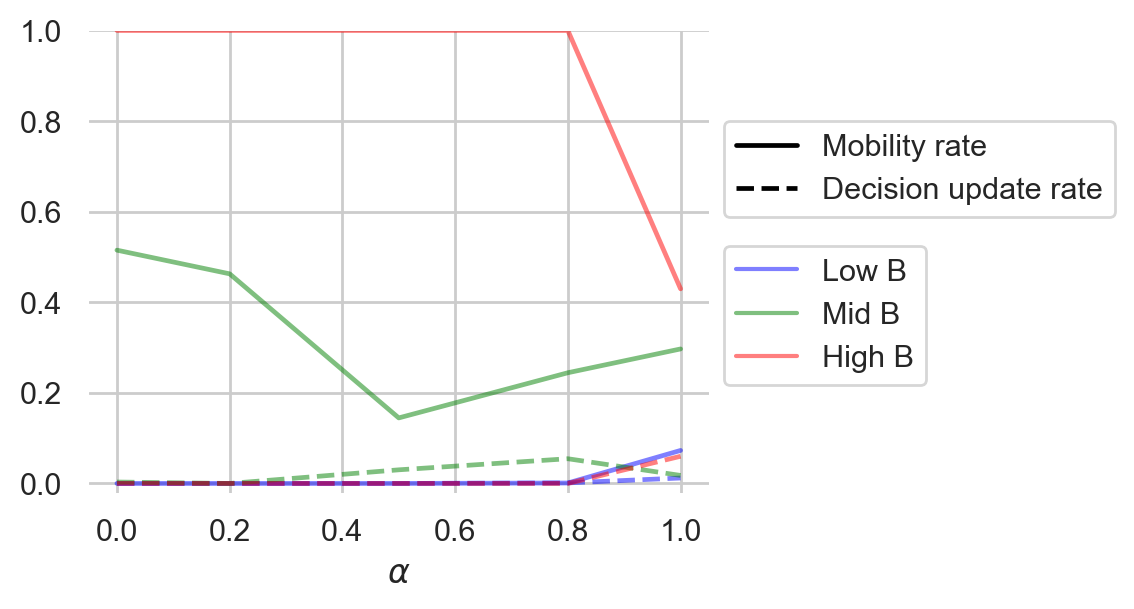

In [913]:
plt.figure(figsize=(4,  3))
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp2_dt_50_iter
    
sns.lineplot(x = "alpha" , y = "mobility_rate" , data = dataset.query('dt == "low" and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(), color = "blue" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "mobility_rate" , data = dataset.query('dt == "mid" and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(), color = "green" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "mobility_rate" , data = dataset.query('dt == "high" and Step == 100').groupby('alpha')['mobility_rate'].mean().reset_index(),  color = "red" , linewidth = 1.7, alpha = .5) 

sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = dataset.query('dt == "low" and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index() , linestyle='--', color = "blue" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = dataset.query('dt == "mid" and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index() , linestyle='--', color = "green" , linewidth = 1.7, alpha = .5) 
sns.lineplot(x = "alpha" , y = "updated_decision_rate" , data = dataset.query('dt == "high" and Step == 100').groupby('alpha')['updated_decision_rate'].mean().reset_index(), linestyle='--',color = "red" , linewidth = 1.7, alpha = .5) 

plt.ylim(-0.02,1)
plt.xlabel(r"$\alpha$")
plt.ylabel("")


legend1 = plt.legend(handles = [plt.Line2D([0], [0], color="blue", label='Low B', alpha = .5),
                              plt.Line2D([0], [0], color="green", label='Mid B', alpha = .5),
                              plt.Line2D([0], [0], color="red", label='High B', alpha = .5)],
                              bbox_to_anchor=(1, 0.2), loc='lower left')

plt.gca().add_artist(legend1)  # Add the first legend back to the plot

legend_lines = [plt.Line2D([0], [0], linestyle='-', color='black', lw=1.7),
                plt.Line2D([0], [0], linestyle='--', color='black', lw=1.7)]

legend2 = plt.legend(legend_lines, ["Mobility rate", "Decision update rate"], bbox_to_anchor=(1, 0.7), loc='center left')


plt.show()

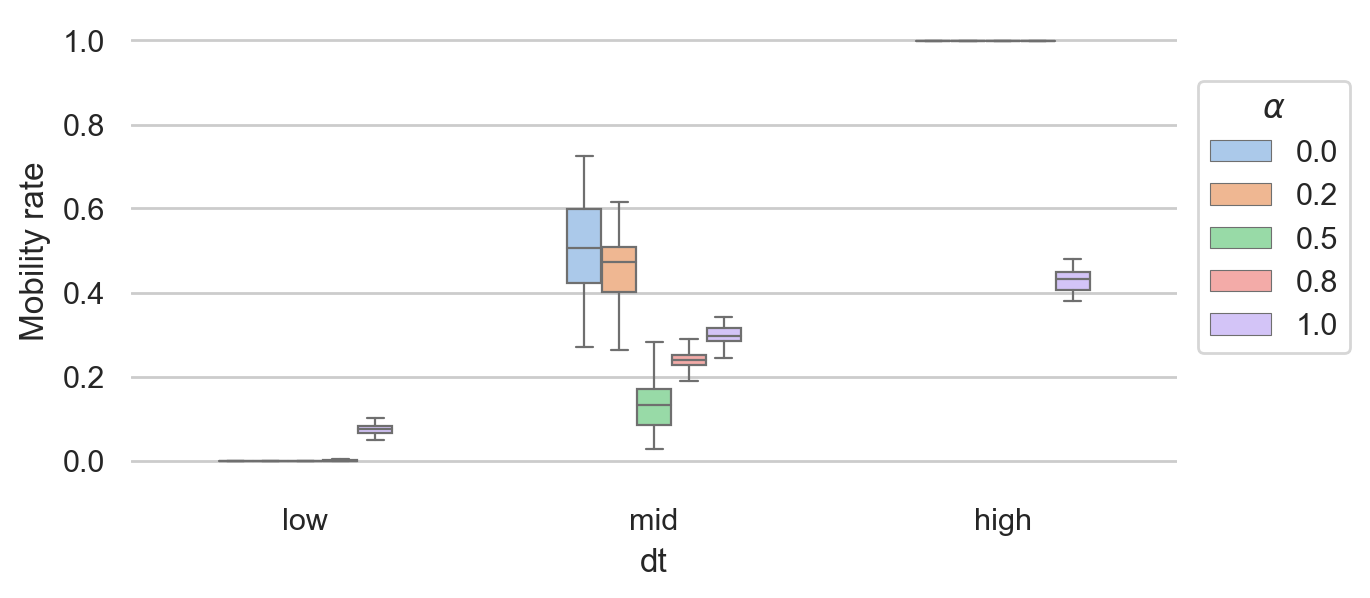

In [912]:
plt.figure(figsize=(6.75,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp2_dt_50_iter

sns.boxplot(x = 'dt' , y = 'mobility_rate' , hue = 'alpha' , data = dataset.query("Step == 100"),
           width = .5, linewidth = .8, fliersize = 0 , palette = "pastel") 

# plt.ylim(0.2,0.7)
plt.xlabel("dt")
plt.ylabel("Mobility rate")

# plt.gca().set_xticklabels(['R = 0', 'R = 1', 'R = 2'])

plt.legend(title = r"$\alpha$", bbox_to_anchor=(1.18, .9))



plt.show()

## Experiment 3

### 1. Offline grid 


In [21]:
exp3_h_w_tuple = pd.read_csv(results_folder+"/ex3_1_h_w_tuple_batchrun_100_iteration.csv")
exp3_h_w_tuple_2 = pd.read_csv(results_folder+"/ex3_1_h_w_tuple_alpha_05_batchrun_100_iteration.csv")


In [22]:
combined_exp3_h_w = pd.concat([exp3_h_w_tuple, exp3_h_w_tuple_2], ignore_index=True)

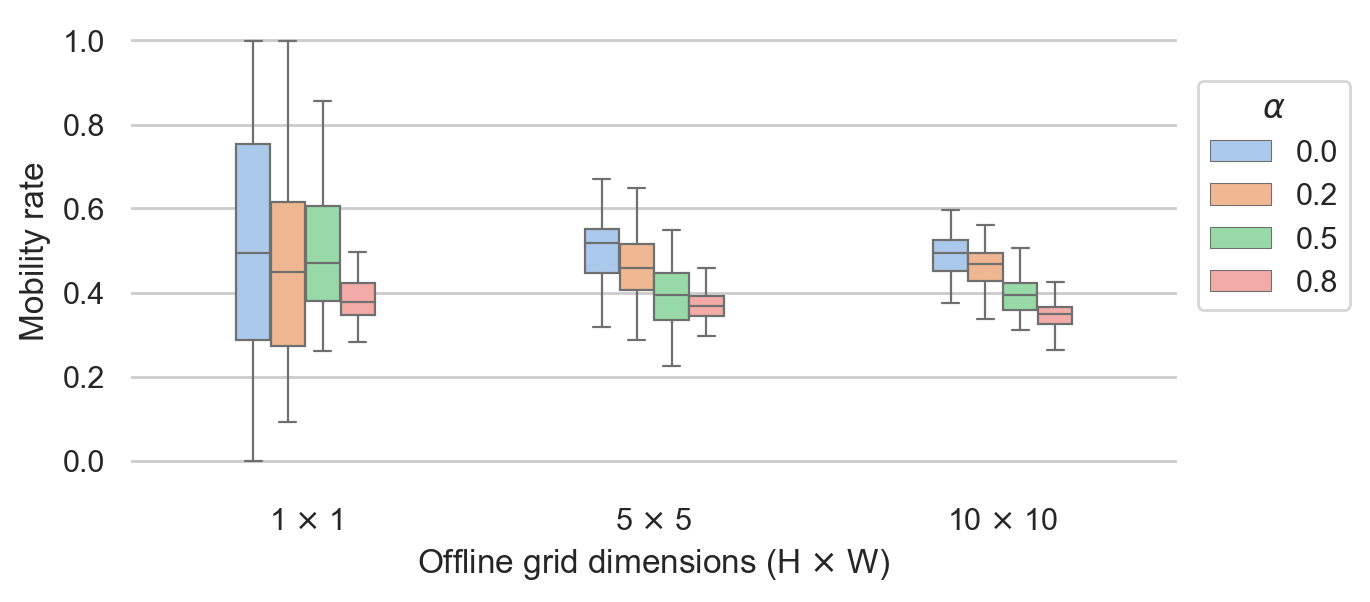

In [50]:
plt.figure(figsize=(6.75,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = combined_exp3_h_w

sns.boxplot(x = 'grid_dimensions' , y = 'mobility_rate' , hue = 'alpha' , data = dataset.query("Step == 100"),
           width = .4, linewidth = .8, fliersize = 0 , palette = "pastel") 

# plt.ylim(0.2,0.7)
plt.xlabel(r'Offline grid dimensions (H $\times$ W)')

plt.ylabel("Mobility rate")

plt.gca().set_xticklabels([r'1 $\times$ 1', r'5 $\times$ 5', r'10 $\times$ 10'])

plt.legend(title = r"$\alpha$", bbox_to_anchor=(1.18, .9))



plt.show()

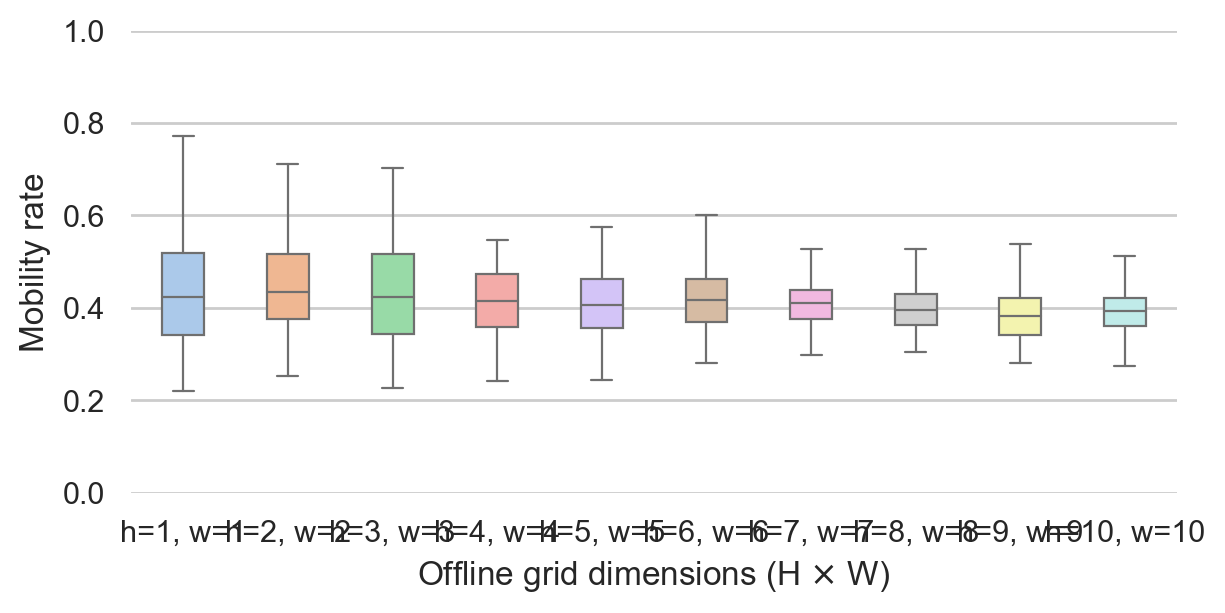

In [153]:
plt.figure(figsize=(6.75,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp3_h_w_100_iter.query("Step == 100")
dataset = dataset[dataset['h'] == dataset['w']]
dataset['hw'] = dataset.apply(lambda row: f'h={row.h}, w={row.w}', axis=1)

sns.boxplot(x='hw', y='mobility_rate', data=dataset, width=0.4, linewidth=0.8, fliersize=0, palette="pastel")

plt.ylim(0,1)
plt.xlabel(r'Offline grid dimensions (H $\times$ W)')

plt.ylabel("Mobility rate")

# plt.gca().set_xticklabels([r'1 $\times$ 1', r'5 $\times$ 5', r'10 $\times$ 10'])

# plt.legend(title = r"$\alpha$", bbox_to_anchor=(1.18, .9))



plt.show()

In [43]:
exp3_h_w_100_iter = pd.read_csv(results_folder+"/ex3_1_offline_grid_batchrun_100_iterations.csv")


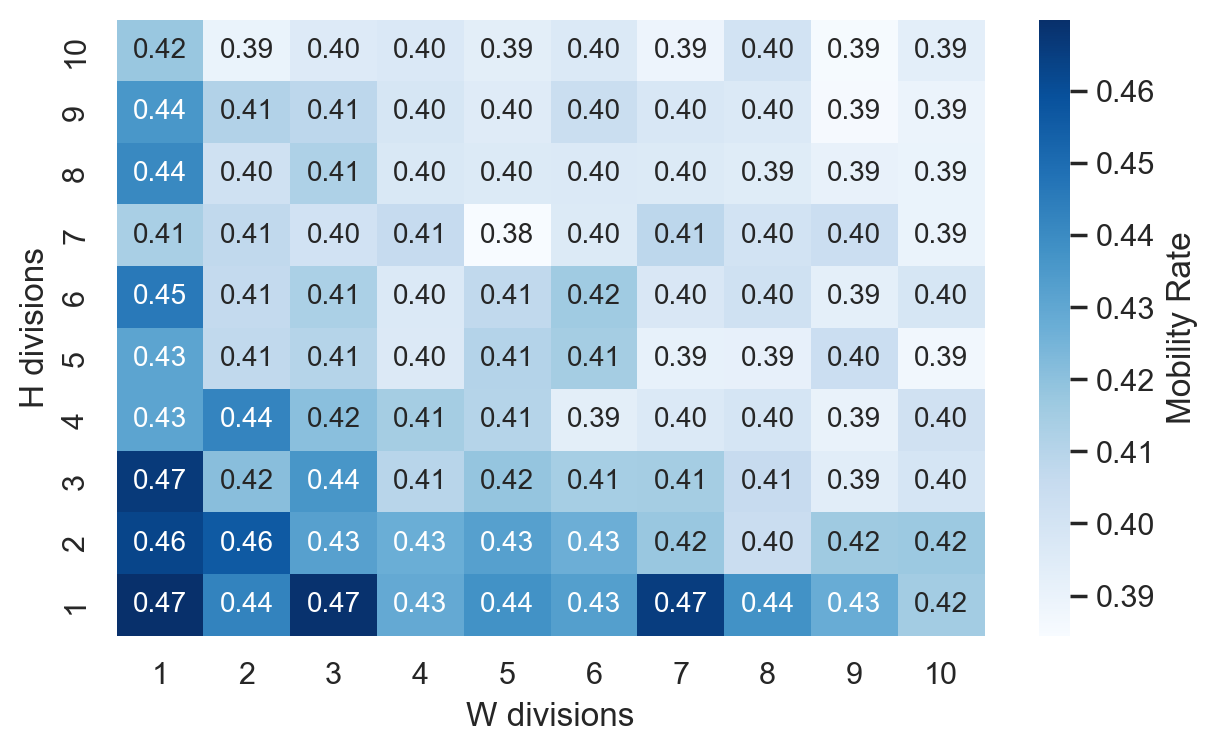

In [143]:
dataset = exp3_h_w_100_iter

final_mobility_rate = dataset.query('Step == 100').groupby(['h', 'w'])['mobility_rate'].mean().unstack()
final_mobility_rate = final_mobility_rate.iloc[::-1]

plt.figure(figsize=(7, 4))
sns.heatmap(final_mobility_rate, annot=True, fmt=".2f", 
            cmap=sns.color_palette("Blues", as_cmap=True), 
            annot_kws={"fontsize": 10}, cbar_kws={"label": "Mobility Rate"})

plt.xlabel('W divisions')
plt.ylabel('H divisions')

plt.show()

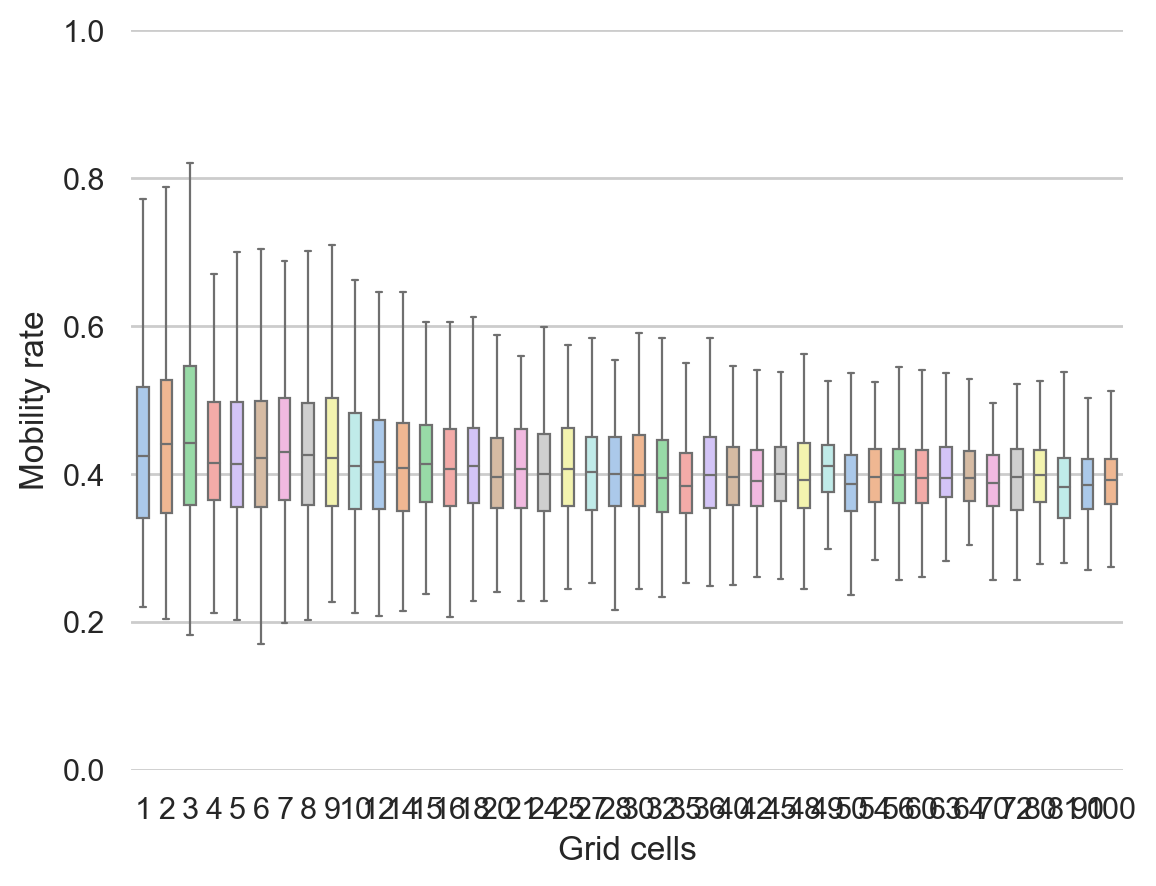

In [79]:
# plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp3_h_w_100_iter
dataset['Grid_size'] = dataset['h'] * dataset['w']

sns.boxplot(x = 'Grid_size' , y = 'mobility_rate' , data = dataset.query("Step == 100"),
           width = .5, linewidth = .8, fliersize = 0 , palette = "pastel") 

plt.ylim(0,1)
plt.xlabel("Grid cells")
plt.ylabel("Mobility rate")

plt.show()

In [197]:
exp3_h_w_1_iter = pd.read_csv(results_folder+"/ex3_1_offline_grid_batchrun_1_iteration_500_agents.csv")
# exp3_h_w_1_iter = pd.read_csv(results_folder+"/ex3_1_offline_grid_batchrun_1_iteration_500_agents_alpha_0.csv")


In [198]:
exp3_h_w_1_iter.query("Step == 100").mobility_rate.unique()

array([0.454, 0.394, 0.378])

In [199]:
exp3_h_w_1_iter.alpha.unique()

array([0.5])

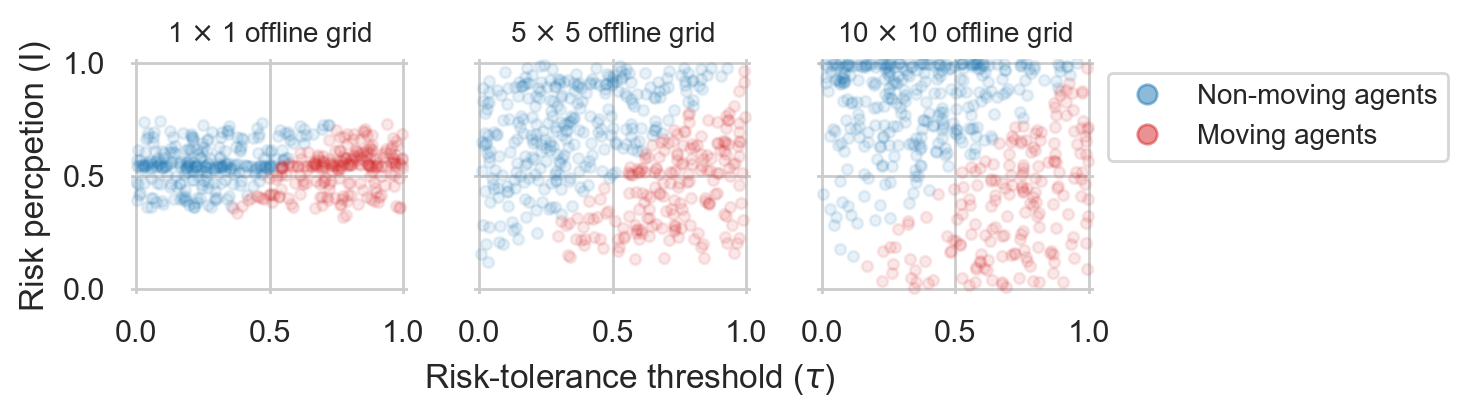

In [200]:
fig, axs = plt.subplots(1, 3, figsize=(7.5,2))

dataset = exp3_h_w_1_iter
dots_size = 15

axs[0].set_title(r'1 $\times$ 1 offline grid' , fontsize = "small")
axs[1].set_title(r'5 $\times$ 5 offline grid' , fontsize = "small")
axs[2].set_title(r'10 $\times$ 10 offline grid' , fontsize = "small")

axs[0].set_ylabel("Risk percpetion (I)")

axs[0].scatter(list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(1, 1)'")['decision_th']), 
               list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(1, 1)'")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0].scatter(list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(1, 1)'")['decision_th']), 
               list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(1, 1)'")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[1].scatter(list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(5, 5)'")['decision_th']), 
               list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(5, 5)'")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1].scatter(list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(5, 5)'")['decision_th']), 
               list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(5, 5)'")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[2].scatter(list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(10, 10)'")['decision_th']), 
               list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(10, 10)'")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[2].scatter(list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(10, 10)'")['decision_th']), 
               list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(10, 10)'")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

for i in [0,1,2]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)

    axs[i].set_ylim(-0.02,1.02)
    axs[i].set_xlim(-0.02,1.02)
    axs[i].set_xticks([0, 0.5, 1])  
    axs[i].set_yticks([0, 0.5, 1])  

    if i != 0:
        axs[i].set_yticklabels([])


axs[2].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# # X axis
fig.text(0.43, -0.01, 'Risk-tolerance threshold ('+r"$\tau$"+")", ha='center')

plt.tight_layout()
plt.show()


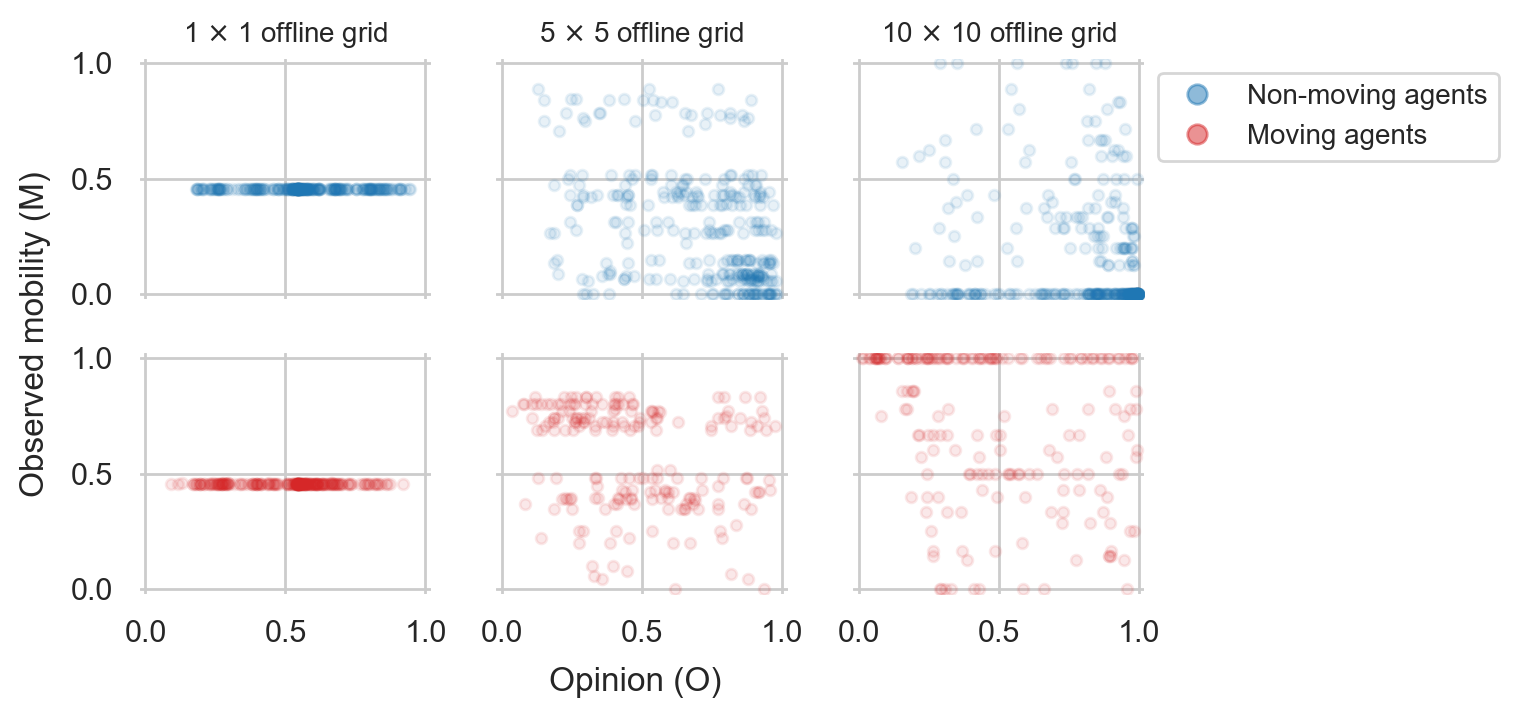

In [201]:
fig, axs = plt.subplots(2, 3, figsize=(7.5,3.5))


dataset = exp3_h_w_1_iter
dots_size = 15

axs[0][0].set_title(r'1 $\times$ 1 offline grid'  , fontsize = "small")
axs[0][1].set_title(r'5 $\times$ 5 offline grid'  , fontsize = "small")
axs[0][2].set_title(r'10 $\times$ 10 offline grid'  , fontsize = "small")

# axs[0].set_ylabel("Risk percpetion (I)")

axs[0][0].scatter(list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(1, 1)'")['old_opinion']), 
                  list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(1, 1)'")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][0].scatter(list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(1, 1)'")['old_opinion']), 
                  list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(1, 1)'")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[0][1].scatter(list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(5, 5)'")['old_opinion']), 
                  list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(5, 5)'")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][1].scatter(list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(5, 5)'")['old_opinion']), 
                  list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(5, 5)'")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[0][2].scatter(list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(10, 10)'")['old_opinion']), 
                  list(dataset.query("Step == 100 and decision == 0 and grid_dimensions == '(10, 10)'")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][2].scatter(list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(10, 10)'")['old_opinion']), 
                  list(dataset.query("Step == 100 and decision == 1 and grid_dimensions == '(10, 10)'")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

for i in [0,1]:
    for j in [0,1,2]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xlim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  

        if i != 1:
            axs[i][j].set_xticklabels([])
        
        if j != 0:
            axs[i][j].set_yticklabels([])

axs[0][2].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# # X axis
fig.text(0.4, -0.01, 'Opinion (O)', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Observed mobility (M)', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


### Not used

In [41]:
exp3_h_w_50_iter = pd.read_csv(results_folder+"/ex3_1_offline_grid_batchrun_50_iterations.csv")


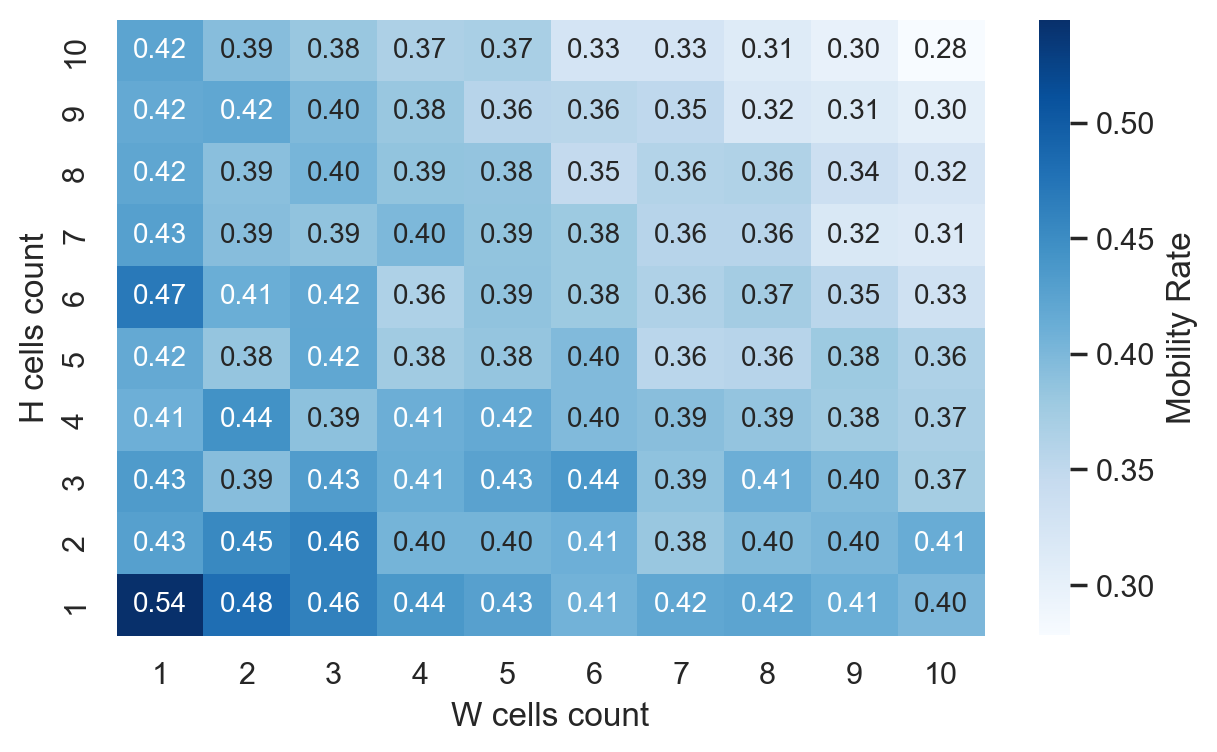

In [42]:
dataset = exp3_h_w_50_iter

final_mobility_rate = dataset.query('Step == 50').groupby(['h', 'w'])['mobility_rate'].mean().unstack()
final_mobility_rate = final_mobility_rate.iloc[::-1]

plt.figure(figsize=(7, 4))
sns.heatmap(final_mobility_rate, annot=True, fmt=".2f", 
            cmap=sns.color_palette("Blues", as_cmap=True), 
            annot_kws={"fontsize": 10}, cbar_kws={"label": "Mobility Rate"})

plt.xlabel('W cells count')
plt.ylabel('H cells count')

plt.show()

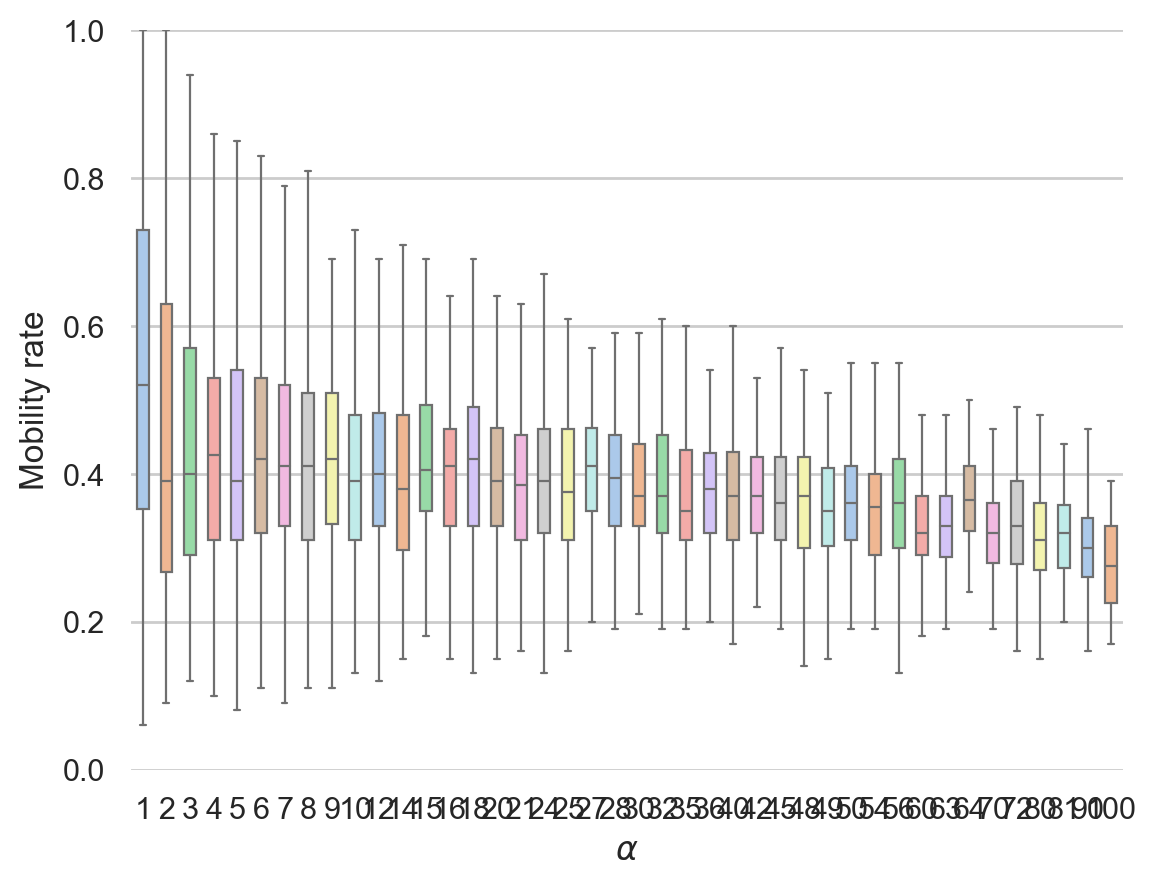

In [72]:
# plt.figure(figsize=(4,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = exp3_h_w_50_iter
dataset['Grid_size'] = dataset['h'] * dataset['w']

sns.boxplot(x = 'Grid_size' , y = 'mobility_rate' , data = dataset.query("Step == 50"),
           width = .5, linewidth = .8, fliersize = 0 , palette = "pastel") 

plt.ylim(0,1)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mobility rate")

plt.show()

In [ ]:
# exp3_h_w_1_iter = pd.read_csv(results_folder+"/ex3_1_offline_grid_batchrun_1_iteration.csv")

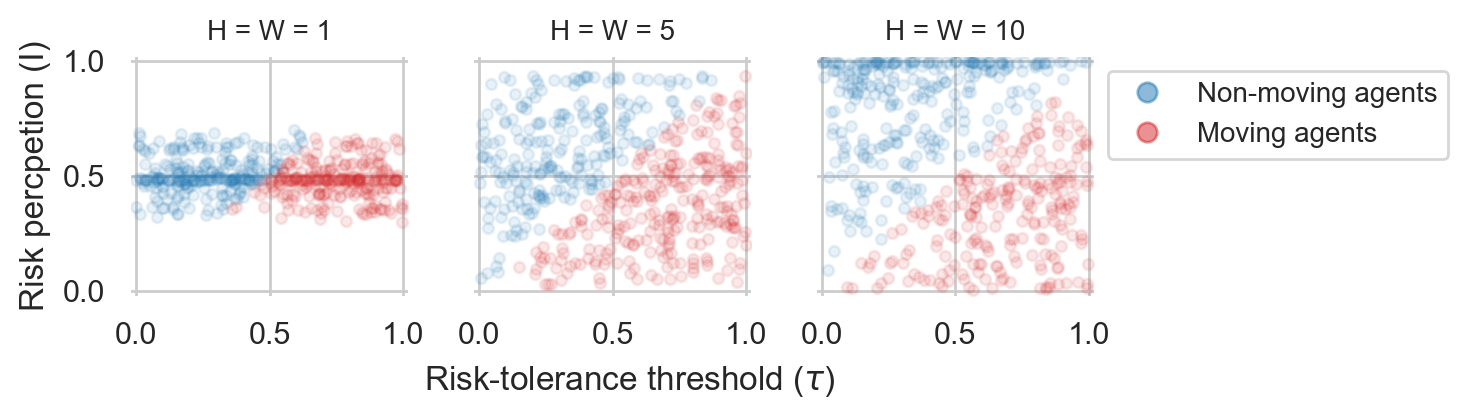

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(7.5,2))

dataset = exp3_h_w_1_iter
dots_size = 15

axs[0].set_title("H = W = 1" , fontsize = "small")
axs[1].set_title("H = W = 5" , fontsize = "small")
axs[2].set_title("H = W = 10" , fontsize = "small")

axs[0].set_ylabel("Risk percpetion (I)")

axs[0].scatter(list(dataset.query("Step == 50 and decision == 0 and h == 1 and w == 1")['decision_th']), 
               list(dataset.query("Step == 50 and decision == 0 and h == 1 and w == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0].scatter(list(dataset.query("Step == 50 and decision == 1 and h == 1 and w == 1")['decision_th']), 
               list(dataset.query("Step == 50 and decision == 1 and h == 1 and w == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[1].scatter(list(dataset.query("Step == 50 and decision == 0 and h == 5 and w == 5")['decision_th']), 
               list(dataset.query("Step == 50 and decision == 0 and h == 5 and w == 5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1].scatter(list(dataset.query("Step == 50 and decision == 1 and h == 5 and w == 5")['decision_th']), 
               list(dataset.query("Step == 50 and decision == 1 and h == 5 and w == 5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[2].scatter(list(dataset.query("Step == 50 and decision == 0 and h == 10 and w == 10")['decision_th']), 
               list(dataset.query("Step == 50 and decision == 0 and h == 10 and w == 10")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[2].scatter(list(dataset.query("Step == 50 and decision == 1 and h == 10 and w == 10")['decision_th']), 
               list(dataset.query("Step == 50 and decision == 1 and h == 10 and w == 10")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

for i in [0,1,2]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)

    axs[i].set_ylim(-0.02,1.02)
    axs[i].set_xlim(-0.02,1.02)
    axs[i].set_xticks([0, 0.5, 1])  
    axs[i].set_yticks([0, 0.5, 1])  

    if i != 0:
        axs[i].set_yticklabels([])


axs[2].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# # X axis
fig.text(0.43, -0.01, 'Risk-tolerance threshold ('+r"$\tau$"+")", ha='center')

plt.tight_layout()
plt.show()


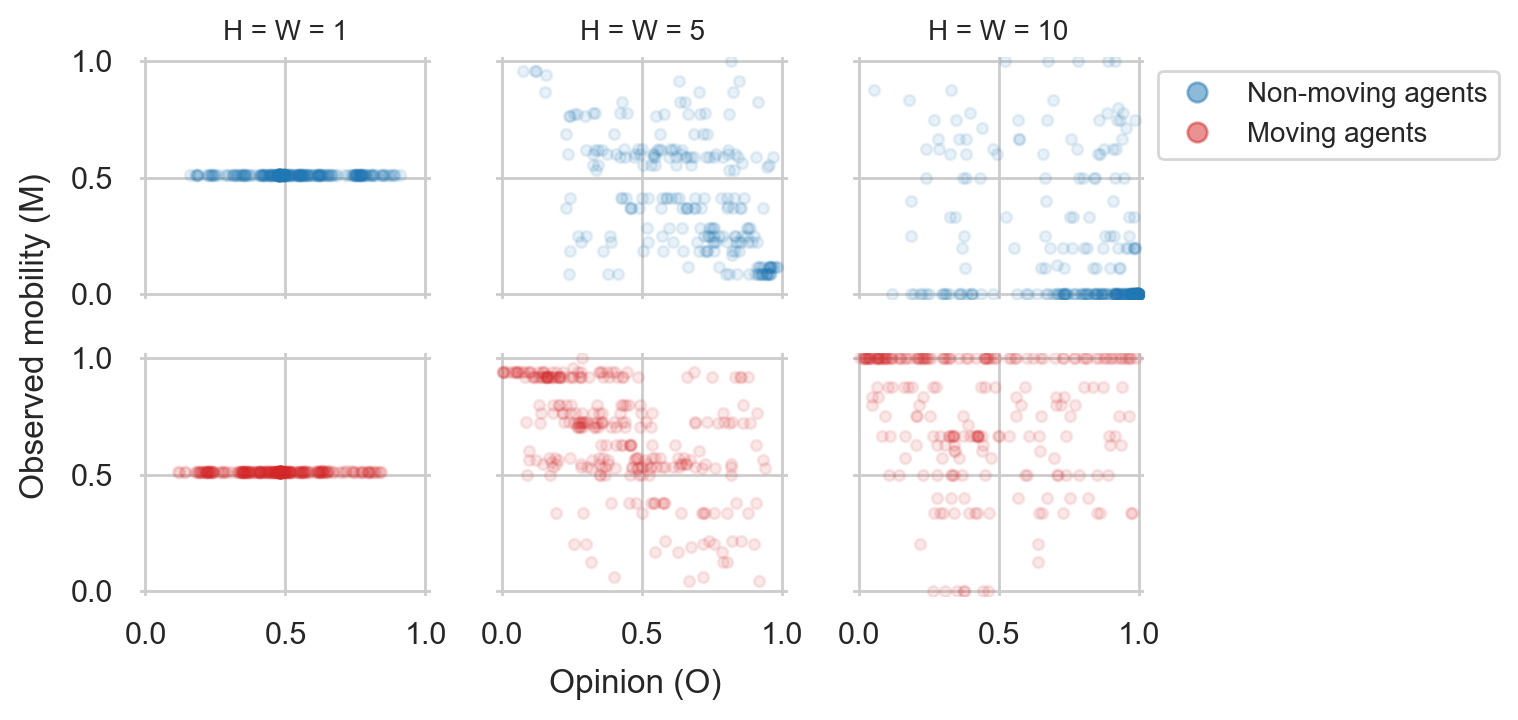

In [1106]:
fig, axs = plt.subplots(2, 3, figsize=(7.5,3.5))


dataset = exp3_h_w_1_iter
dots_size = 15

axs[0][0].set_title("H = W = 1" , fontsize = "small")
axs[0][1].set_title("H = W = 5" , fontsize = "small")
axs[0][2].set_title("H = W = 10" , fontsize = "small")

# axs[0].set_ylabel("Risk percpetion (I)")

axs[0][0].scatter(list(dataset.query("Step == 50 and decision == 0 and h == 1 and w == 1")['old_opinion']), 
               list(dataset.query("Step == 50 and decision == 0 and h == 1 and w == 1")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][0].scatter(list(dataset.query("Step == 50 and decision == 1 and h == 1 and w == 1")['old_opinion']), 
               list(dataset.query("Step == 50 and decision == 1 and h == 1 and w == 1")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[0][1].scatter(list(dataset.query("Step == 50 and decision == 0 and h == 5 and w == 5")['old_opinion']), 
               list(dataset.query("Step == 50 and decision == 0 and h == 5 and w == 5")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][1].scatter(list(dataset.query("Step == 50 and decision == 1 and h == 5 and w == 5")['old_opinion']), 
               list(dataset.query("Step == 50 and decision == 1 and h == 5 and w == 5")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[0][2].scatter(list(dataset.query("Step == 50 and decision == 0 and h == 10 and w == 10")['old_opinion']), 
               list(dataset.query("Step == 50 and decision == 0 and h == 10 and w == 10")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][2].scatter(list(dataset.query("Step == 50 and decision == 1 and h == 10 and w == 10")['old_opinion']), 
               list(dataset.query("Step == 50 and decision == 1 and h == 10 and w == 10")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

for i in [0,1]:
    for j in [0,1,2]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xlim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  

        if i != 1:
            axs[i][j].set_xticklabels([])
        
        if j != 0:
            axs[i][j].set_yticklabels([])

axs[0][2].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# # X axis
fig.text(0.4, -0.01, 'Opinion (O)', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Observed mobility (M)', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


### 2. Online network

In [51]:
exp3_regular_net = pd.read_csv(results_folder+"/ex3_2_online_network_regular.csv")
exp3_scale_free_net = pd.read_csv(results_folder+"/ex3_2_online_network_free-scale.csv")
exp3_complete_net = pd.read_csv(results_folder+"/ex1_batchrun_100_iteration.csv")



In [58]:
df_1 = exp3_regular_net.query('Step == 100')
df_2 = exp3_scale_free_net.query('Step == 100')
df_3 = exp3_complete_net.query('Step == 100 and alpha > 0')

combined_exp3_all_net = pd.concat([df_1 , df_2 , df_3], ignore_index=True)

In [69]:
combined_exp3_all_net['network'].fillna("complete", inplace=True)

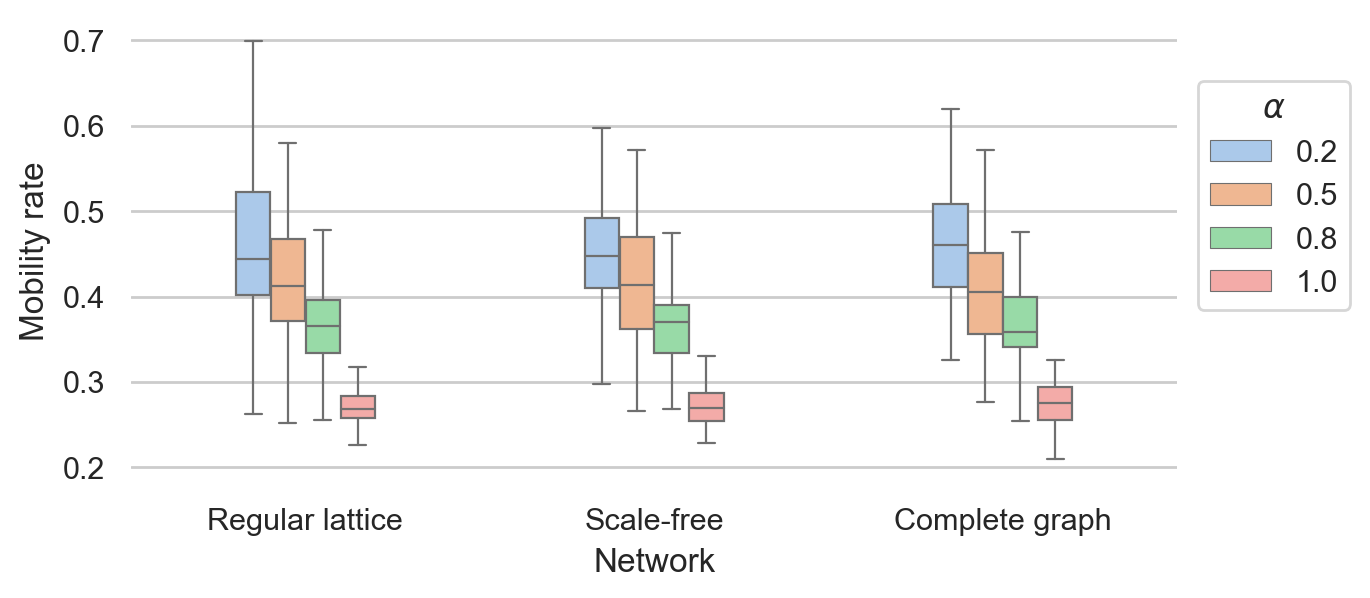

In [252]:
plt.figure(figsize=(6.75,  3))

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

dataset = combined_exp3_all_net

sns.boxplot(x = 'network' , y = 'mobility_rate' , hue = 'alpha' , data = dataset.query("Step == 100"),
           width = .4, linewidth = .8, fliersize = 0 , palette = "pastel") 

# plt.ylim(0,1)
plt.xlabel("Network")

plt.ylabel("Mobility rate")

plt.gca().set_xticklabels(["Regular lattice", "Scale-free" , "Complete graph"])

plt.legend(title = r"$\alpha$", bbox_to_anchor=(1.18, .9))



plt.show()

In [284]:
# exp3_complete_net_1_iter = pd.read_csv(results_folder+"/ex3_2_online_network_complete_1_iter.csv")
exp3_complete_net_1_iter = pd.read_csv(results_folder+"/ex1_batchrun_single_iteration.csv")

exp3_regular_net_1_iter = pd.read_csv(results_folder+"/ex3_2_online_network_regular_1_iter.csv")
exp3_scale_free_net_1_iter = pd.read_csv(results_folder+"/ex3_2_online_network_free-scale_1_iter.csv")


In [285]:
exp3_complete_net_1_iter.query("Step == 100").mobility_rate.unique()

array([0.498, 0.456, 0.468, 0.32 , 0.252])

In [286]:
exp3_regular_net_1_iter.query("Step == 100").mobility_rate.unique()

array([0.596, 0.536, 0.322, 0.272])

In [287]:
exp3_scale_free_net_1_iter.query("Step == 100").mobility_rate.unique()

array([0.394, 0.444, 0.308, 0.278])

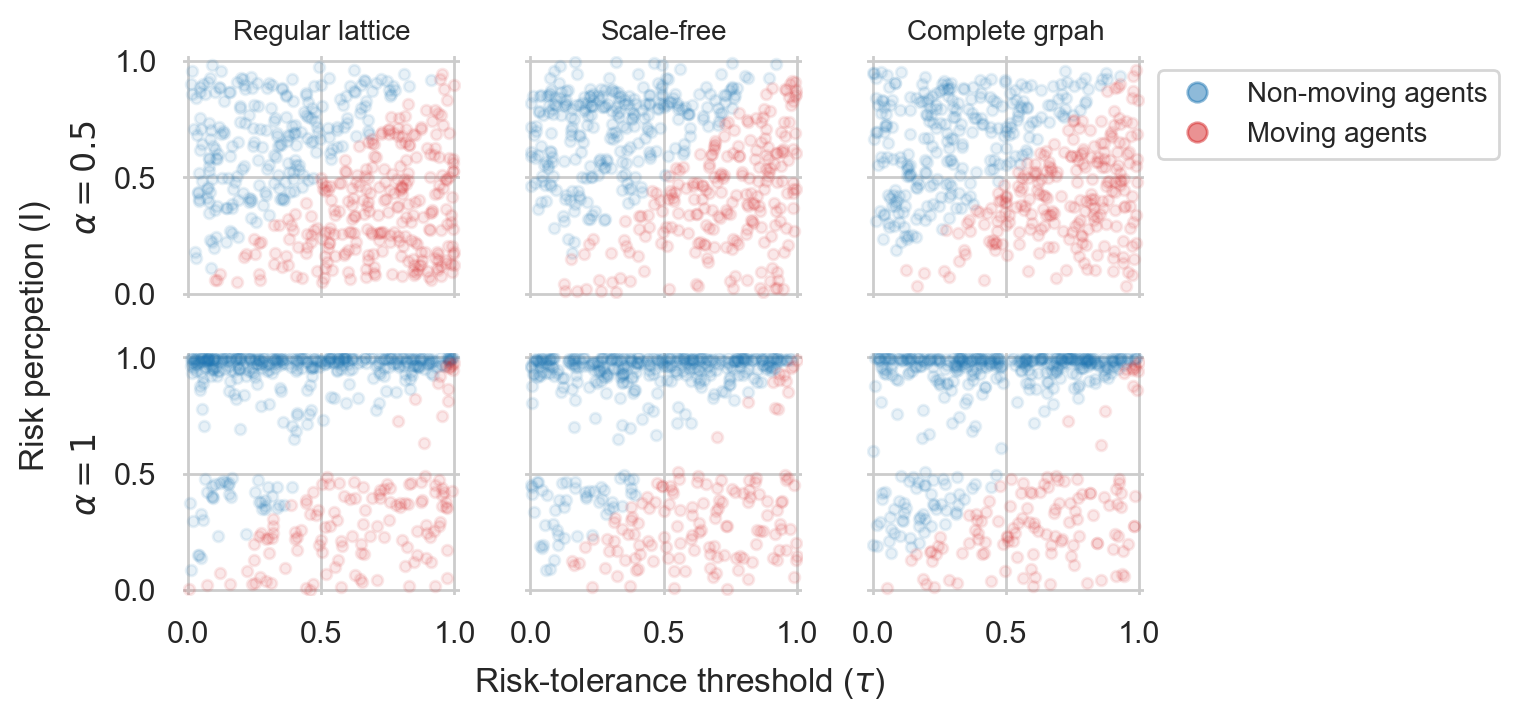

In [289]:
fig, axs = plt.subplots(2, 3, figsize=(7.5,3.5))

dots_size = 15


axs[0][0].set_ylabel(r"$\alpha = 0.5$")
axs[1][0].set_ylabel(r"$\alpha = 1$")

axs[0][0].set_title("Regular lattice" , fontsize = "small")
dataset_1 = exp3_regular_net_1_iter.query('Step == 100')

axs[0][0].scatter(list(dataset_1.query("decision == 0 and alpha == 0.5")['decision_th']), 
                  list(dataset_1.query("decision == 0 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0][0].scatter(list(dataset_1.query("decision == 1 and alpha == 0.5")['decision_th']), 
                  list(dataset_1.query("decision == 1 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[1][0].scatter(list(dataset_1.query("decision == 0 and alpha == 1")['decision_th']), 
                  list(dataset_1.query("decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][0].scatter(list(dataset_1.query("decision == 1 and alpha == 1")['decision_th']), 
                  list(dataset_1.query("decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])



axs[0][1].set_title("Scale-free" , fontsize = "small")
dataset_2 = exp3_scale_free_net_1_iter.query('Step == 100')

axs[0][1].scatter(list(dataset_2.query("decision == 0 and alpha == 0.5")['decision_th']), 
                  list(dataset_2.query("decision == 0 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0][1].scatter(list(dataset_2.query("decision == 1 and alpha == 0.5")['decision_th']), 
                  list(dataset_2.query("decision == 1 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[1][1].scatter(list(dataset_2.query("decision == 0 and alpha == 1")['decision_th']), 
                  list(dataset_2.query("decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][1].scatter(list(dataset_2.query("decision == 1 and alpha == 1")['decision_th']), 
                  list(dataset_2.query("decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])



axs[0][2].set_title("Complete grpah" , fontsize = "small")
dataset_3 = exp3_complete_net_1_iter.query('Step == 100')

axs[0][2].scatter(list(dataset_3.query("decision == 0 and alpha == 0.5")['decision_th']), 
                  list(dataset_3.query("decision == 0 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0][2].scatter(list(dataset_3.query("decision == 1 and alpha == 0.5")['decision_th']), 
                  list(dataset_3.query("decision == 1 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[1][2].scatter(list(dataset_3.query("decision == 0 and alpha == 1")['decision_th']), 
                  list(dataset_3.query("decision == 0 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][2].scatter(list(dataset_3.query("decision == 1 and alpha == 1")['decision_th']), 
                  list(dataset_3.query("decision == 1 and alpha == 1")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


for i in [0,1]:
    for j in [0,1,2]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xlim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  

        if i != 1:
            axs[i][j].set_xticklabels([])
        
        if j != 0:
            axs[i][j].set_yticklabels([])

axs[0][2].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# # X axis
fig.text(0.43, -0.01, 'Risk-tolerance threshold ('+r"$\tau$"+")", ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Risk percpetion (I)', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


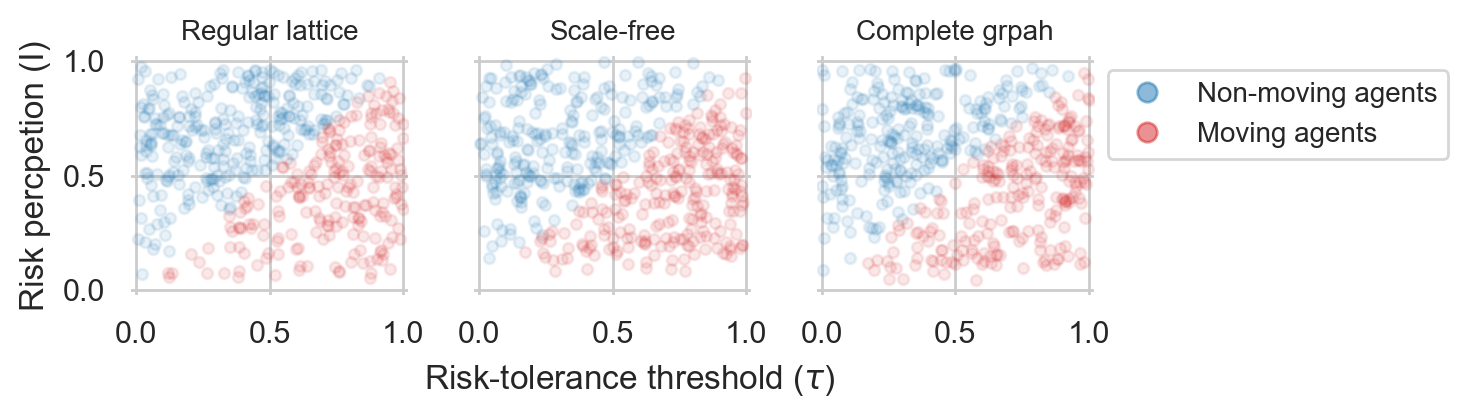

In [254]:
fig, axs = plt.subplots(1, 3, figsize=(7.5,2))

# dataset = exp3_h_w_1_iter
dots_size = 15



axs[0].set_ylabel("Risk percpetion (I)")

axs[0].set_title("Regular lattice" , fontsize = "small")
dataset_1 = exp3_regular_net_1_iter.query('Step == 100')

axs[0].scatter(list(dataset_1.query("decision == 0 and alpha == 0.5")['decision_th']), 
               list(dataset_1.query("decision == 0 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[0].scatter(list(dataset_1.query("decision == 1 and alpha == 0.5")['decision_th']), 
               list(dataset_1.query("decision == 1 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


axs[1].set_title("Scale-free" , fontsize = "small")
dataset_2 = exp3_scale_free_net_1_iter.query('Step == 100')

axs[1].scatter(list(dataset_2.query("decision == 0 and alpha == 0.5")['decision_th']), 
               list(dataset_2.query("decision == 0 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1].scatter(list(dataset_2.query("decision == 1 and alpha == 0.5")['decision_th']), 
               list(dataset_2.query("decision == 1 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])


axs[2].set_title("Complete grpah" , fontsize = "small")
dataset_3 = exp3_complete_net_1_iter.query('Step == 100')

axs[2].scatter(list(dataset_3.query("decision == 0 and alpha == 0.5")['decision_th']), 
               list(dataset_3.query("decision == 0 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[2].scatter(list(dataset_3.query("decision == 1 and alpha == 0.5")['decision_th']), 
               list(dataset_3.query("decision == 1 and alpha == 0.5")['combined_info']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

for i in [0,1,2]:
    for pos in ['right', 'top', 'bottom', 'left']: 
        axs[i].spines[pos].set_visible(False)

    axs[i].set_ylim(-0.02,1.02)
    axs[i].set_xlim(-0.02,1.02)
    axs[i].set_xticks([0, 0.5, 1])  
    axs[i].set_yticks([0, 0.5, 1])  

    if i != 0:
        axs[i].set_yticklabels([])


axs[2].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# # X axis
fig.text(0.43, -0.01, 'Risk-tolerance threshold ('+r"$\tau$"+")", ha='center')

plt.tight_layout()
plt.show()


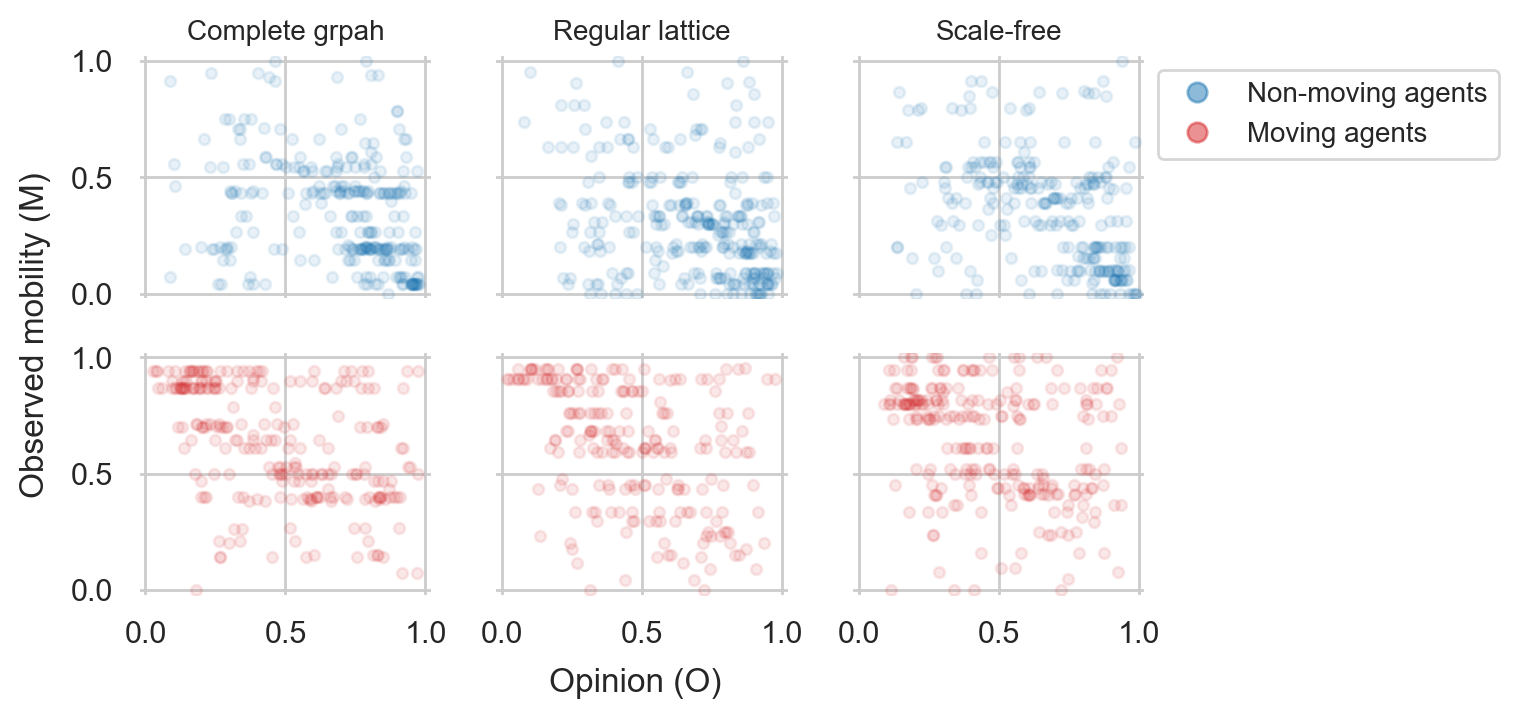

In [250]:
fig, axs = plt.subplots(2, 3, figsize=(7.5,3.5))

dots_size = 15

dataset_1 = exp3_complete_net_1_iter.query('Step == 100')
dataset_2 = exp3_regular_net_1_iter.query('Step == 100')
dataset_3 = exp3_scale_free_net_1_iter.query('Step == 100')


axs[0][0].set_title("Complete grpah" , fontsize = "small")
axs[0][1].set_title("Regular lattice" , fontsize = "small")
axs[0][2].set_title("Scale-free" , fontsize = "small")

# axs[0].set_ylabel("Risk percpetion (I)")

axs[0][0].scatter(list(dataset_1.query("decision == 0 and alpha == 0.5")['old_opinion']), 
                  list(dataset_1.query("decision == 0 and alpha == 0.5")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][0].scatter(list(dataset_1.query("decision == 1 and alpha == 0.5")['old_opinion']), 
                  list(dataset_1.query("decision == 1 and alpha == 0.5")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[0][1].scatter(list(dataset_2.query("decision == 0 and alpha == 0.5")['old_opinion']), 
                  list(dataset_2.query("decision == 0 and alpha == 0.5")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][1].scatter(list(dataset_2.query("decision == 1 and alpha == 0.5")['old_opinion']), 
                  list(dataset_2.query("decision == 1 and alpha == 0.5")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

axs[0][2].scatter(list(dataset_3.query("decision == 0 and alpha == 0.5")['old_opinion']), 
                  list(dataset_3.query("decision == 0 and alpha == 0.5")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[0])
axs[1][2].scatter(list(dataset_3.query("decision == 1 and alpha == 0.5")['old_opinion']), 
                  list(dataset_3.query("decision == 1 and alpha == 0.5")['observed_mobility']) ,  
                 marker='o', s = dots_size, alpha = dots_opacity, color = colors[1])

for i in [0,1]:
    for j in [0,1,2]:
        for pos in ['right', 'top', 'bottom', 'left']: 
            axs[i][j].spines[pos].set_visible(False)

        axs[i][j].set_ylim(-0.02,1.02)
        axs[i][j].set_xlim(-0.02,1.02)
        axs[i][j].set_xticks([0, 0.5, 1])  
        axs[i][j].set_yticks([0, 0.5, 1])  

        if i != 1:
            axs[i][j].set_xticklabels([])
        
        if j != 0:
            axs[i][j].set_yticklabels([])

axs[0][2].legend(scatter_handles, scatter_labels, ncol=1, bbox_to_anchor=(1, 1), loc = "best" ,fontsize = "small")


# # X axis
fig.text(0.4, -0.01, 'Opinion (O)', ha='center')
# Y axis
fig.text(-0.01, 0.5, 'Observed mobility (M)', va='center', rotation='vertical')

plt.tight_layout()
plt.show()
